In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset = "EGG"
model = "DLinear100"
steps_per_individual = 4881

feature_names = ["Trend", "Seasonality", "MSE", "MASE", "MSE Log-transformed"]
num_features = len(feature_names)

path = "../data/" + dataset + "/" + model

In [3]:
features = np.load(path + "/features.npy")
logtransformed = np.expand_dims(np.log(features[:, :, 2]), -1)
features = np.dstack((features, logtransformed))
print(features[:, :, 2] - features[:, :, 4])
mask = np.load(path + "/mask.npy")
num_individuals = features.shape[0] // steps_per_individual

[[ 7.3782649   7.35343852  7.24943755 ...  7.31157187  7.3126884
   7.24399968]
 [ 6.99300491  6.97083989  6.88027794 ...  6.93699514  6.94477147
   6.89241117]
 [ 6.66473664  6.63620733  6.54978944 ...  6.6068803   6.61560666
   6.57469137]
 ...
 [10.81656363 10.89149849 11.2476132  ... 11.03799489 11.06028896
  10.96534653]
 [10.81819673 10.89203564 11.34324472 ... 11.06098776 11.10477484
  10.97017885]
 [10.77203884 10.83603645 11.29792897 ... 11.01885575 11.04202003
  10.90139927]]


In [4]:
l = []
b = []
indiv = 0
korv = None
for i in range(features.shape[0]):
    if mask[i, indiv] != korv:
        korv = mask[i, indiv]
        l.append(1)
        b.append(korv)
    else:
        l[-1] += 1
print(l)
print(b)

[34167, 9762, 4881, 14643, 4881, 19524, 4881, 4881, 4881, 4881, 4881, 4881, 9762, 9762, 9762, 4881, 4881, 4881, 4881, 9762, 29286, 19524, 4881, 24405, 9762, 4881, 9762, 4881, 4881, 9762, 4881, 9762, 14643, 14643, 24405, 4881, 4881, 14643, 4881, 4881, 19524, 24405, 4881, 4881, 14643, 14643, 4881]
[False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]


In [5]:
def bhattacharyya_distance(x1, x2):
    u1 = np.mean(x1)
    v1 = np.var(x1)
    o1 = np.std(x1)

    u2 = np.mean(x2)
    v2 = np.var(x2)
    o2 = np.std(x2)

    d = (1/4) * ((u1 - u2)**2) / (v1 + v2) + (1/2) * np.log((v1 + v2) / (2*o1*o2))
    return d

In [6]:
best_per_individual = []
feature_to_sort = 2
for indiv in range(num_individuals):
    best_diff = 0
    best_i = -1
    for i in range(indiv*steps_per_individual, (indiv+1)*steps_per_individual):
        current_mask = np.array(mask[i, :], dtype=bool)
        current_features = features[i, ...]
        ins = current_features[current_mask]
        outs = current_features[np.logical_not(current_mask)]
        
        diff = bhattacharyya_distance(ins[:, feature_to_sort], outs[:, feature_to_sort])
        if diff > best_diff:
            best_i = i
            best_diff = diff
    best_per_individual.append(best_i)


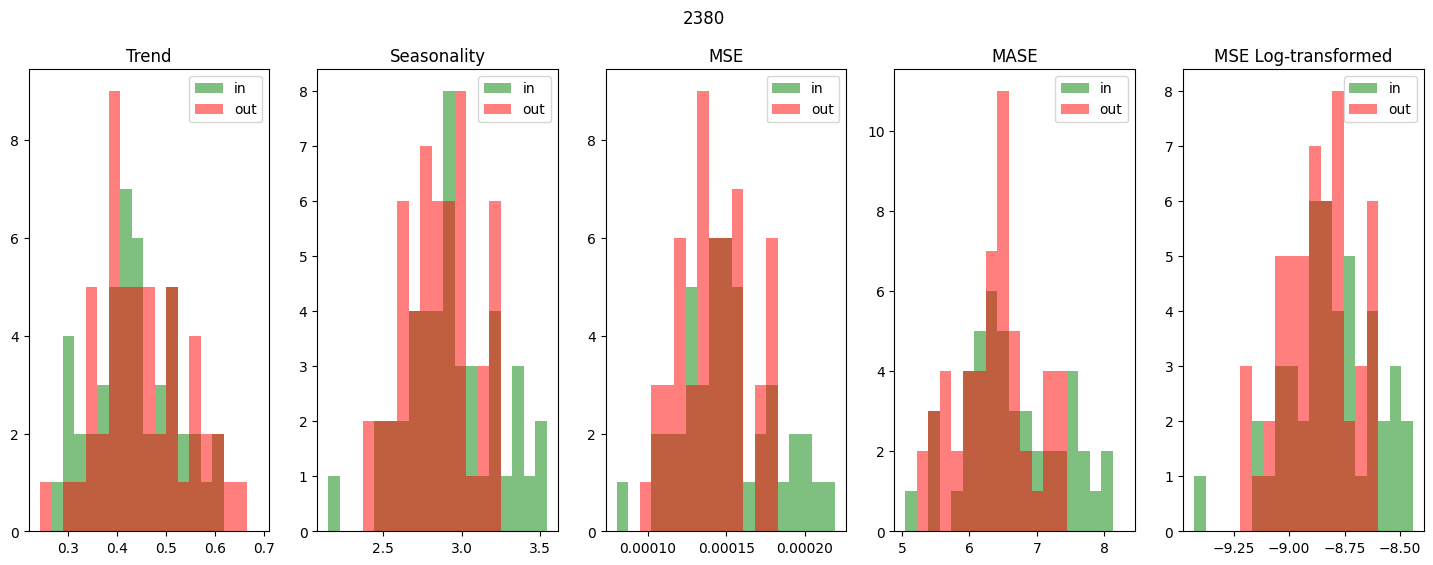

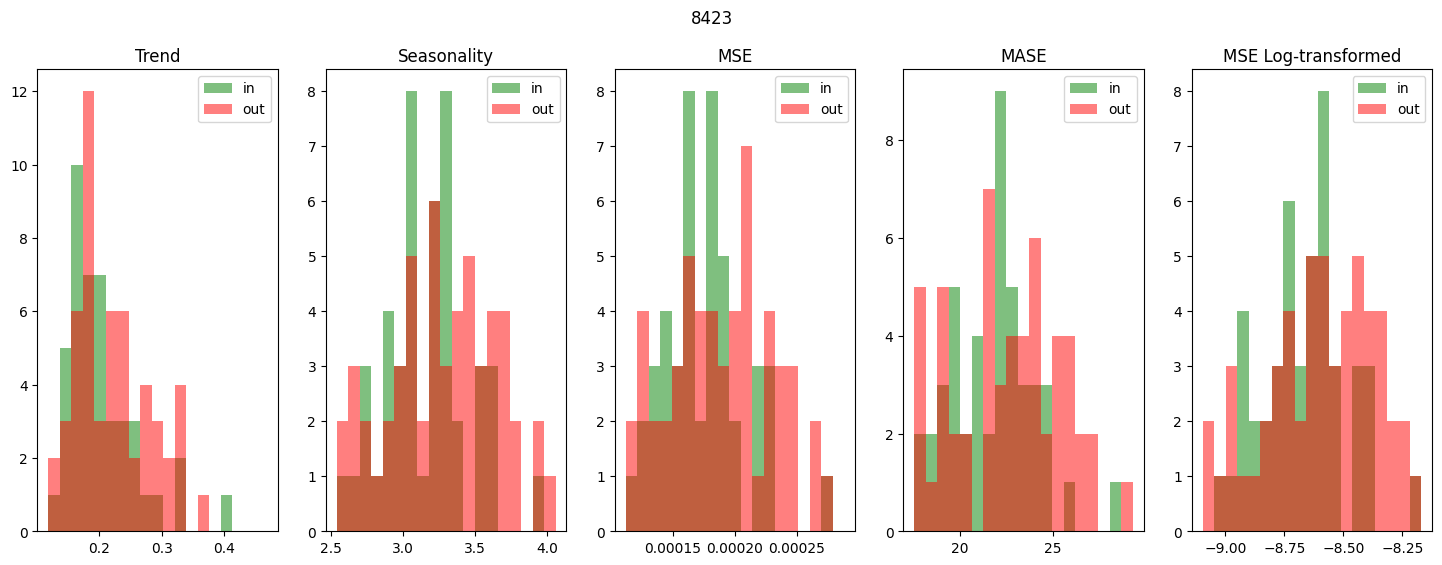

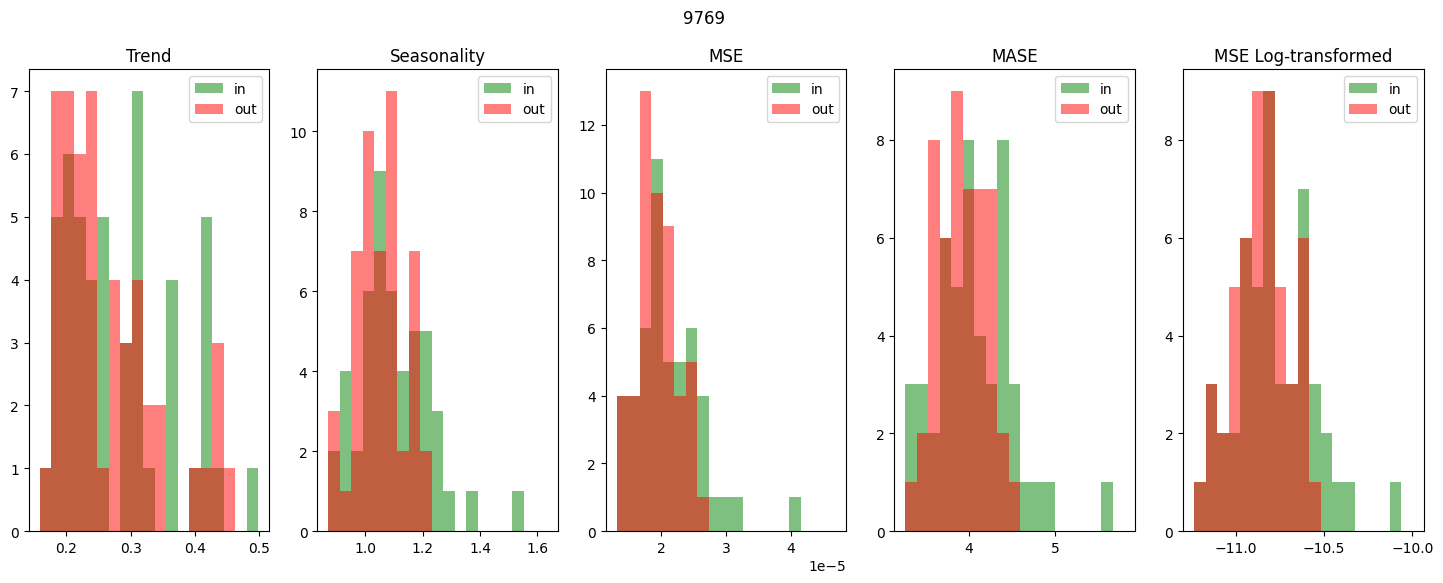

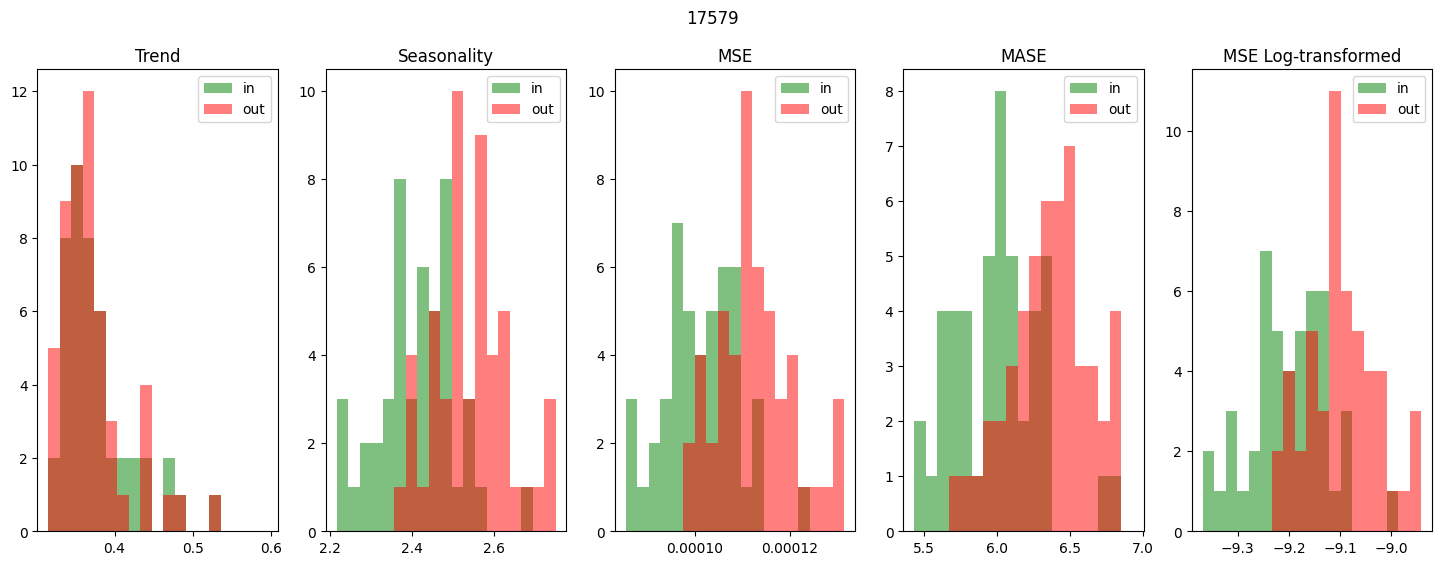

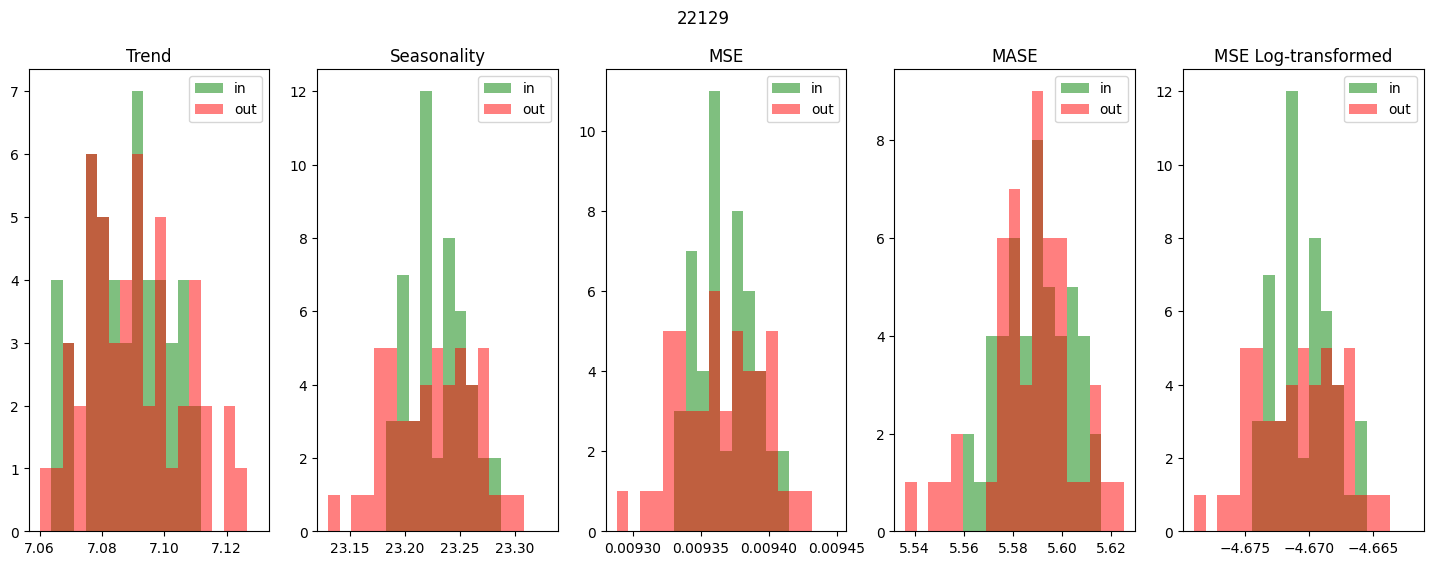

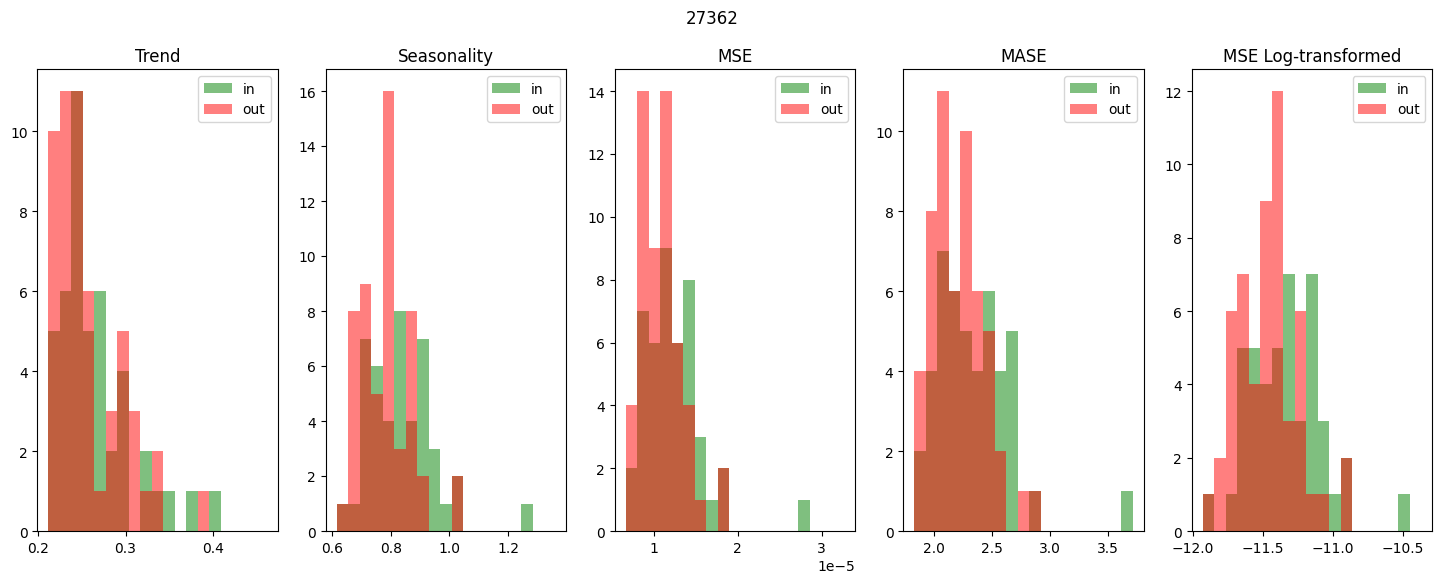

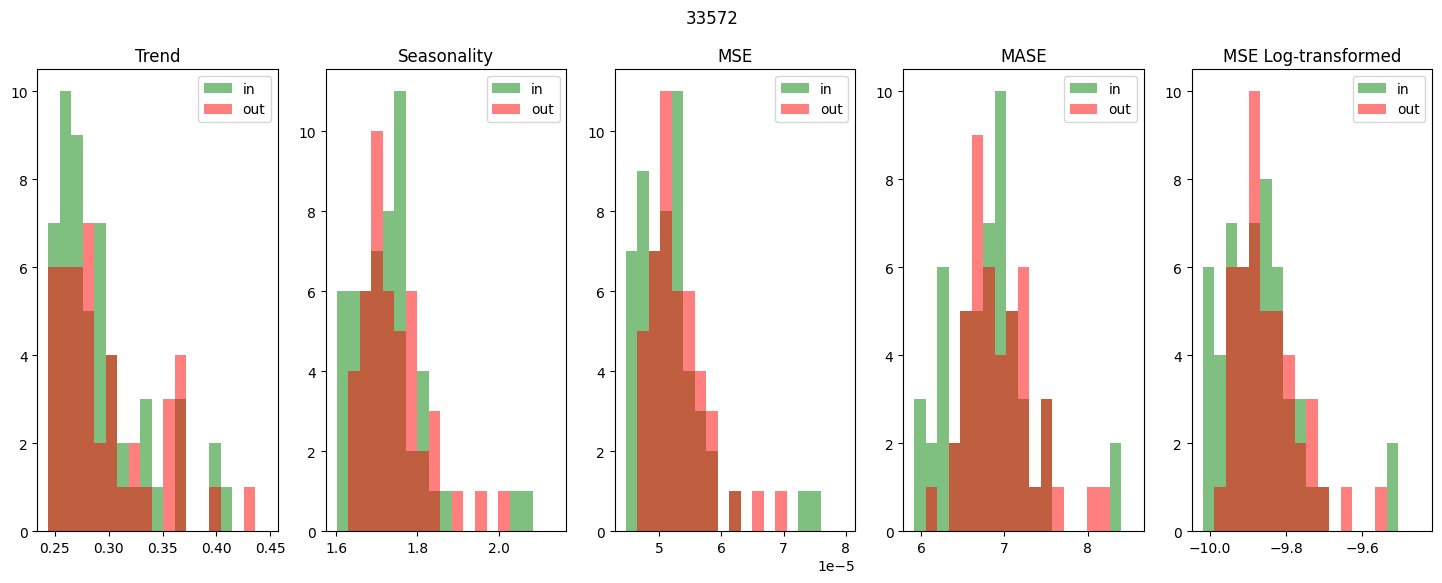

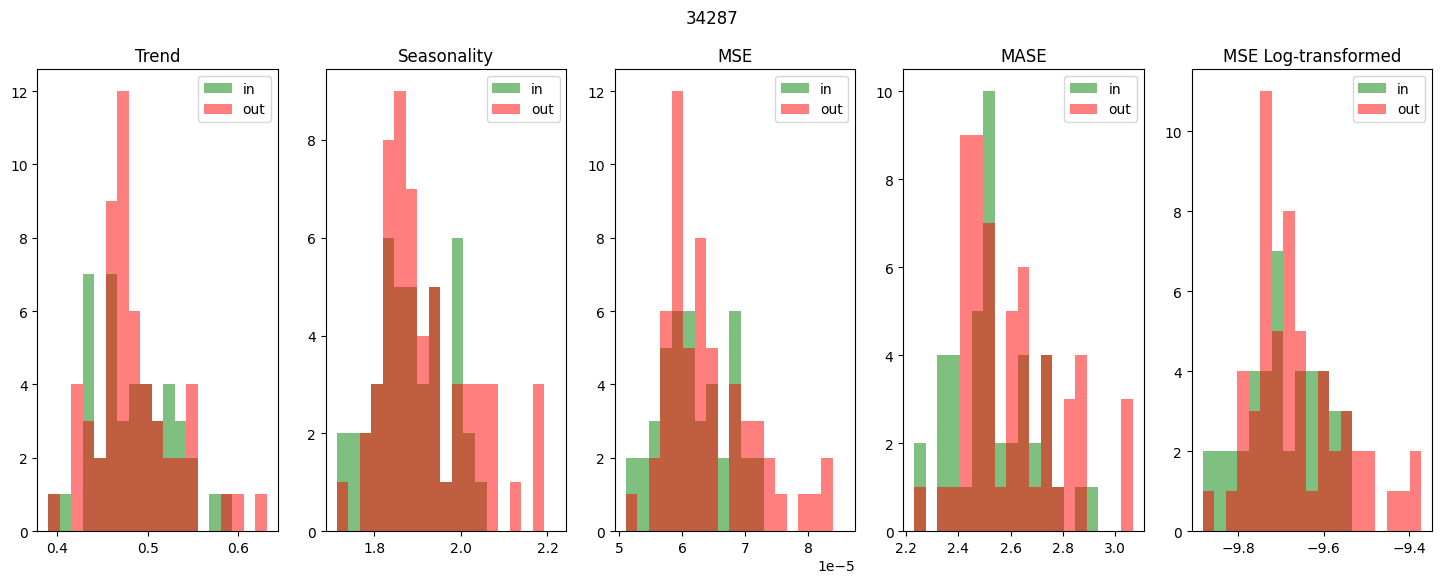

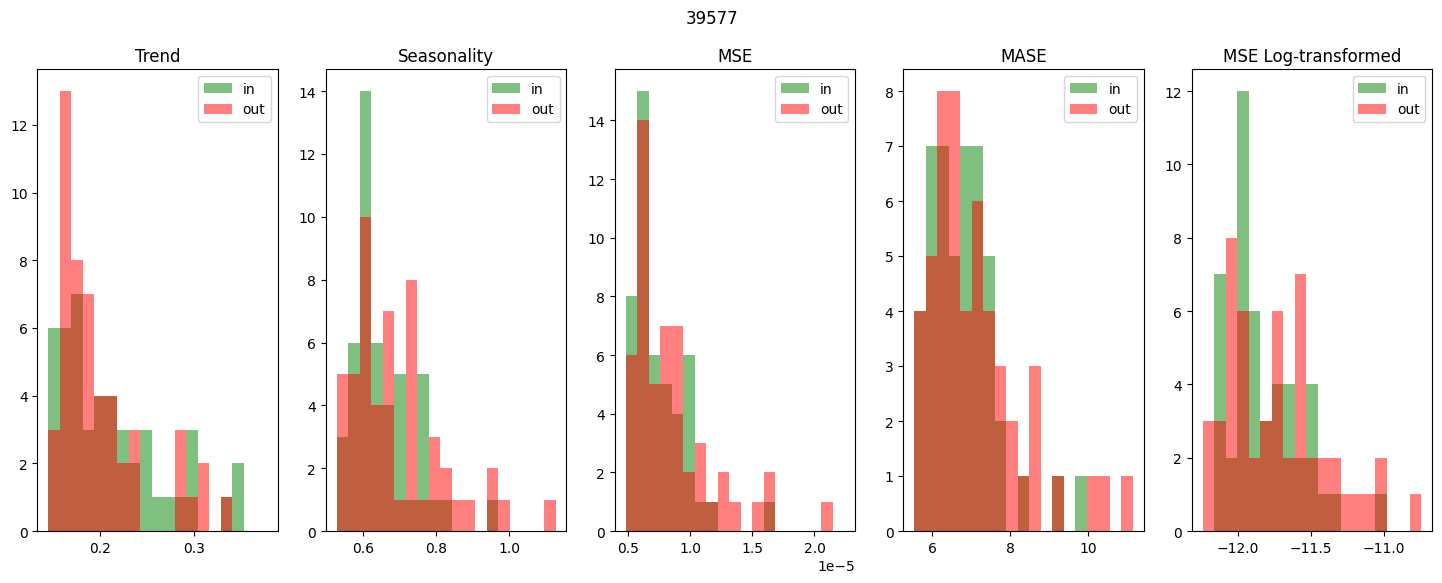

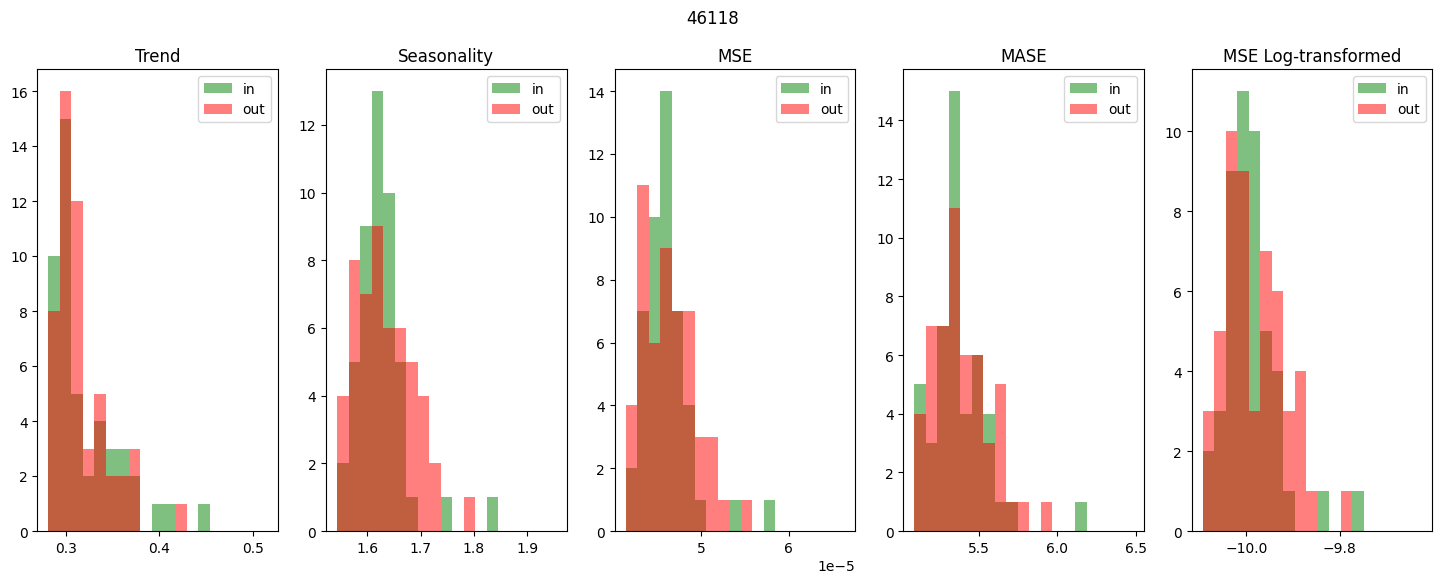

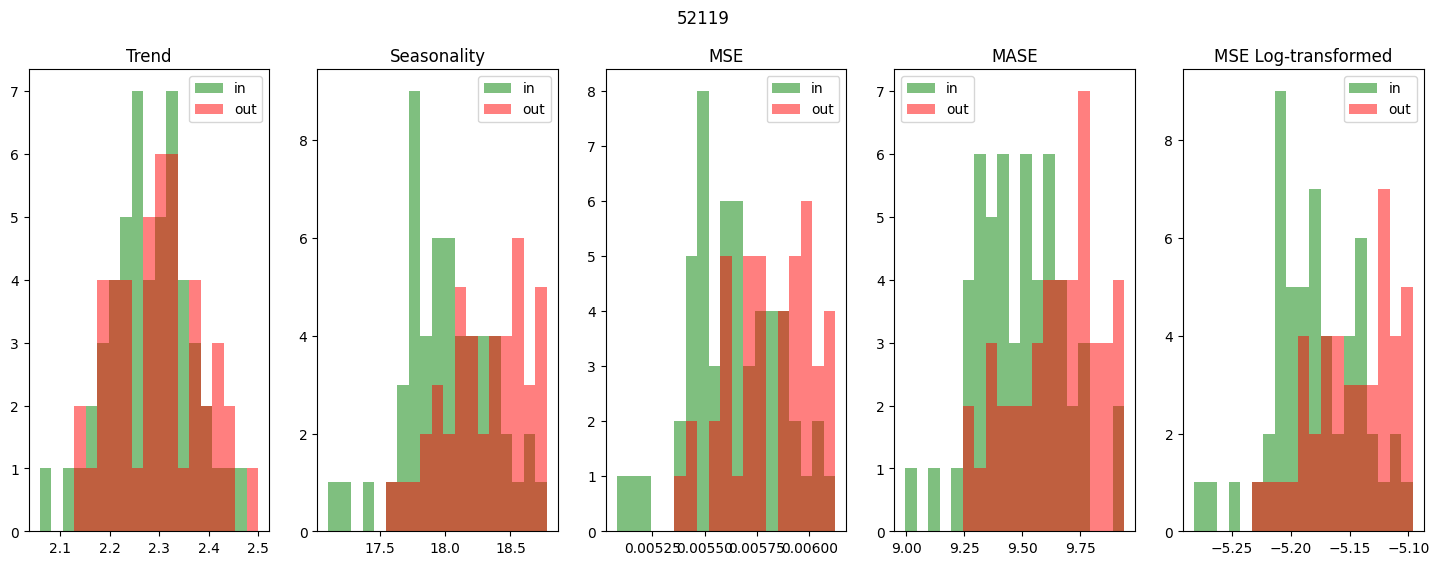

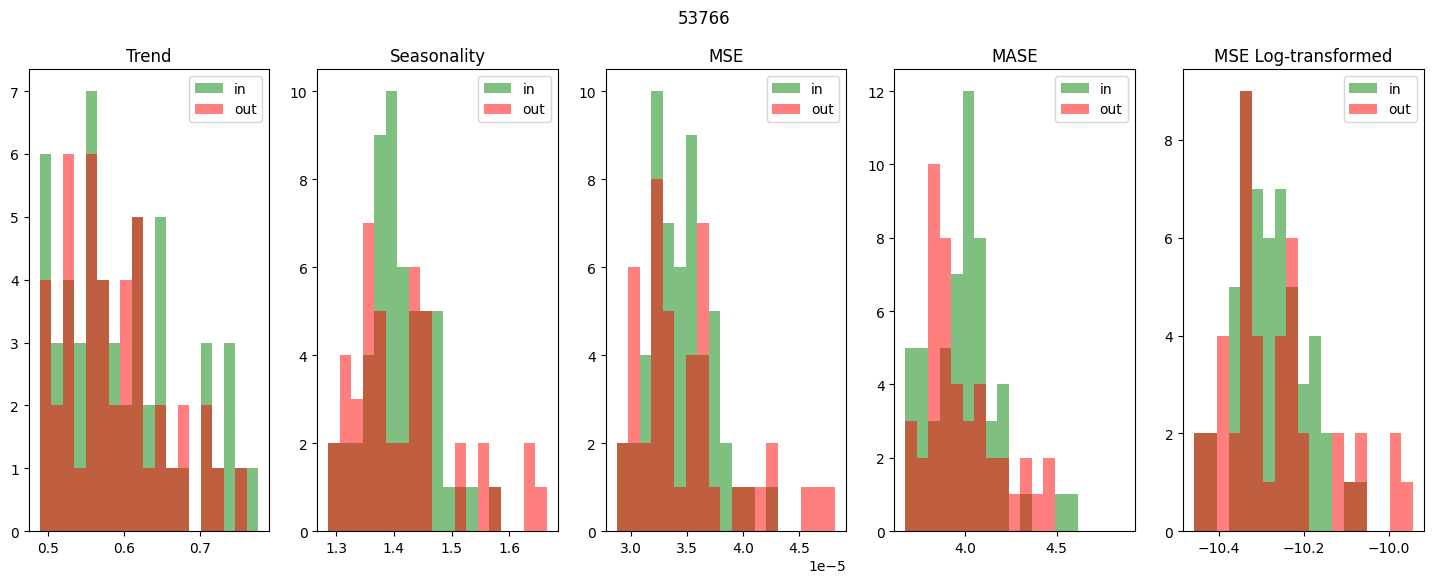

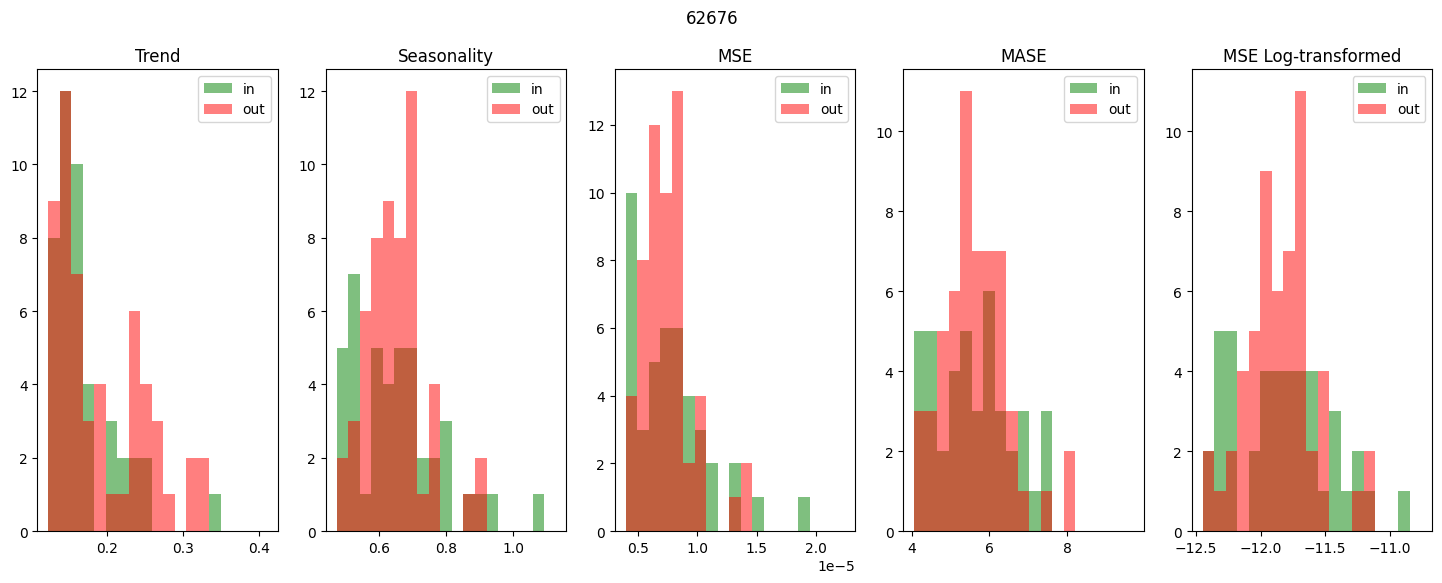

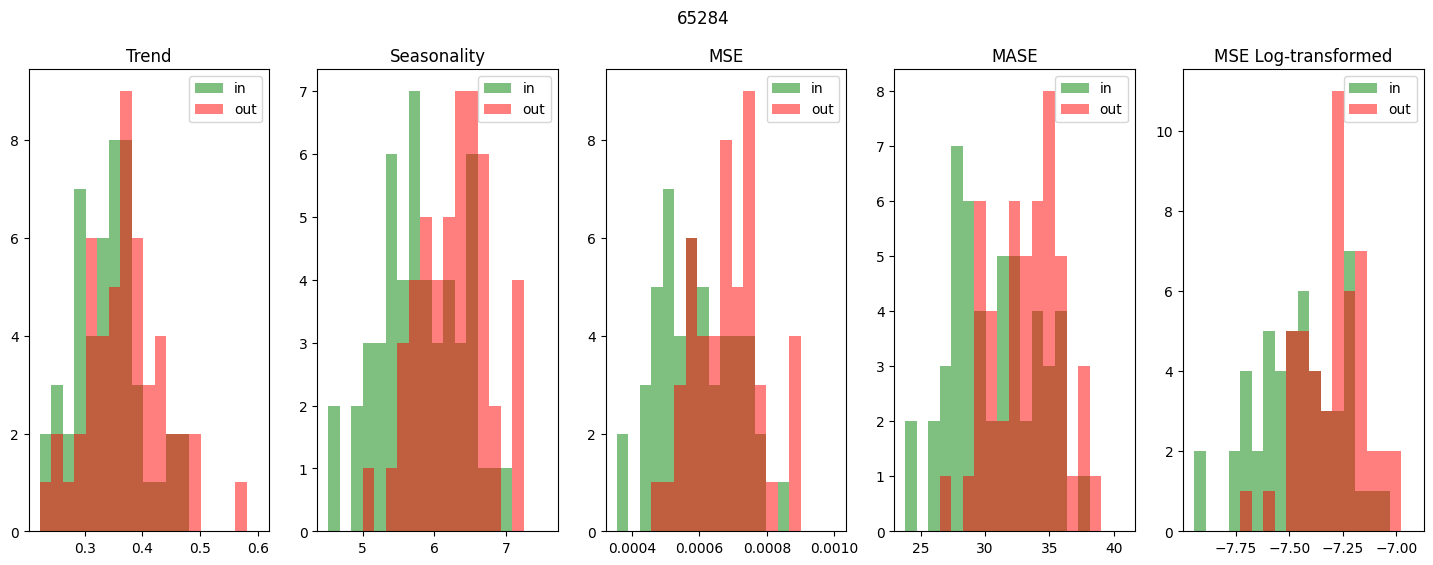

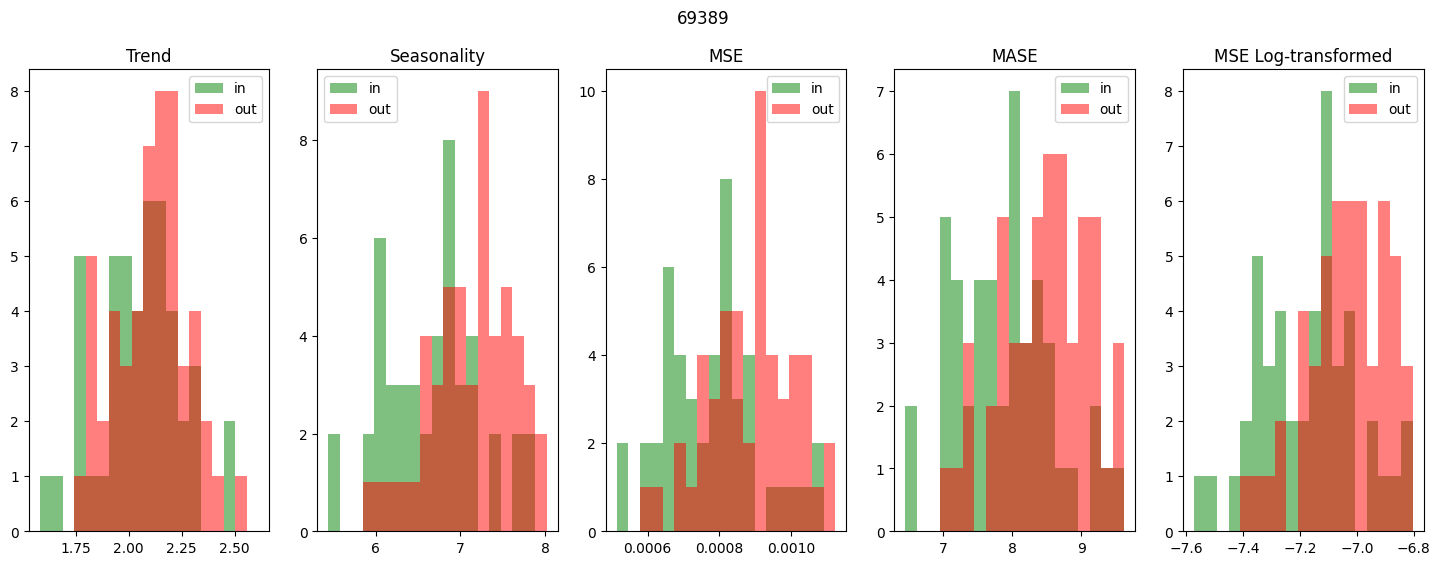

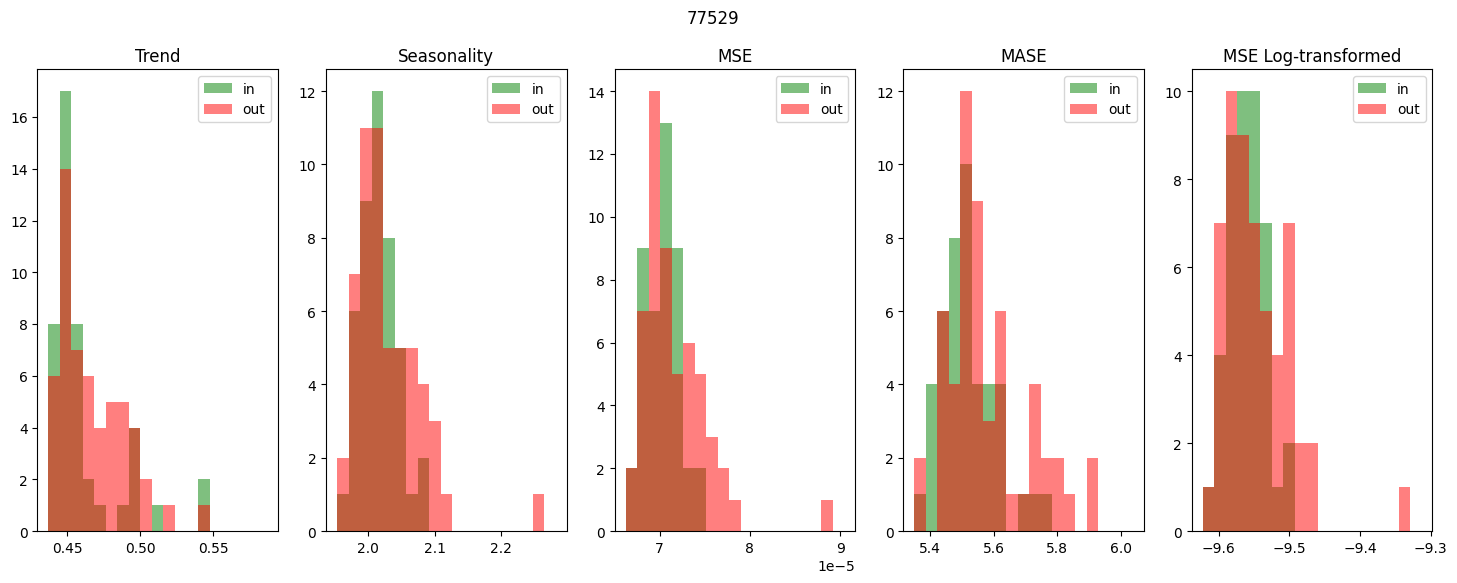

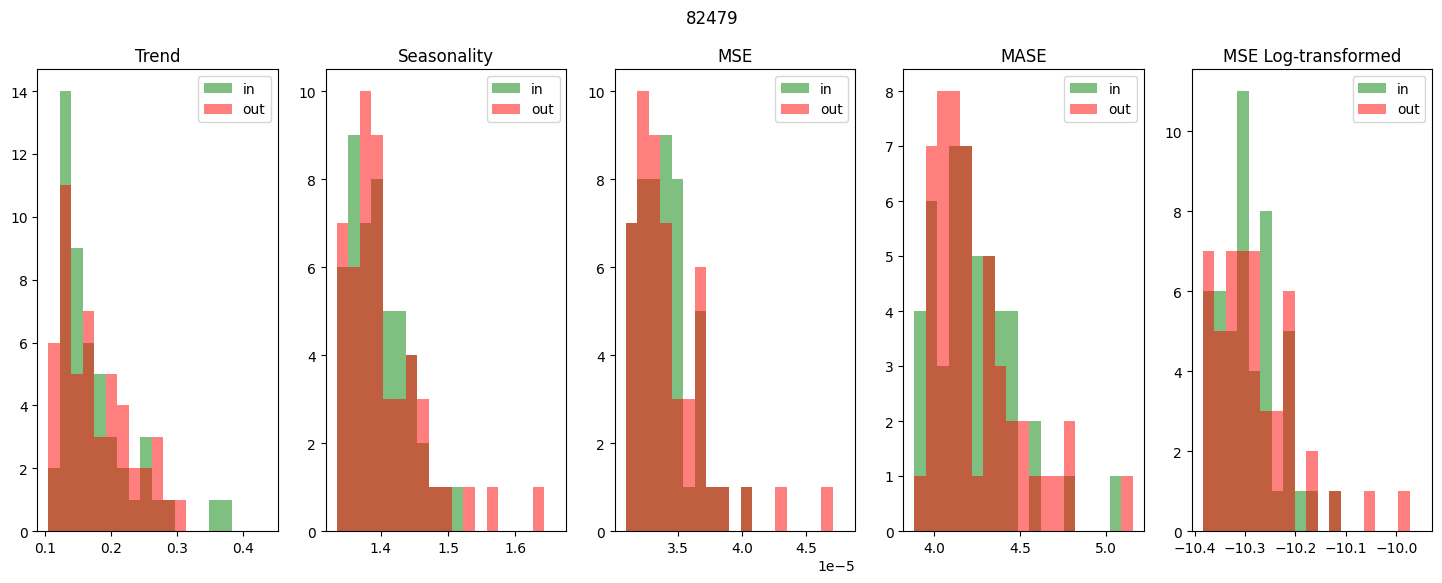

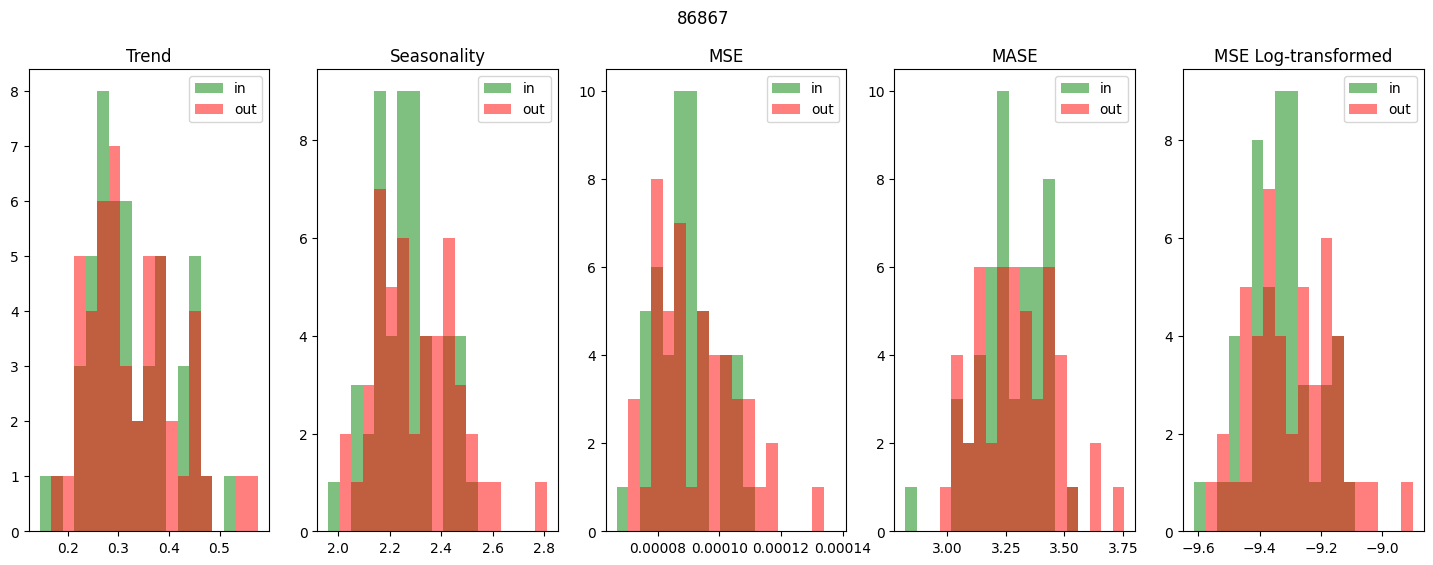

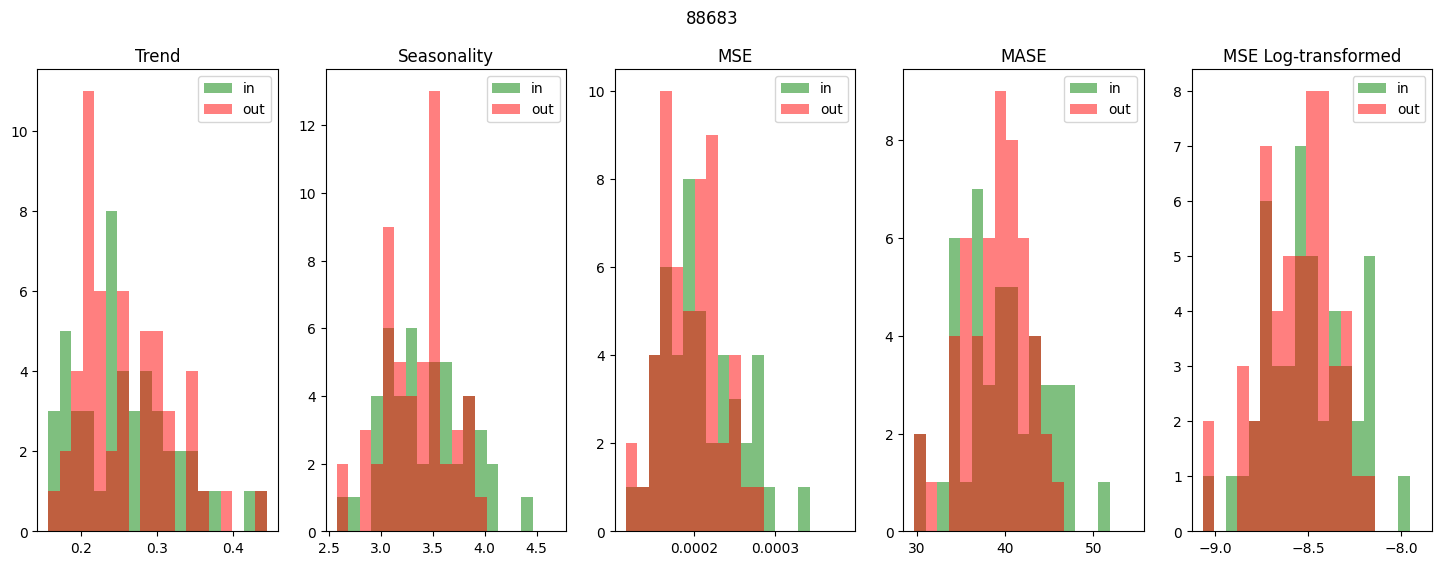

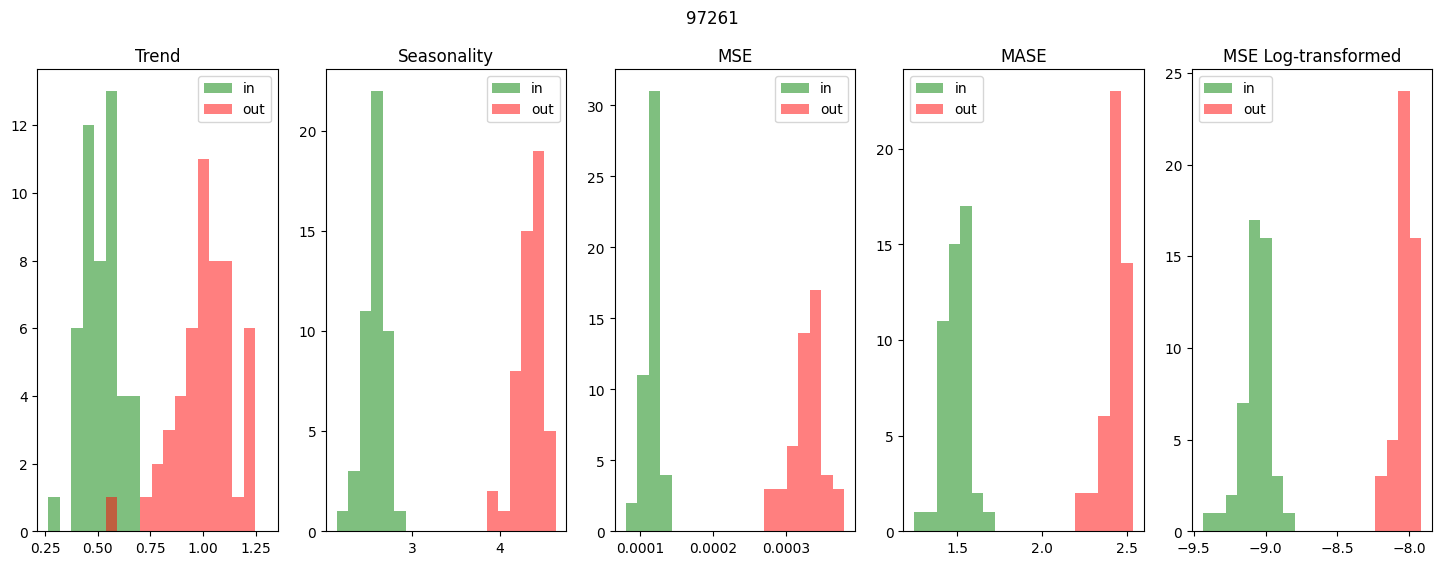

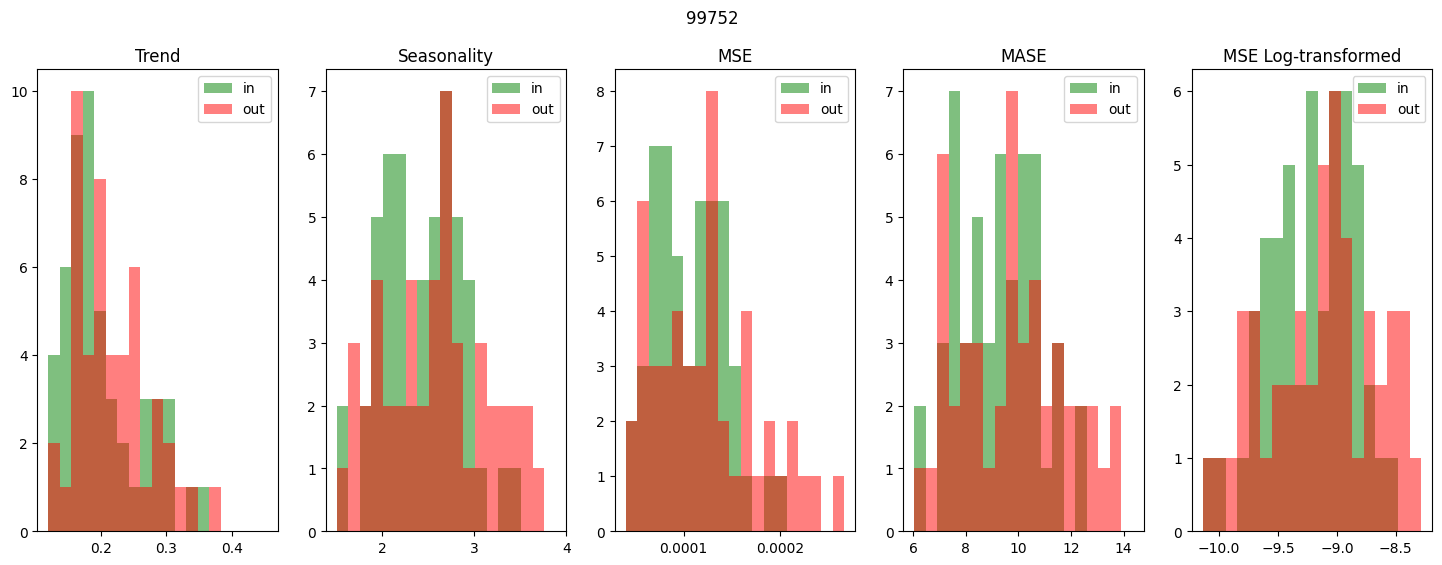

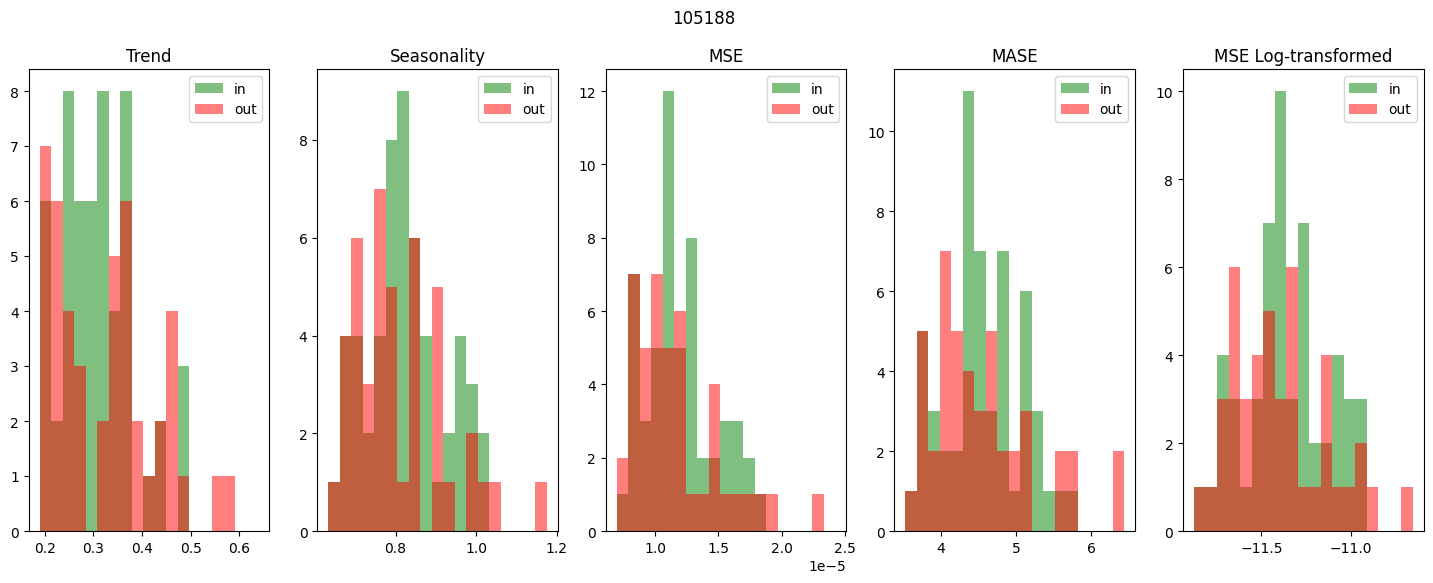

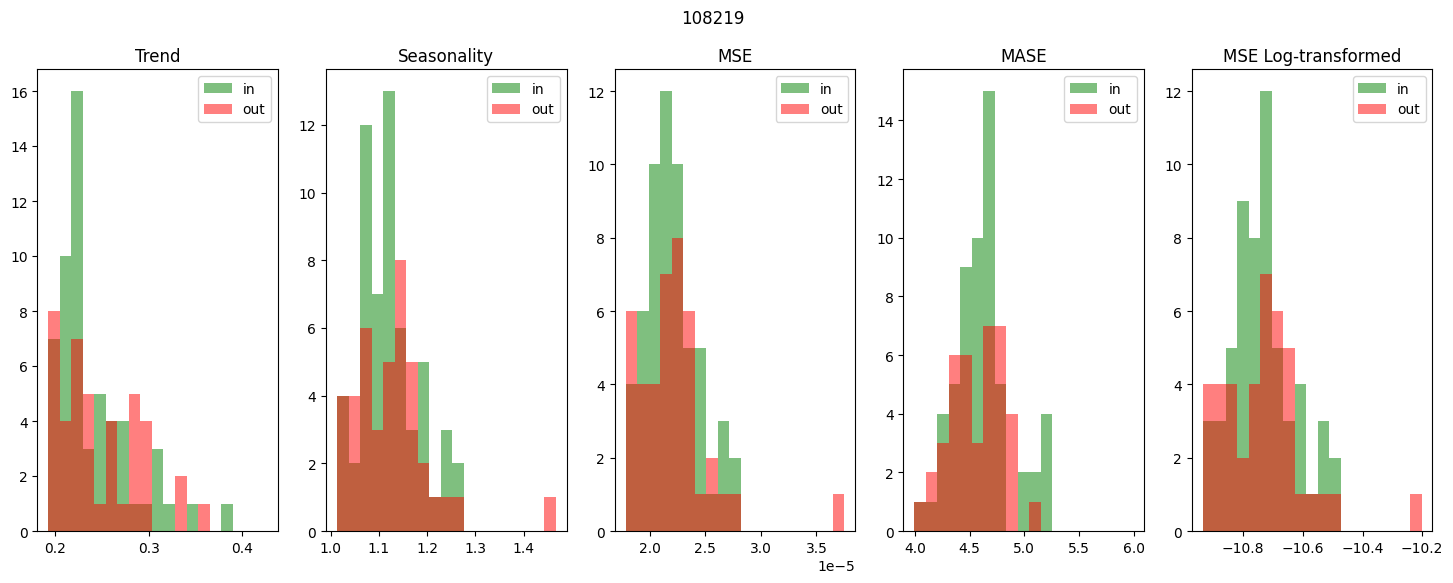

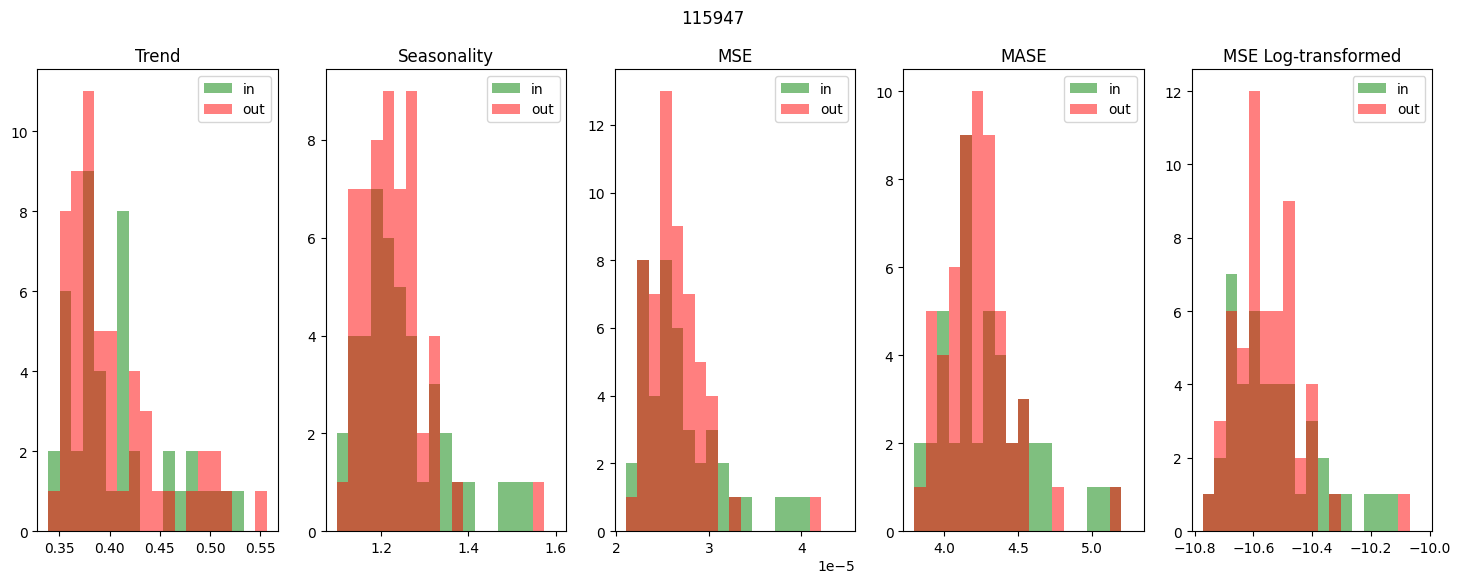

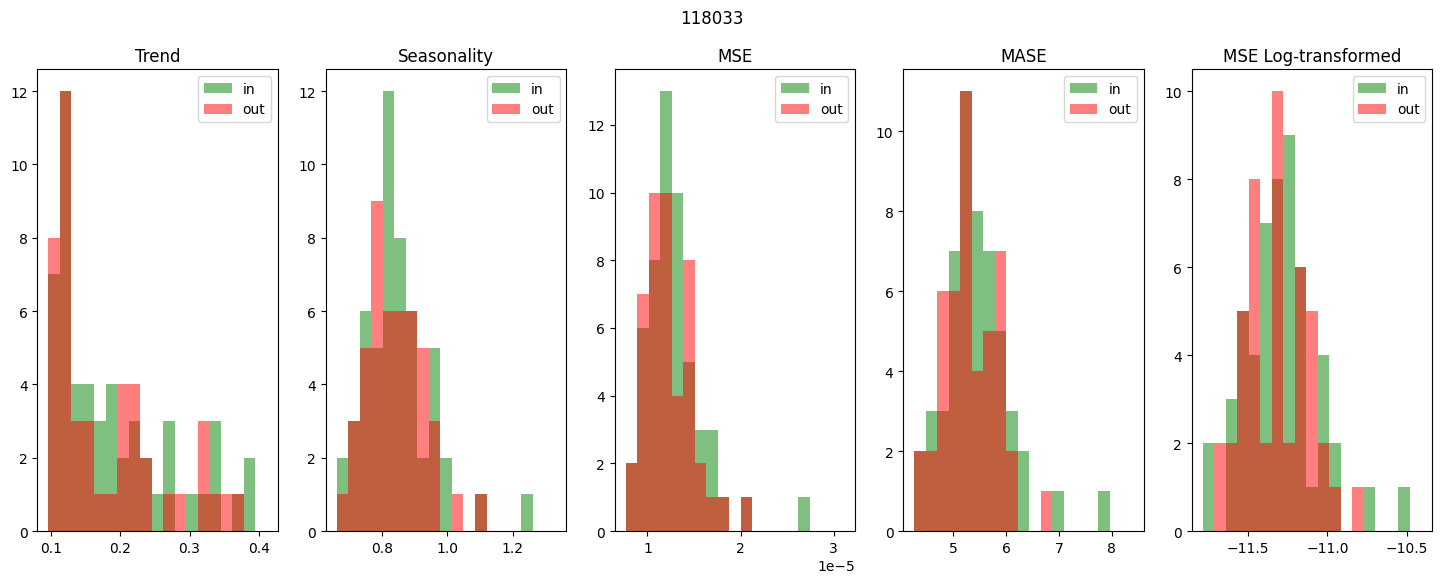

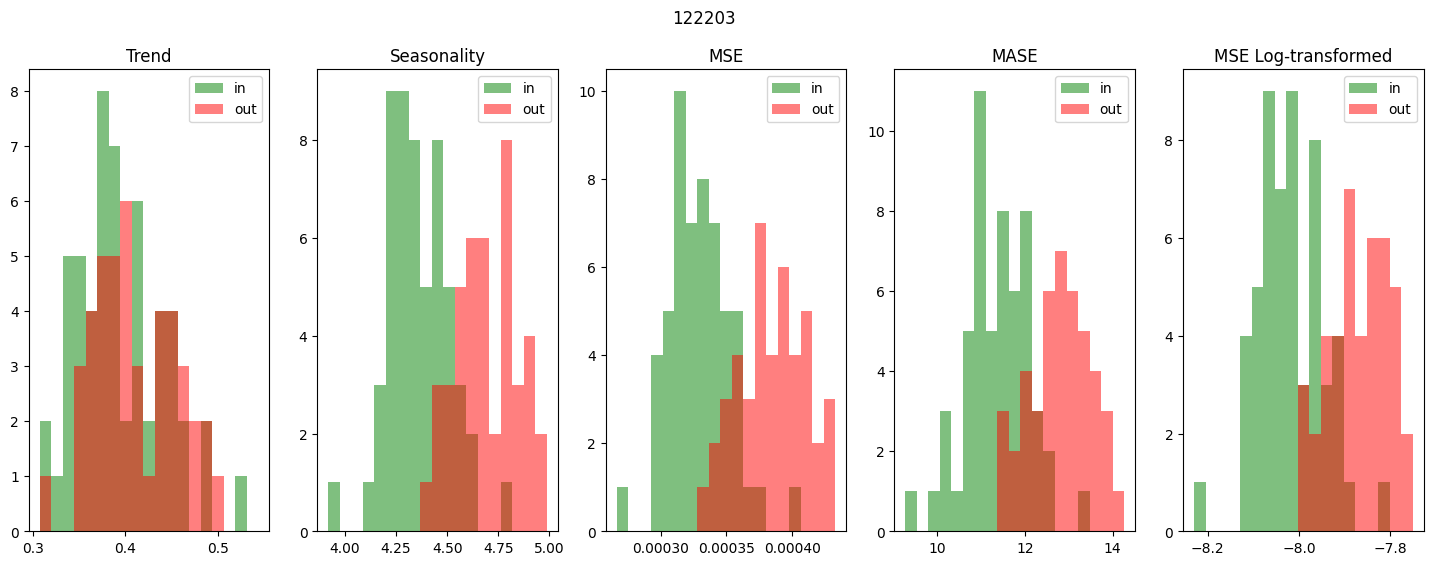

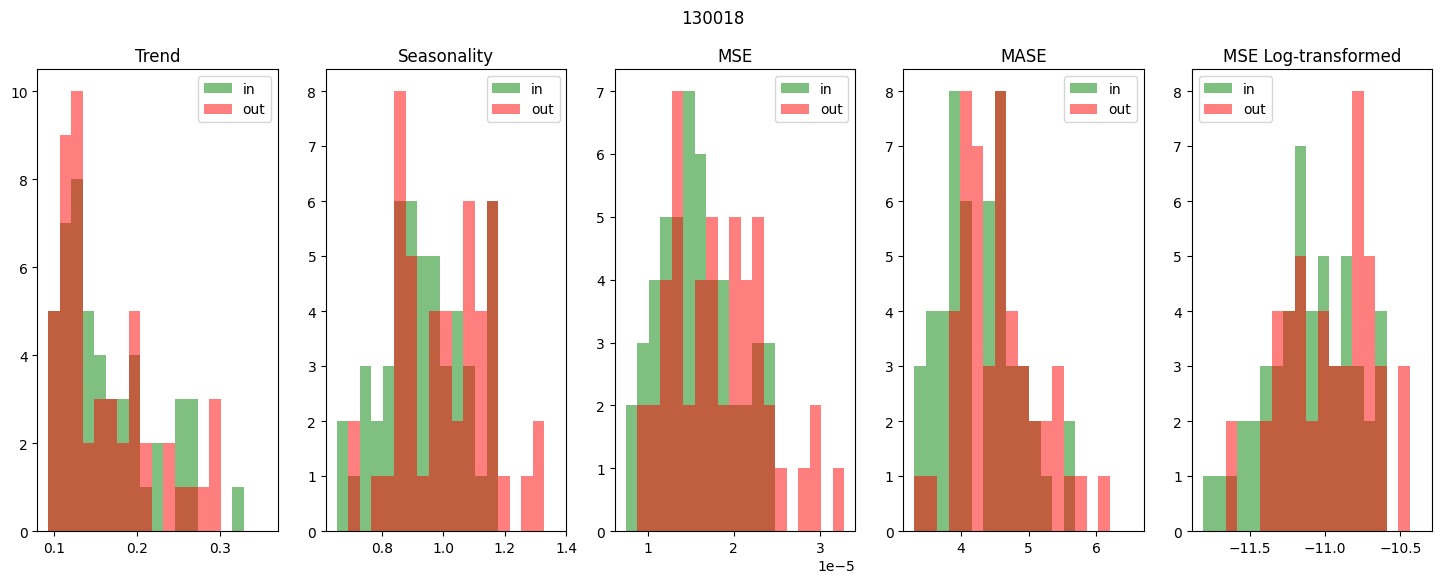

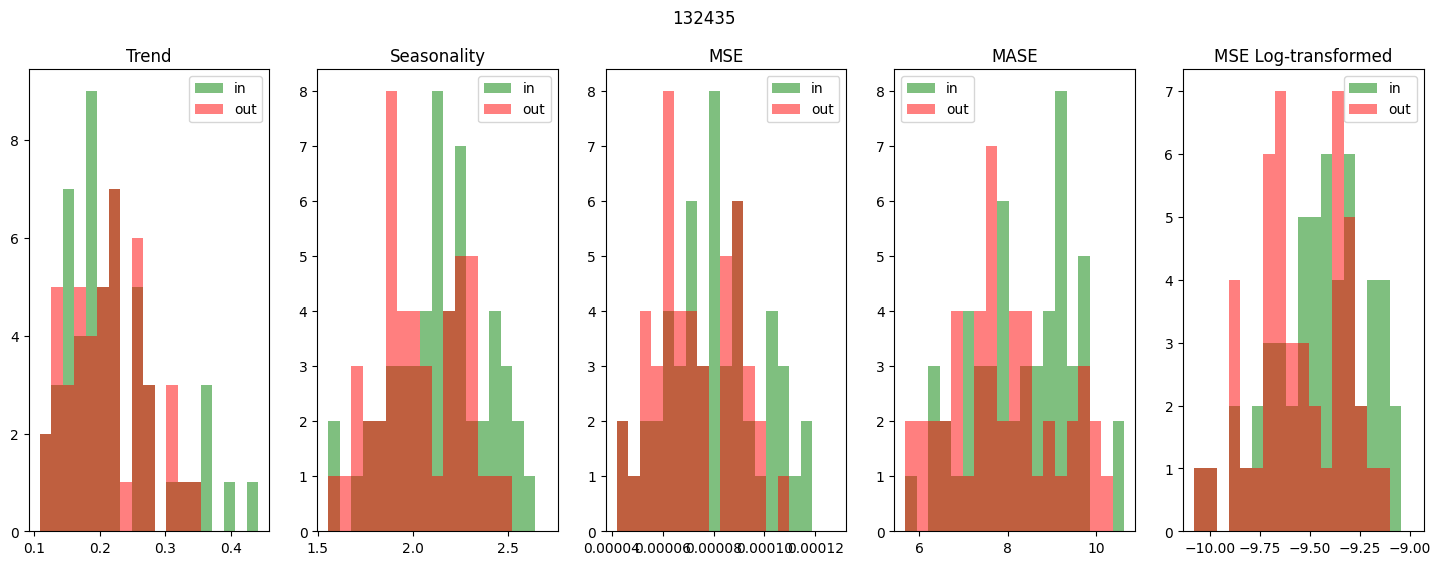

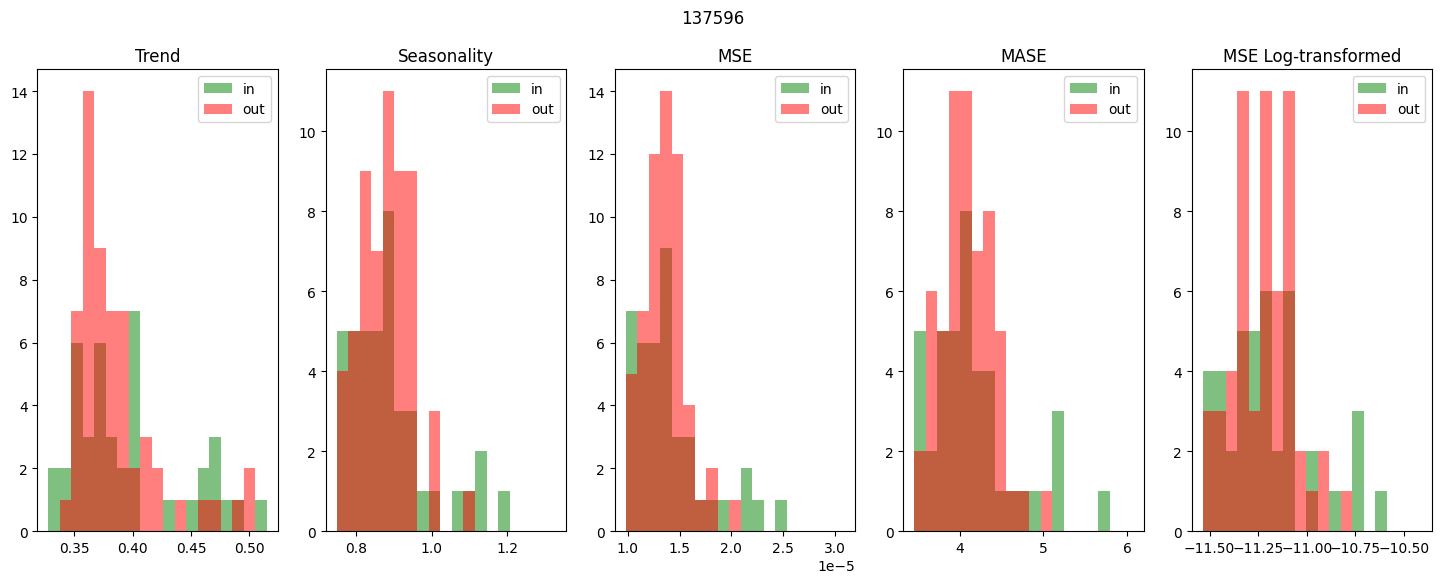

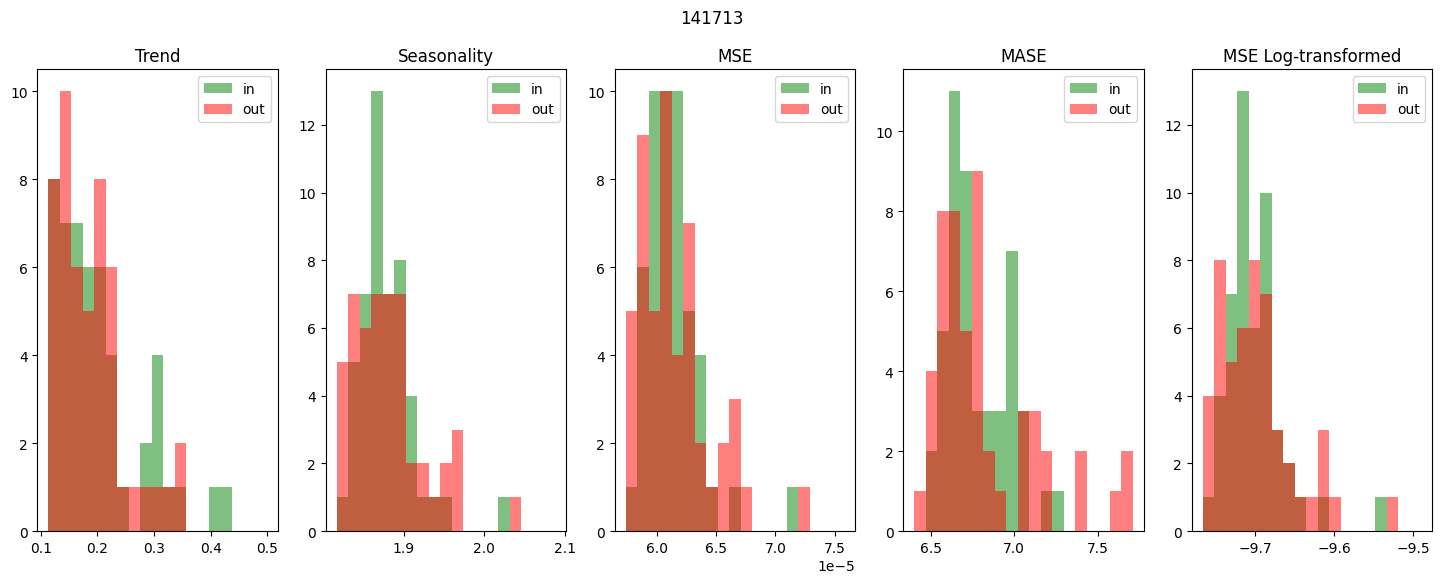

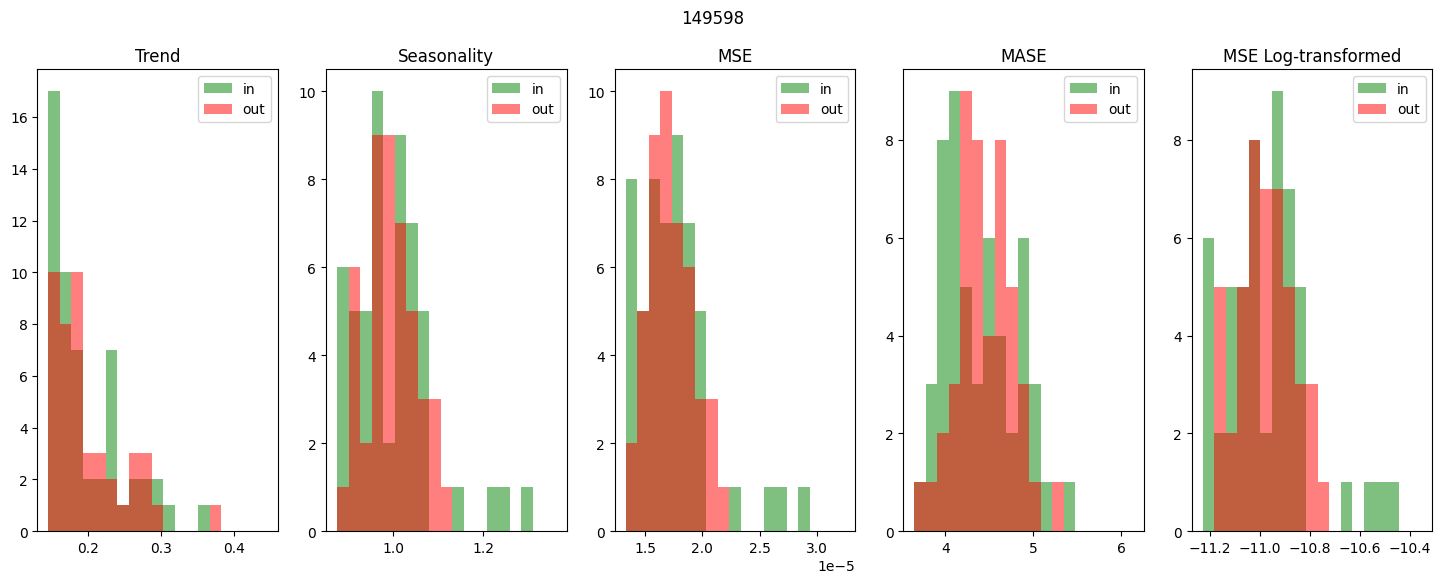

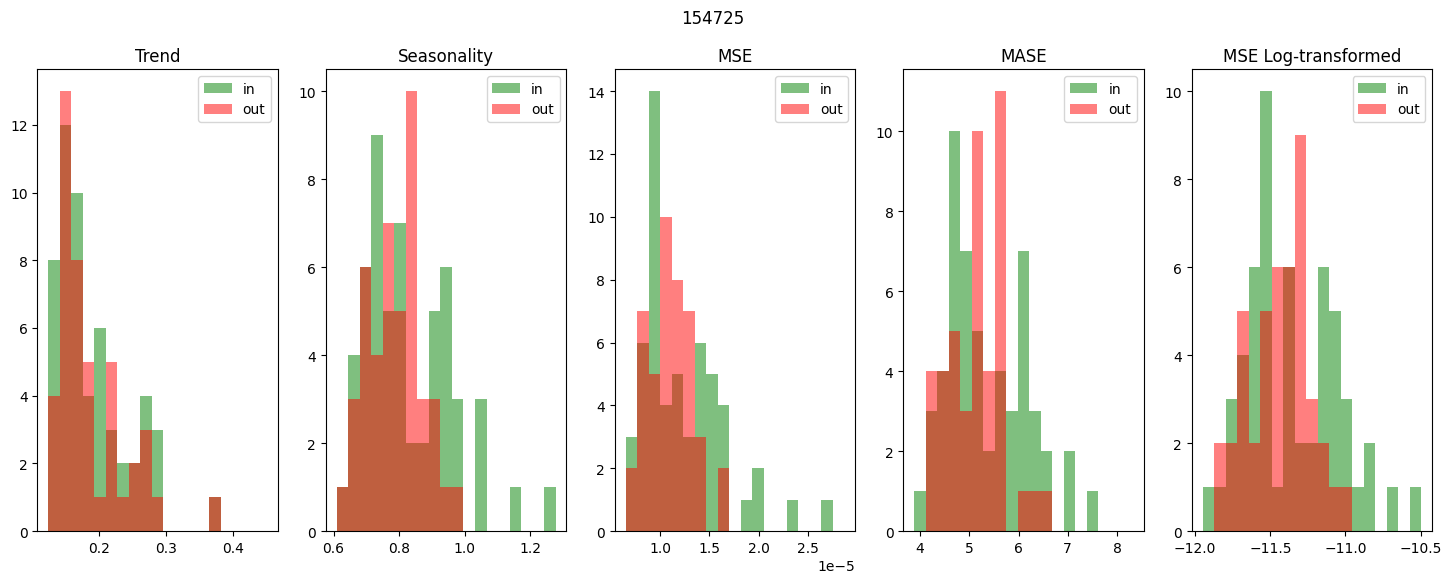

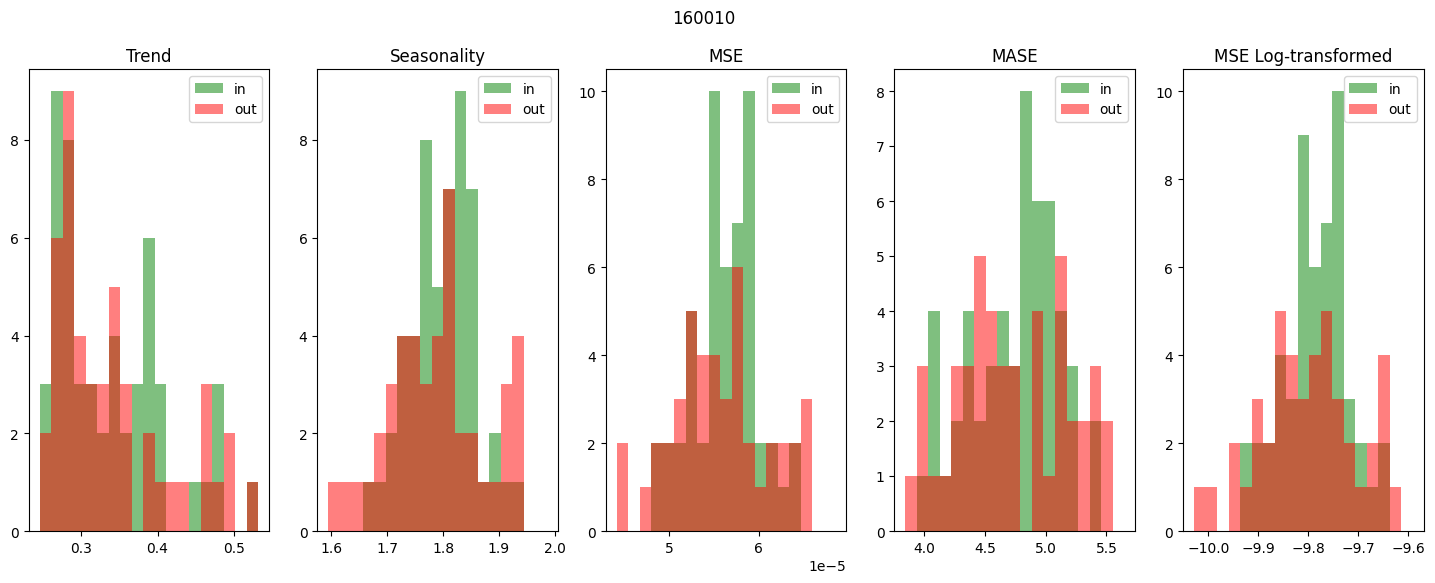

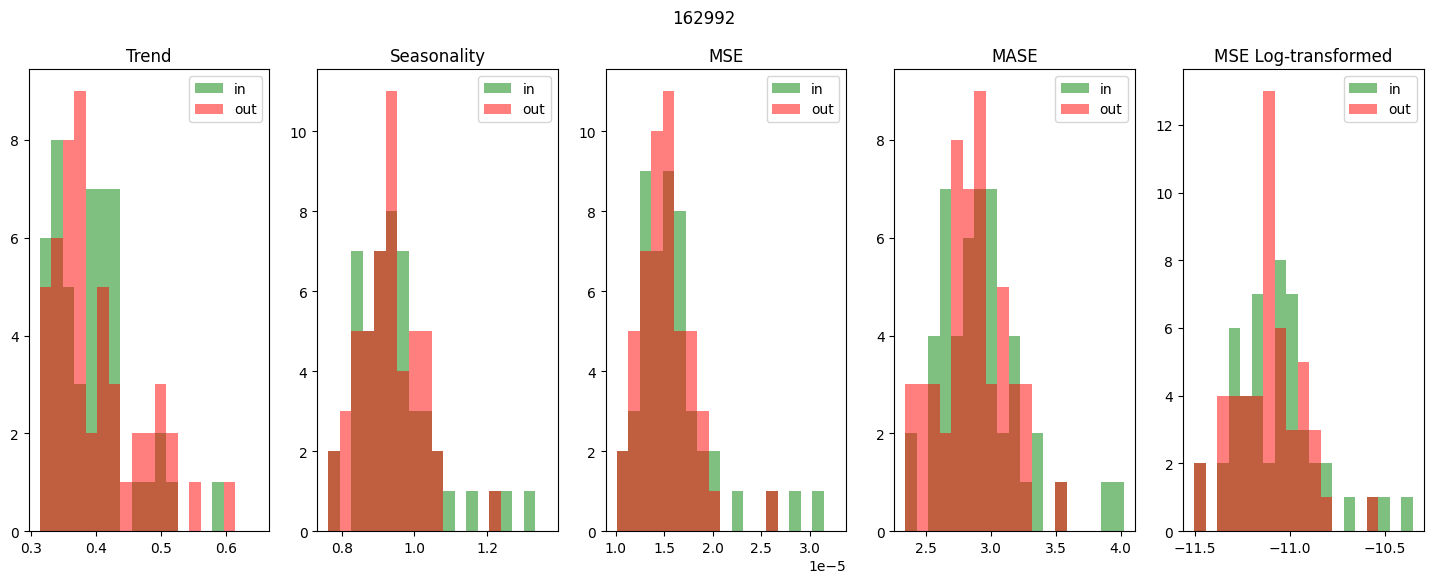

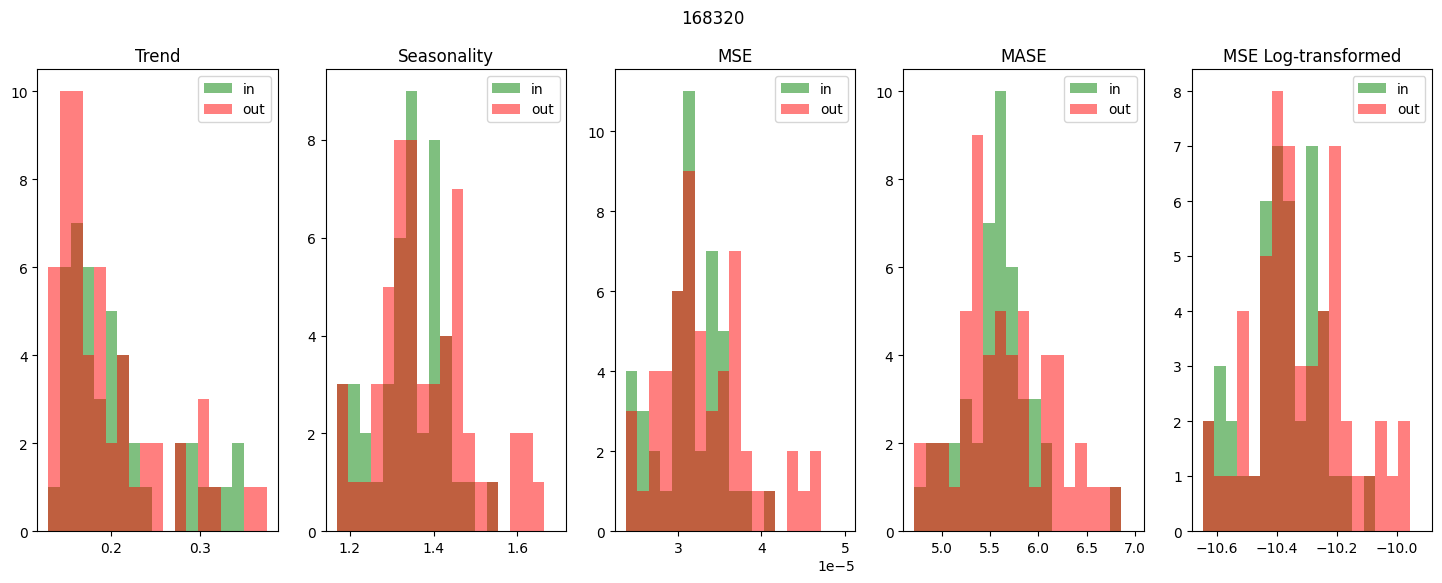

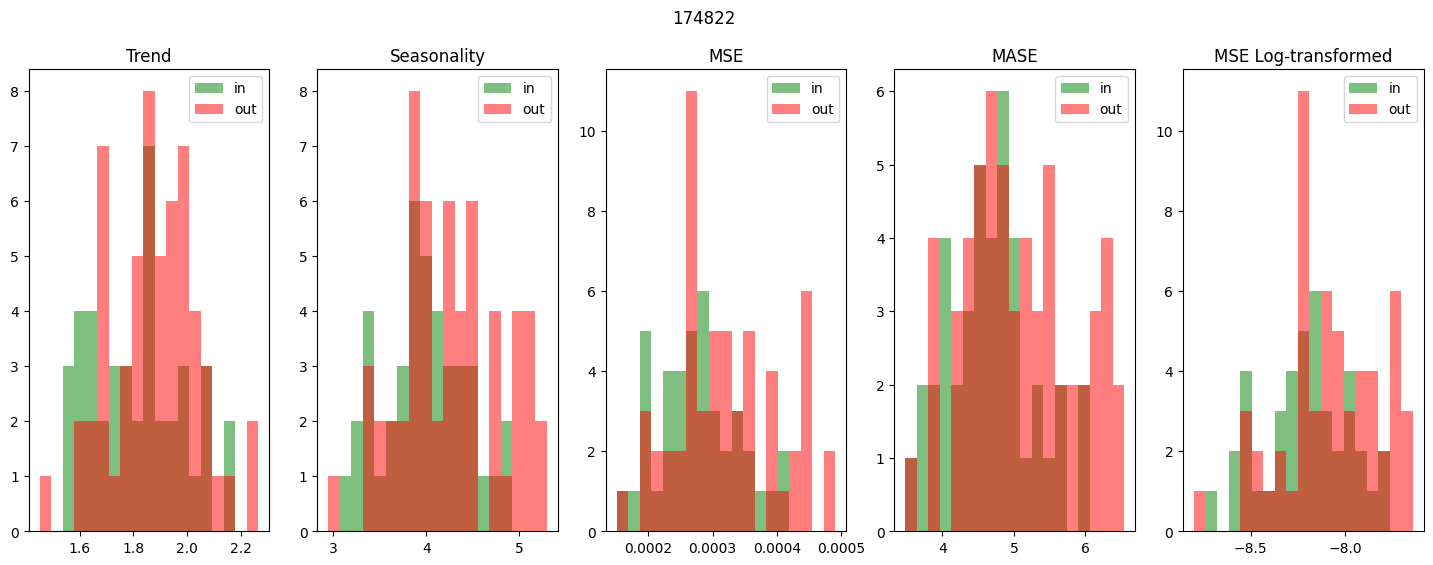

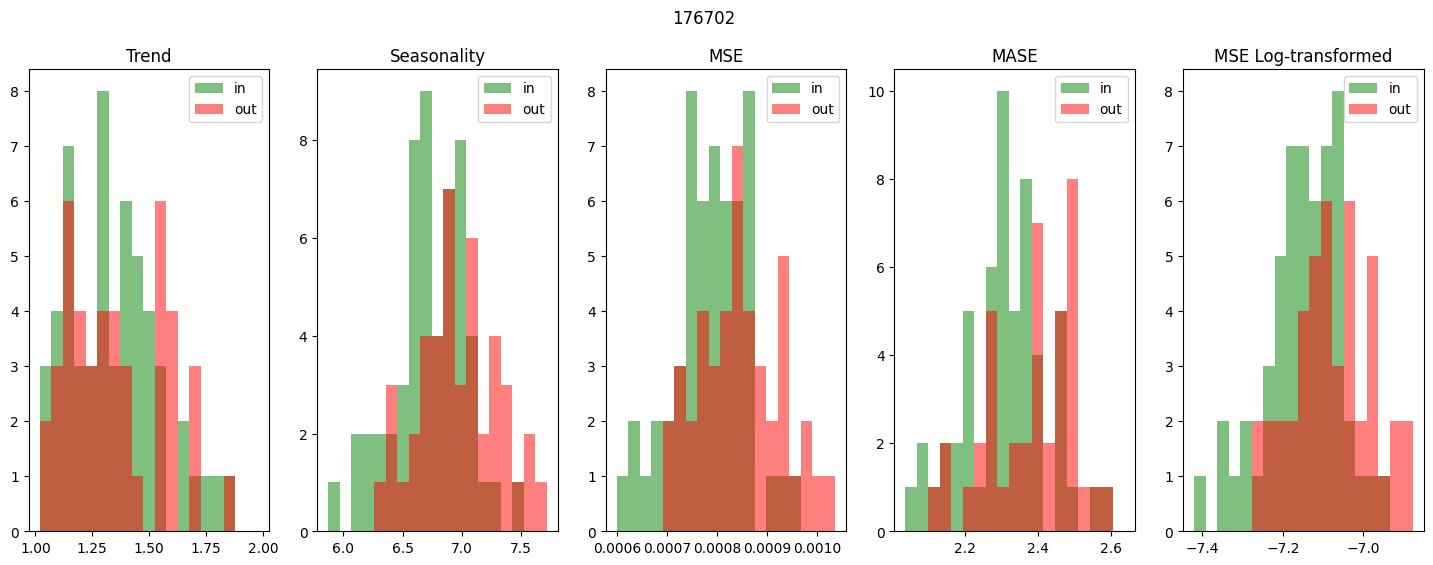

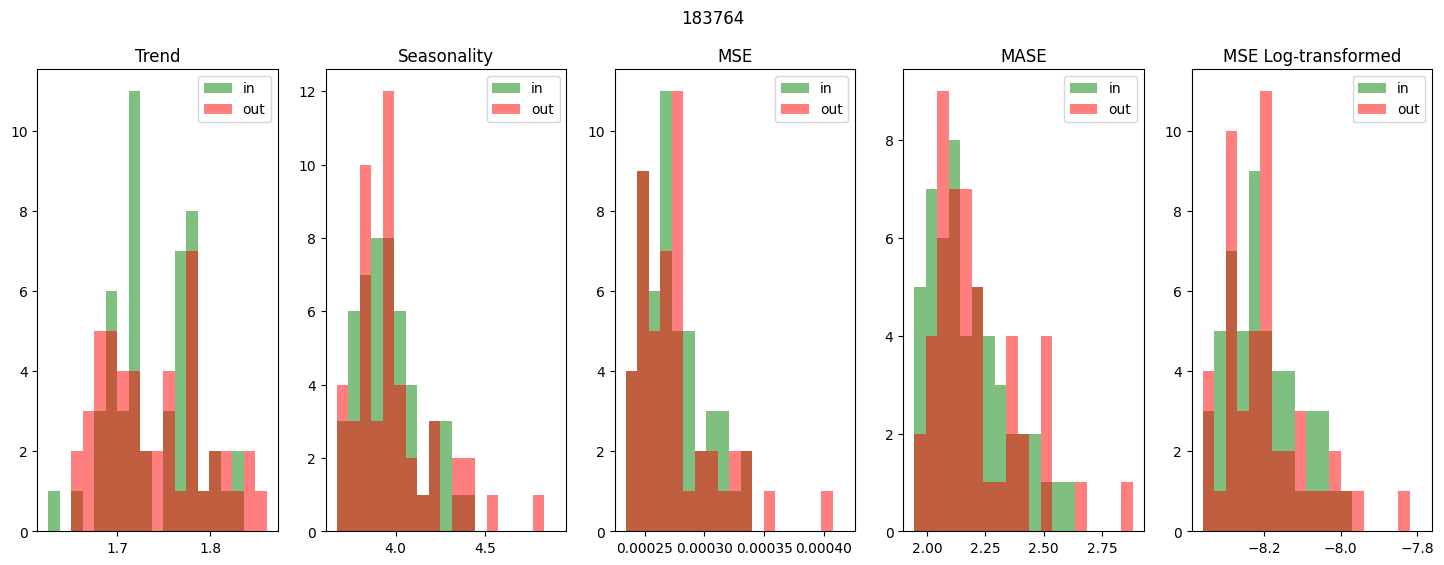

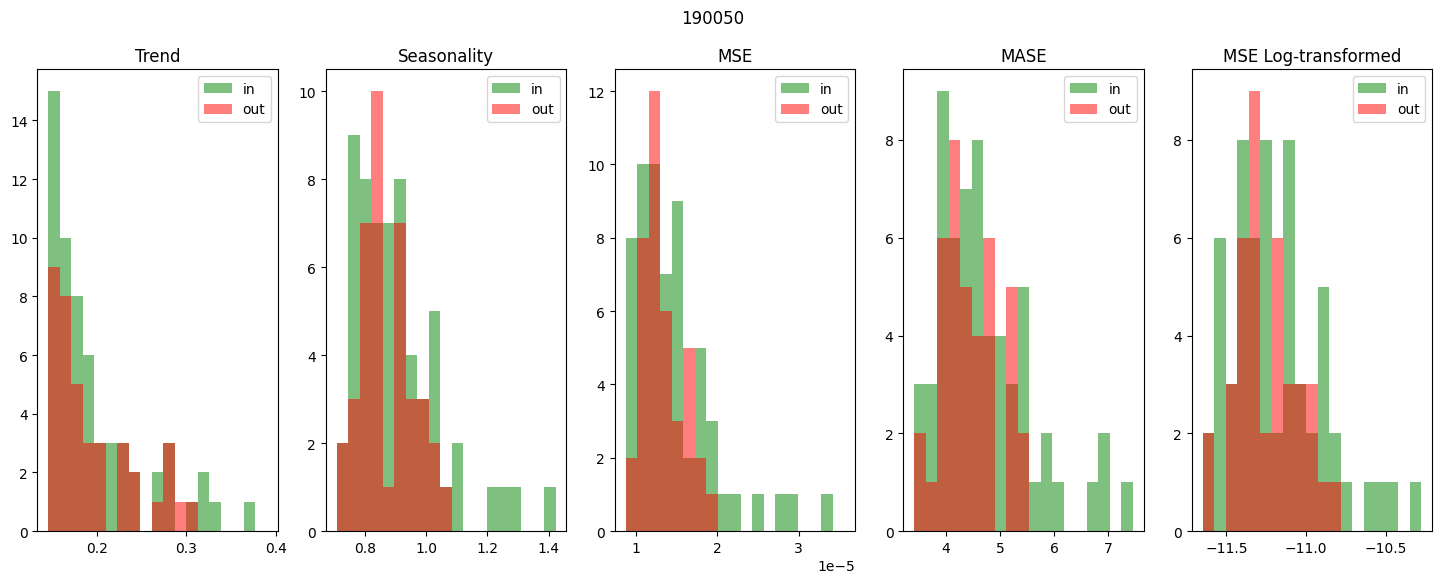

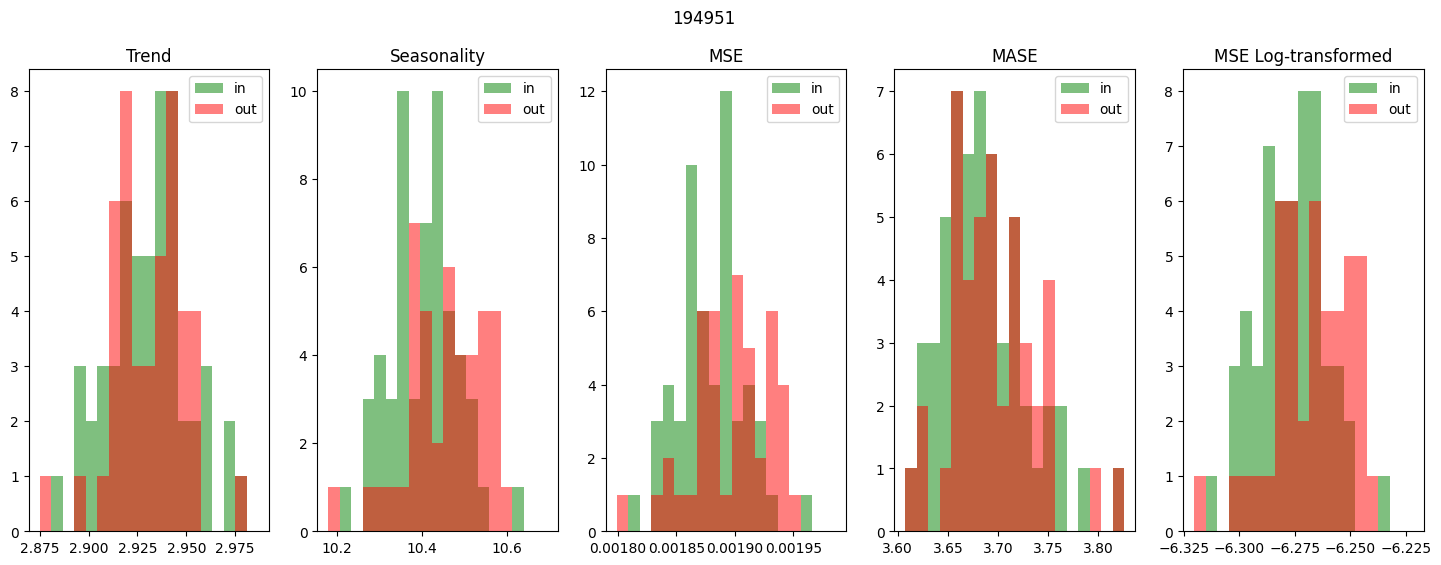

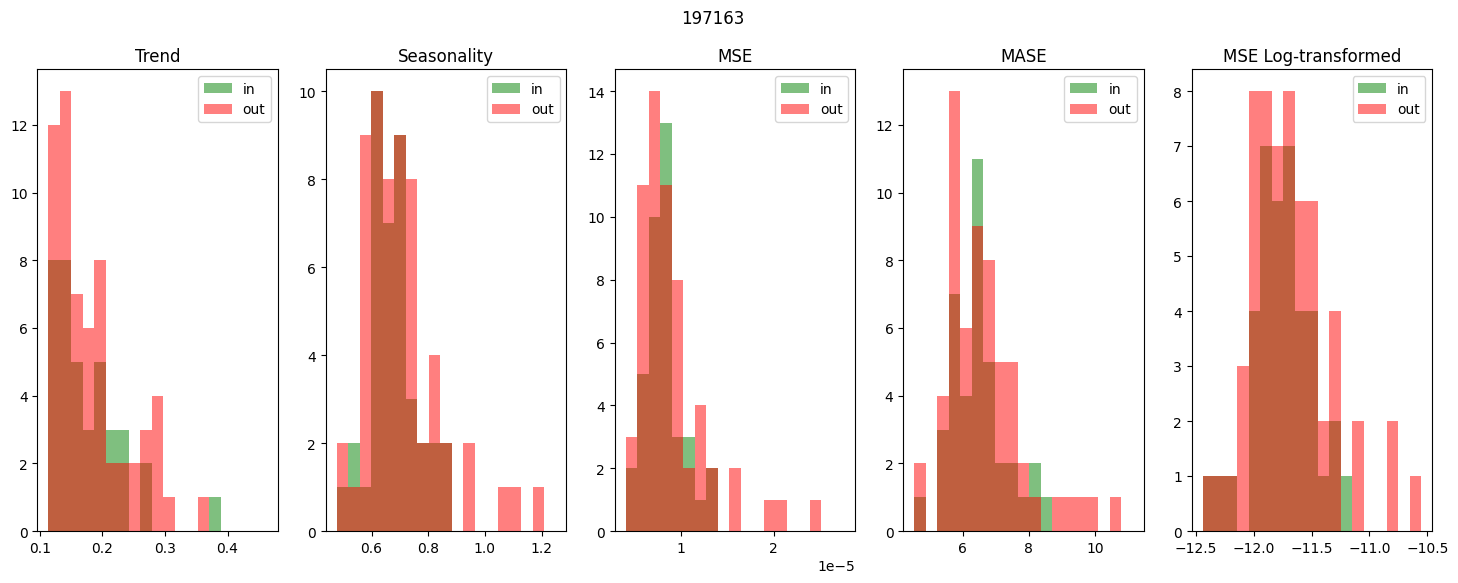

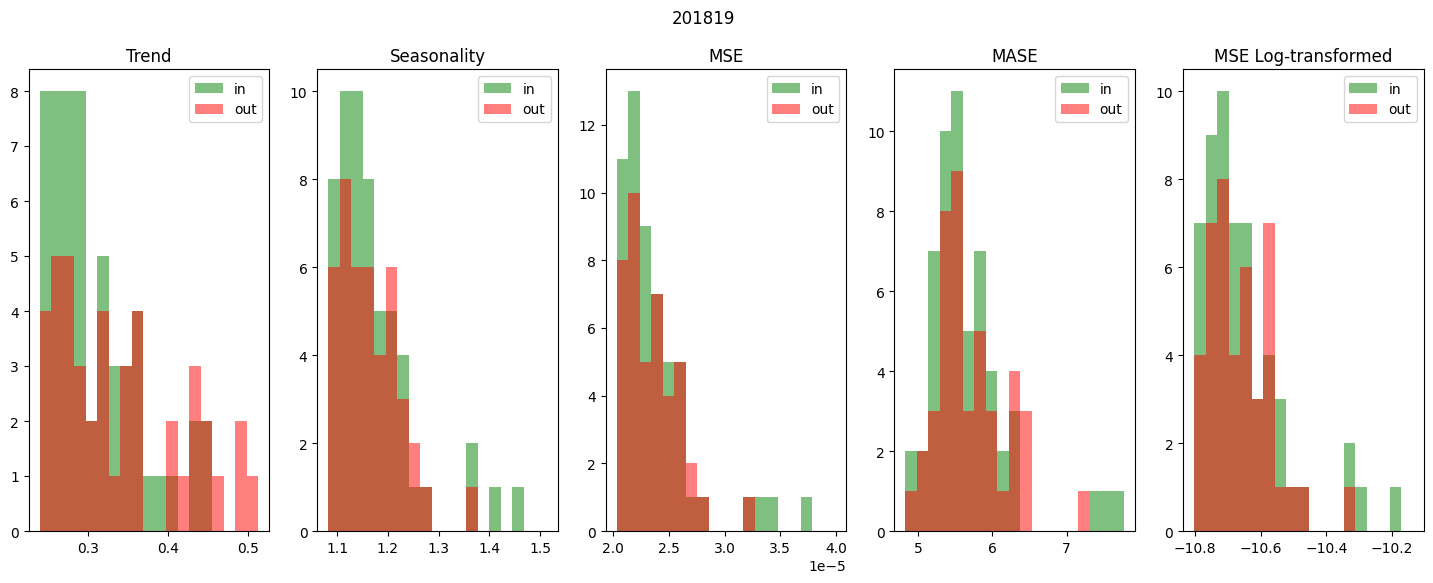

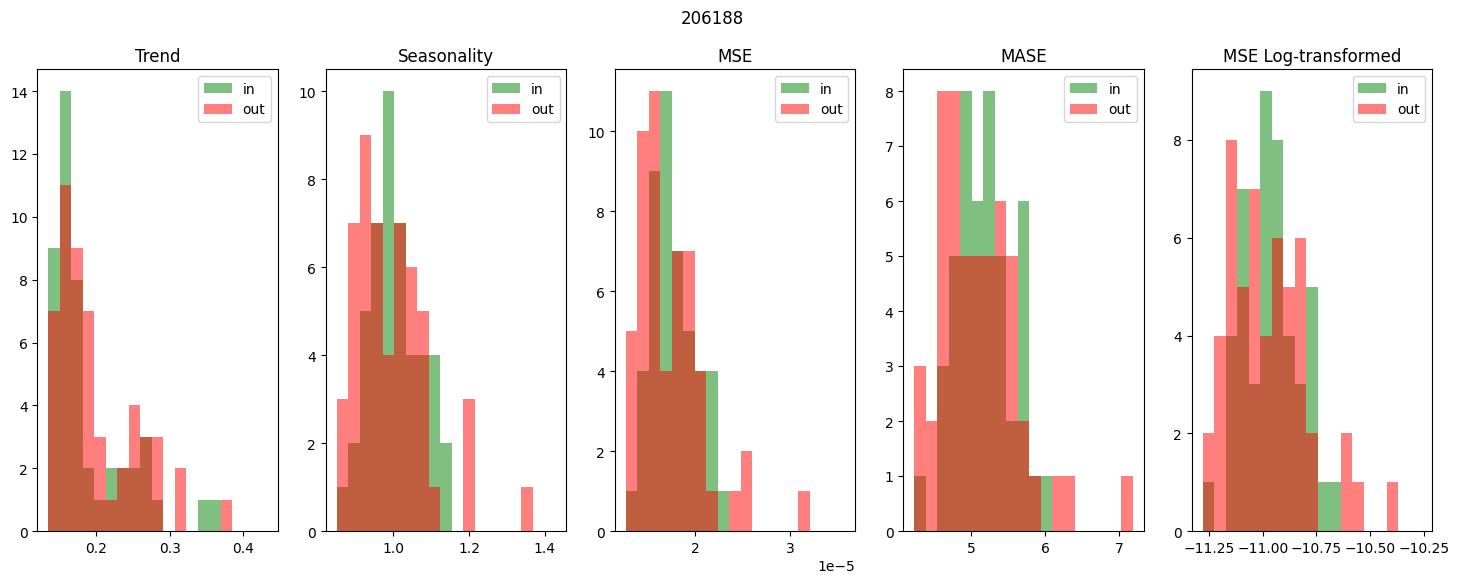

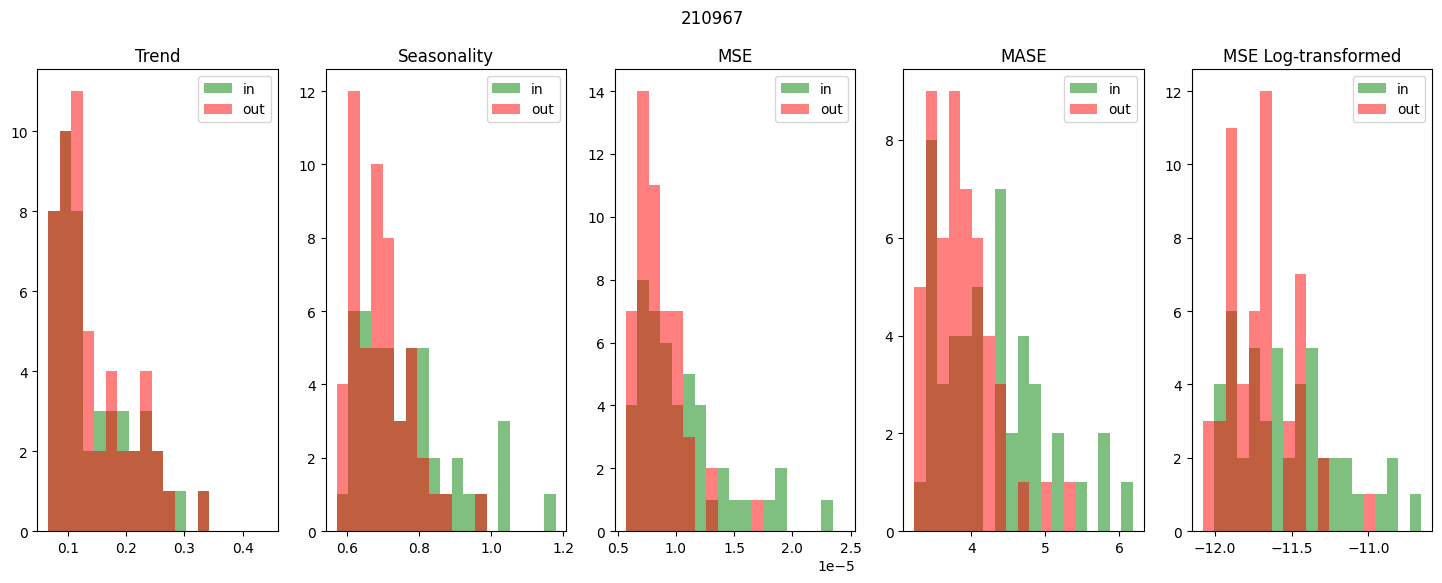

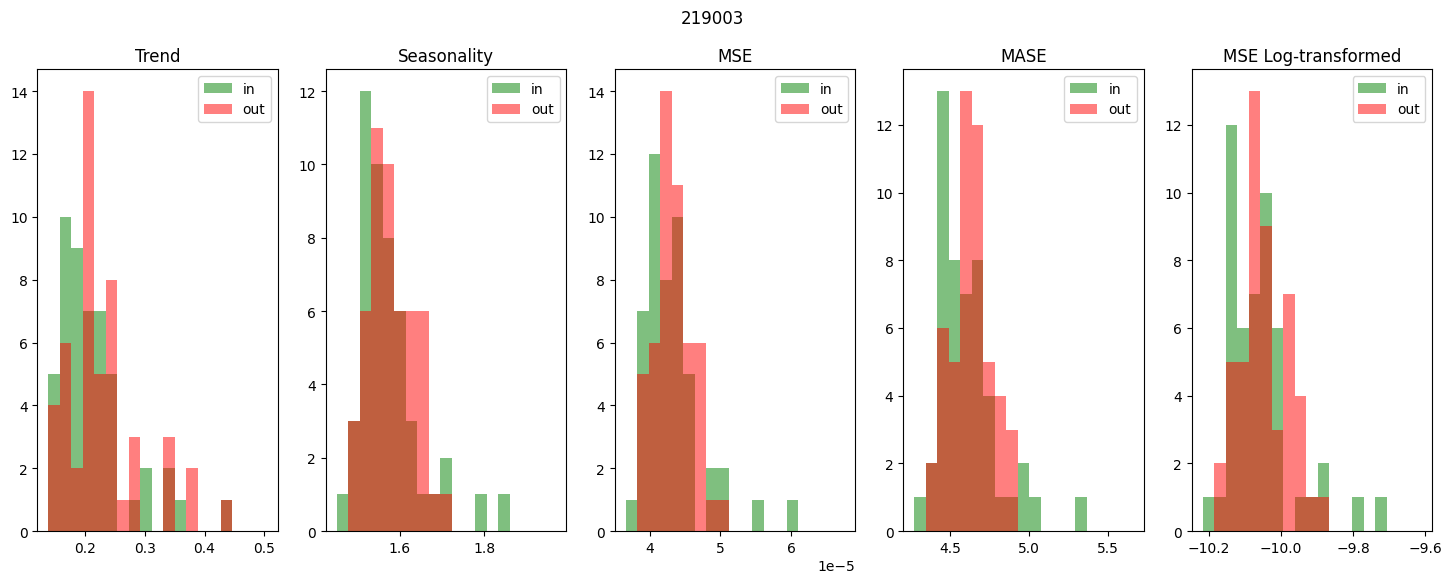

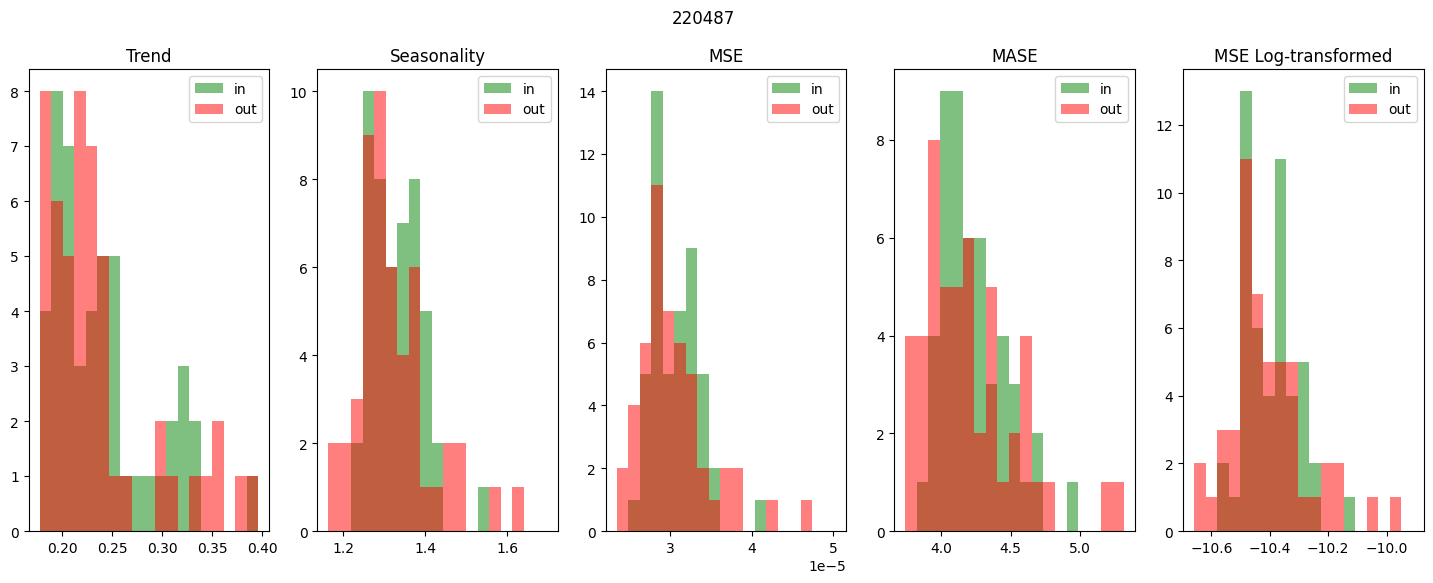

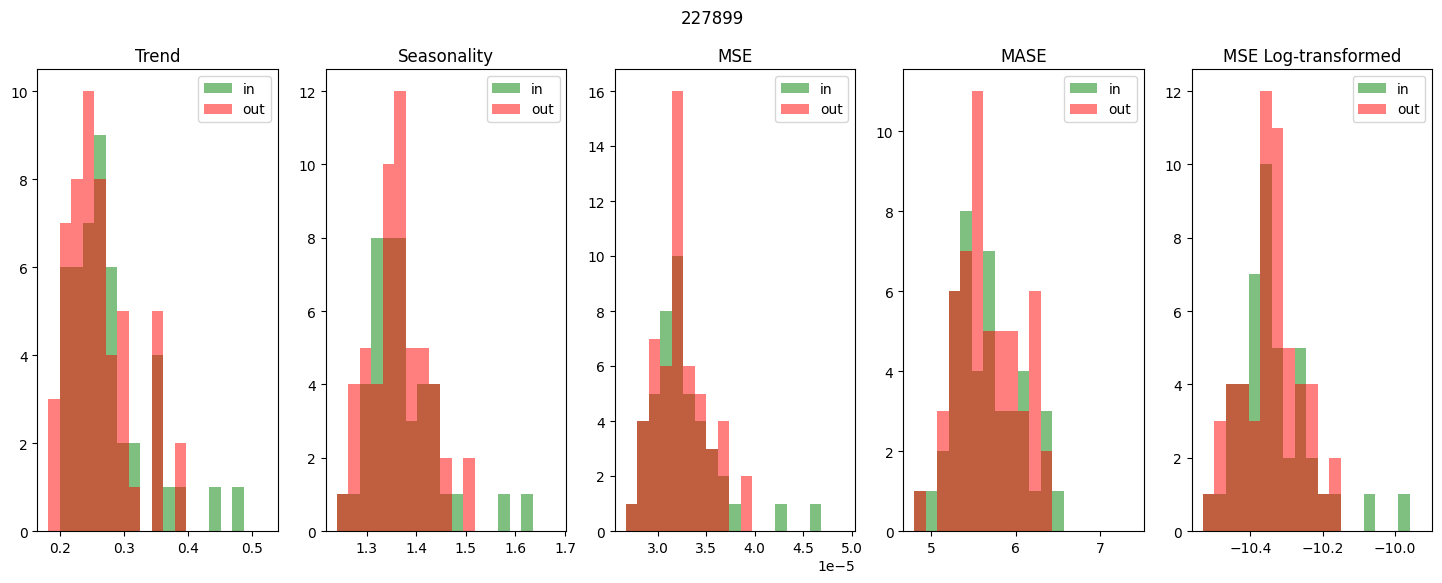

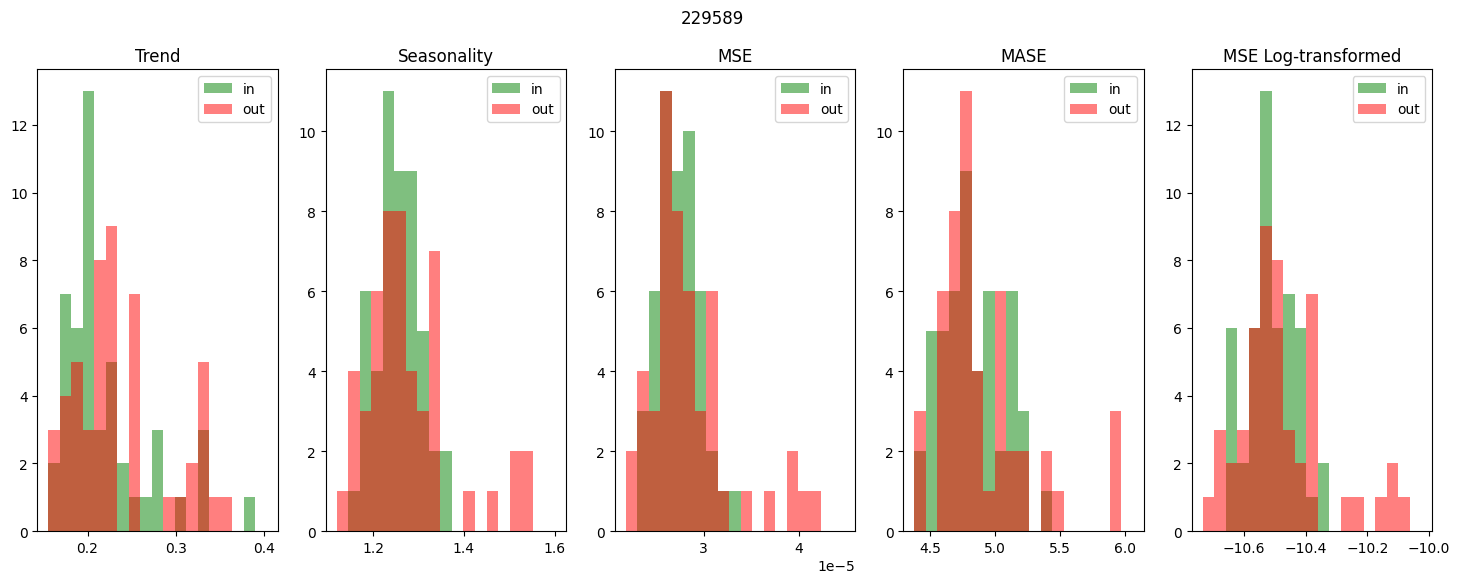

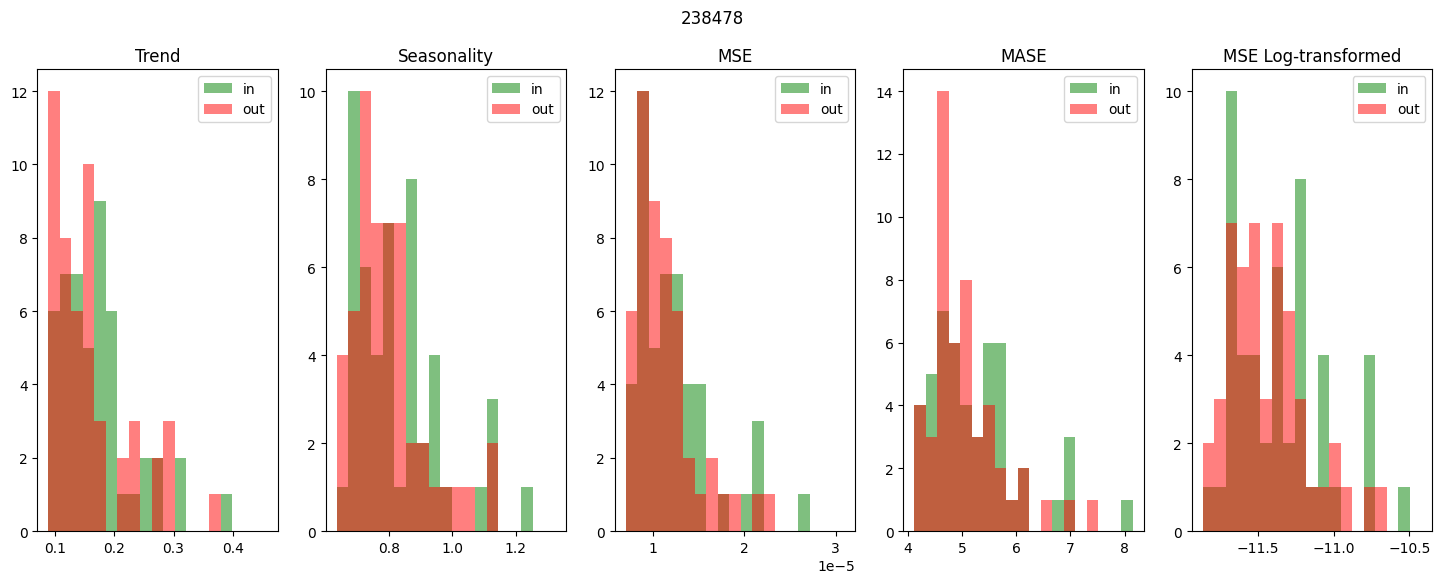

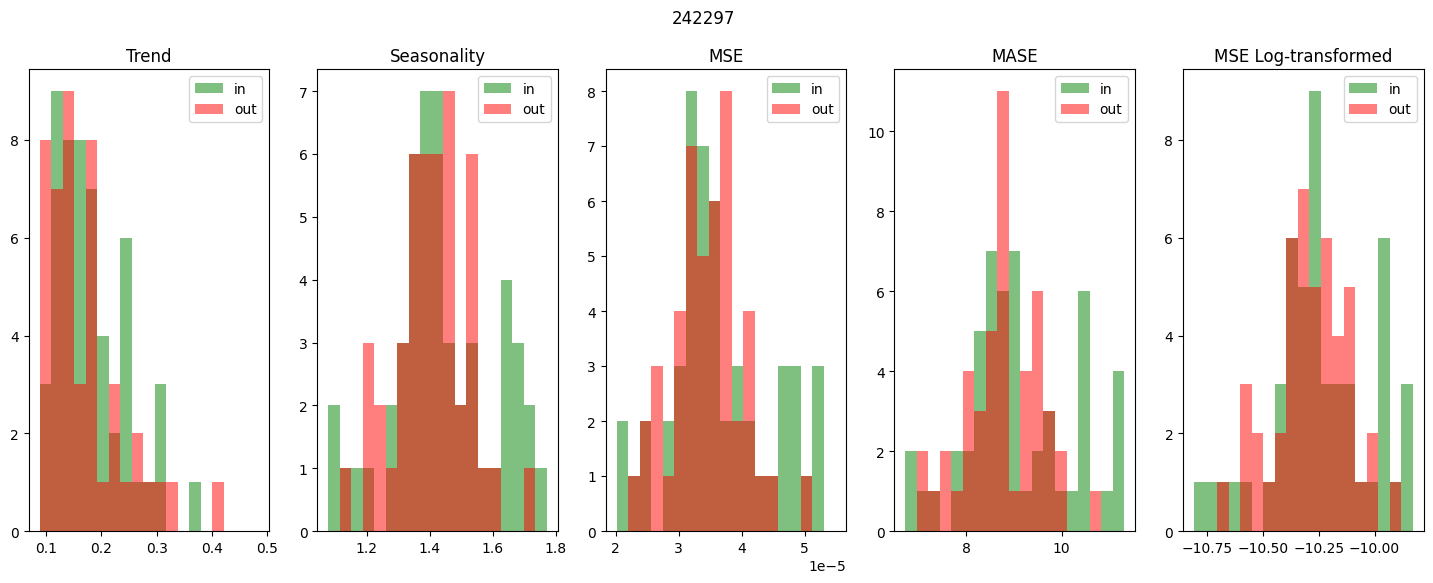

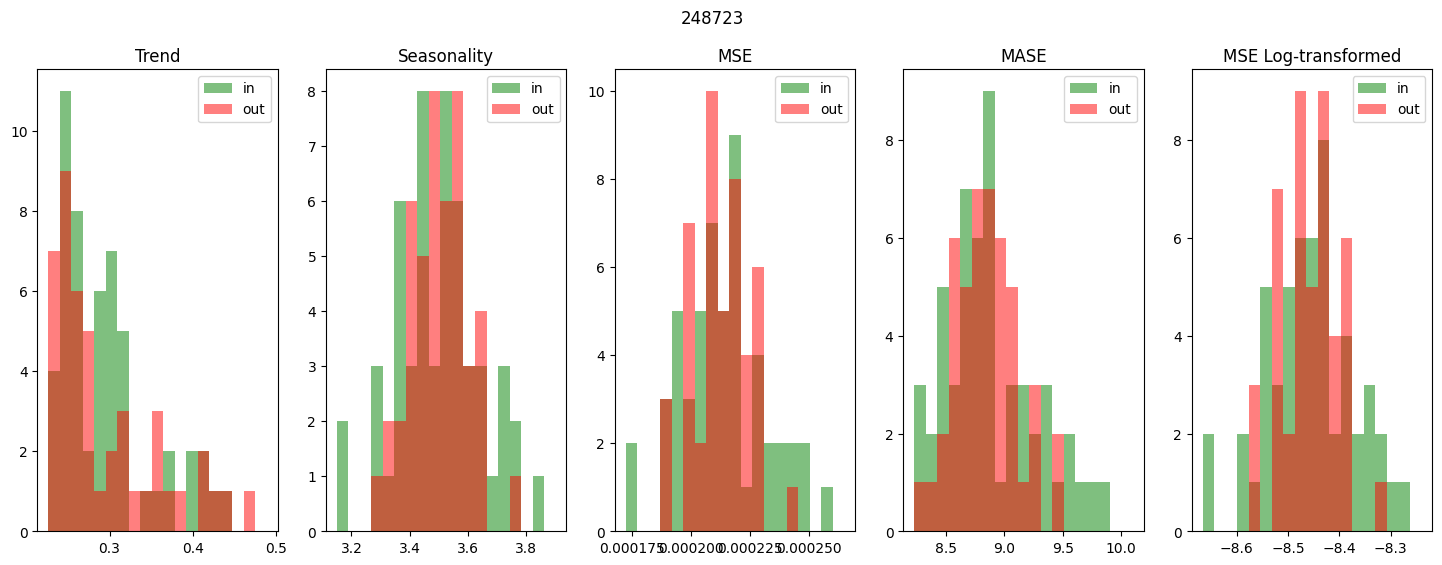

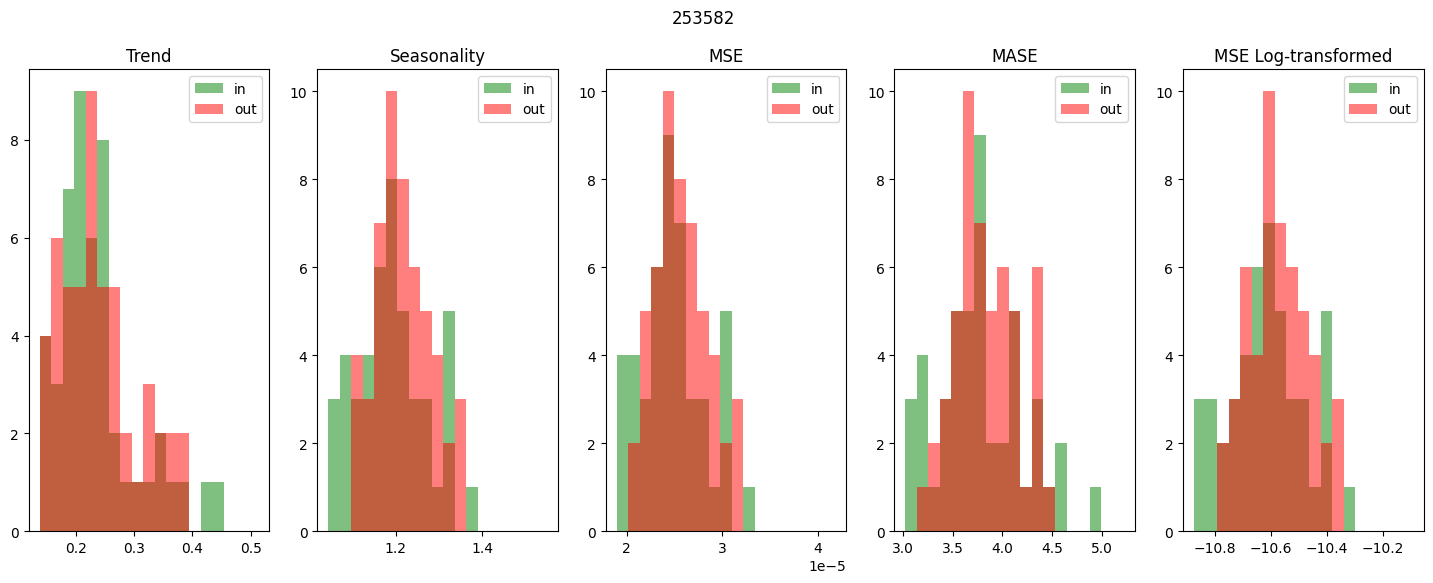

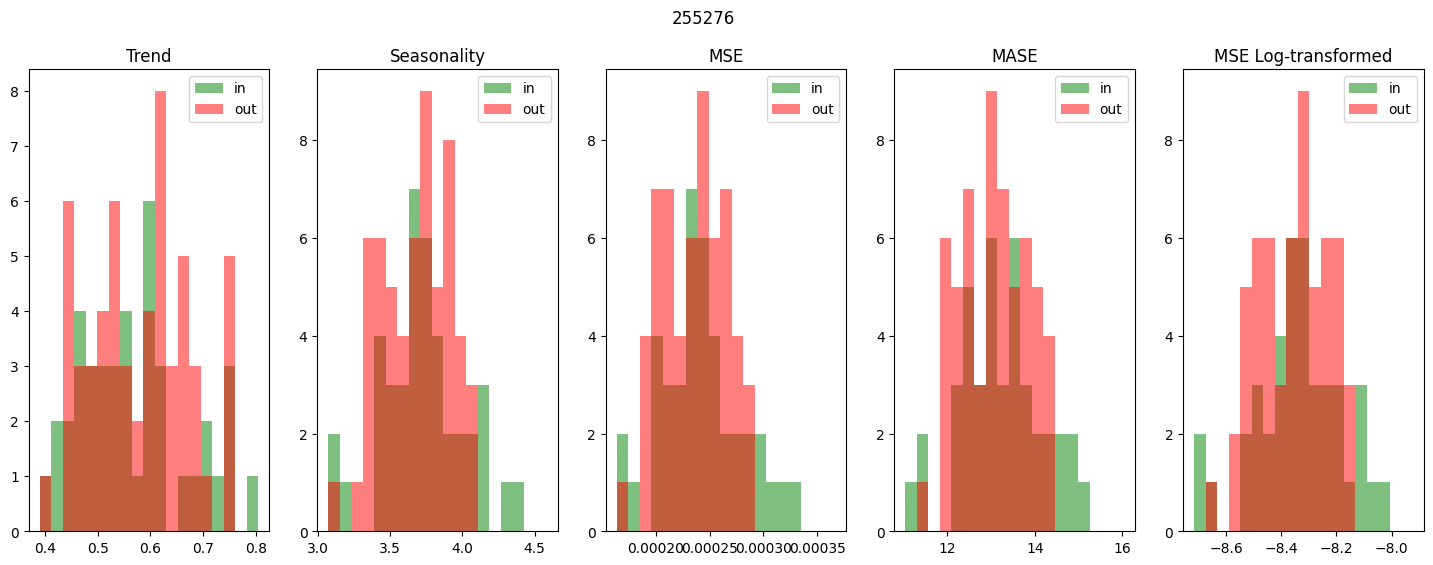

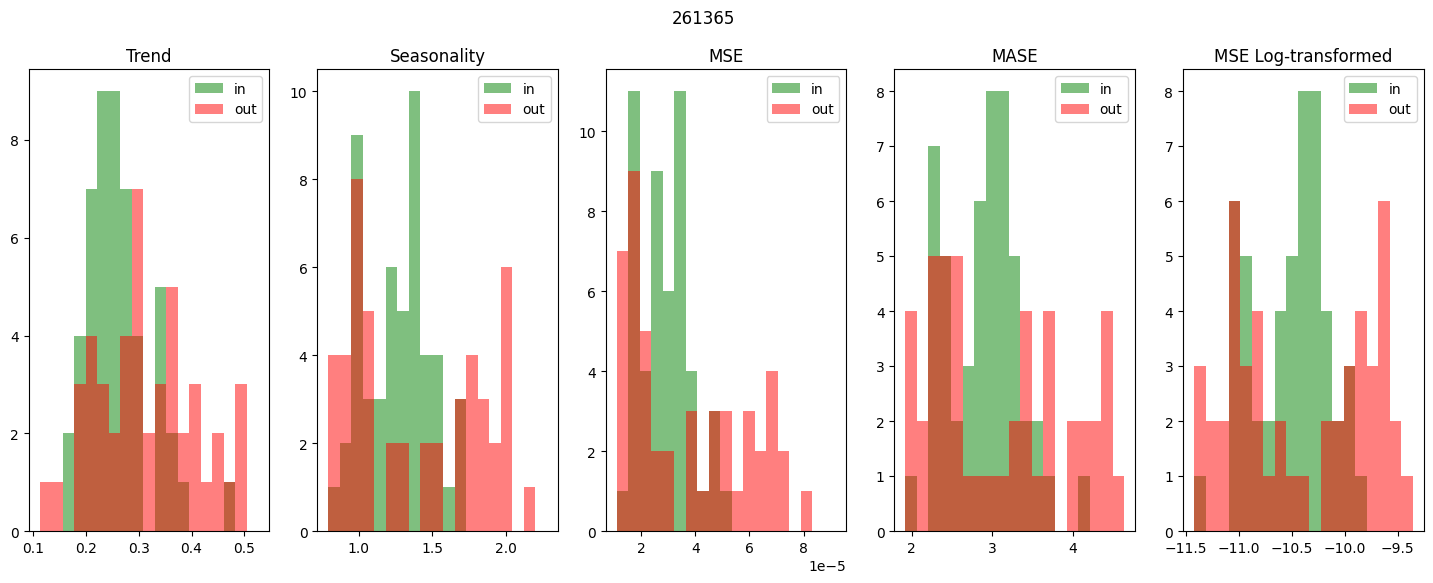

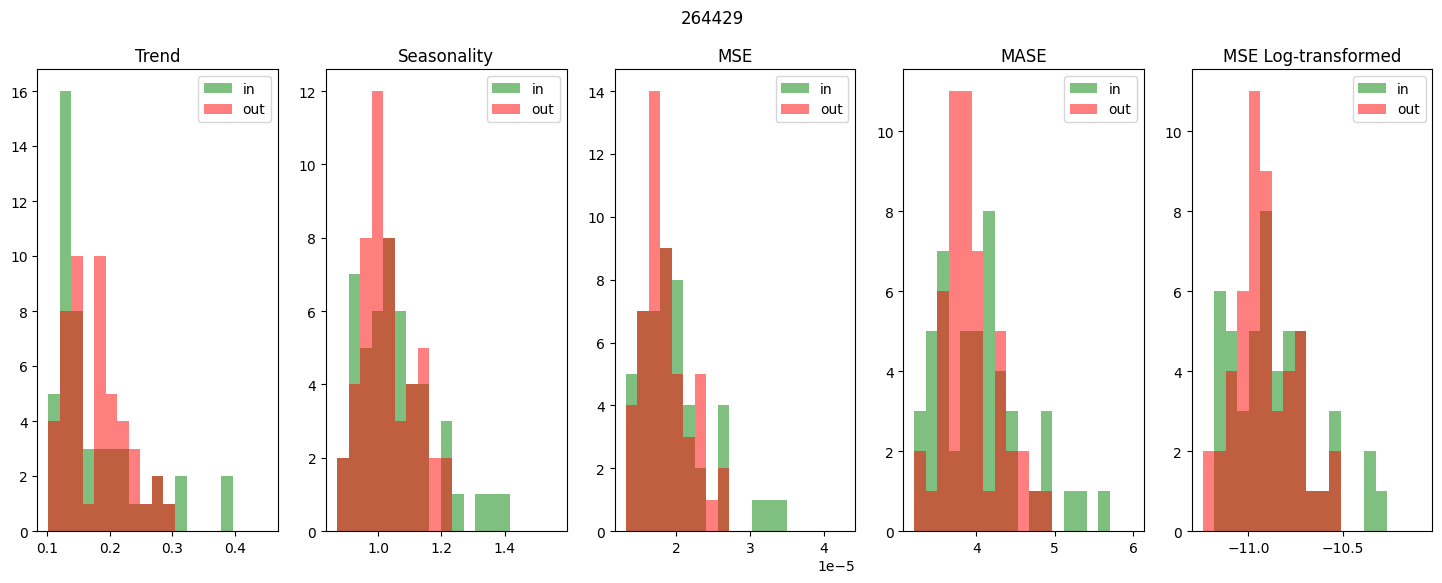

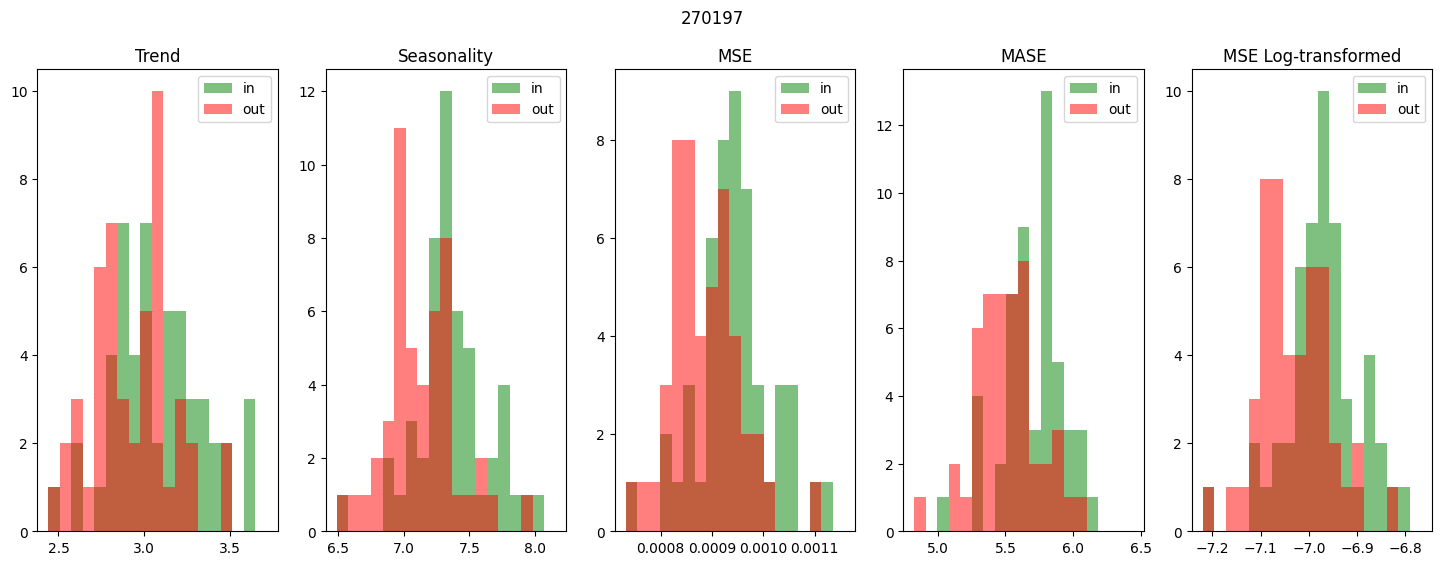

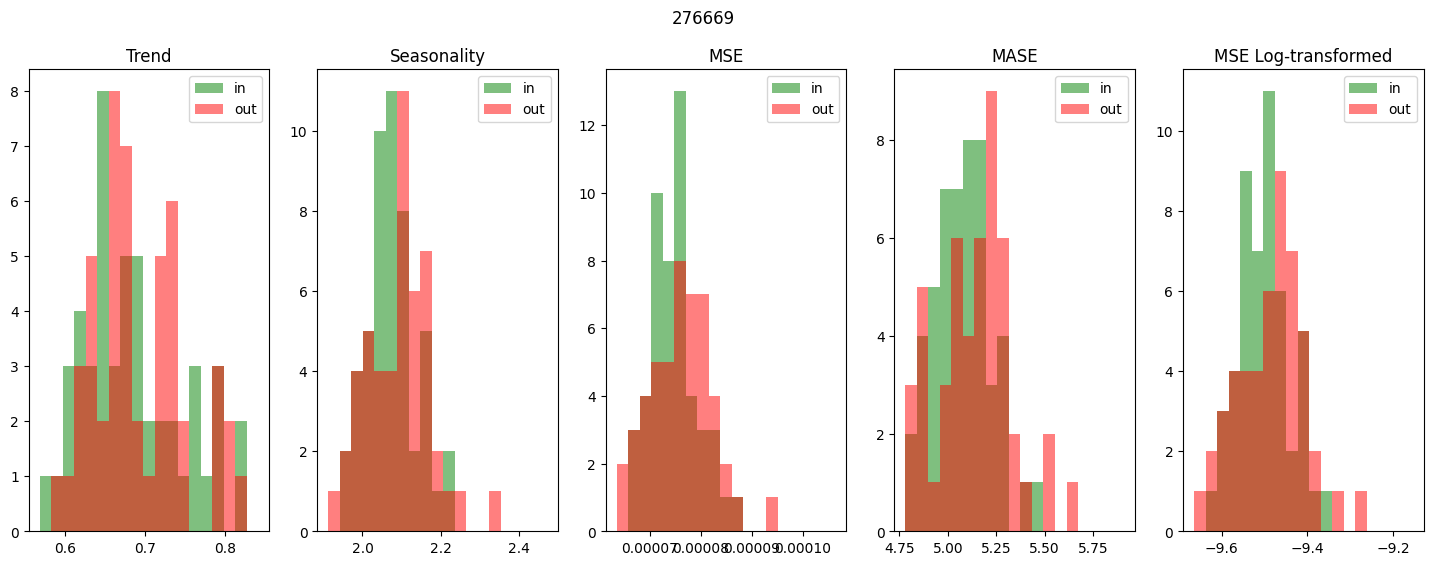

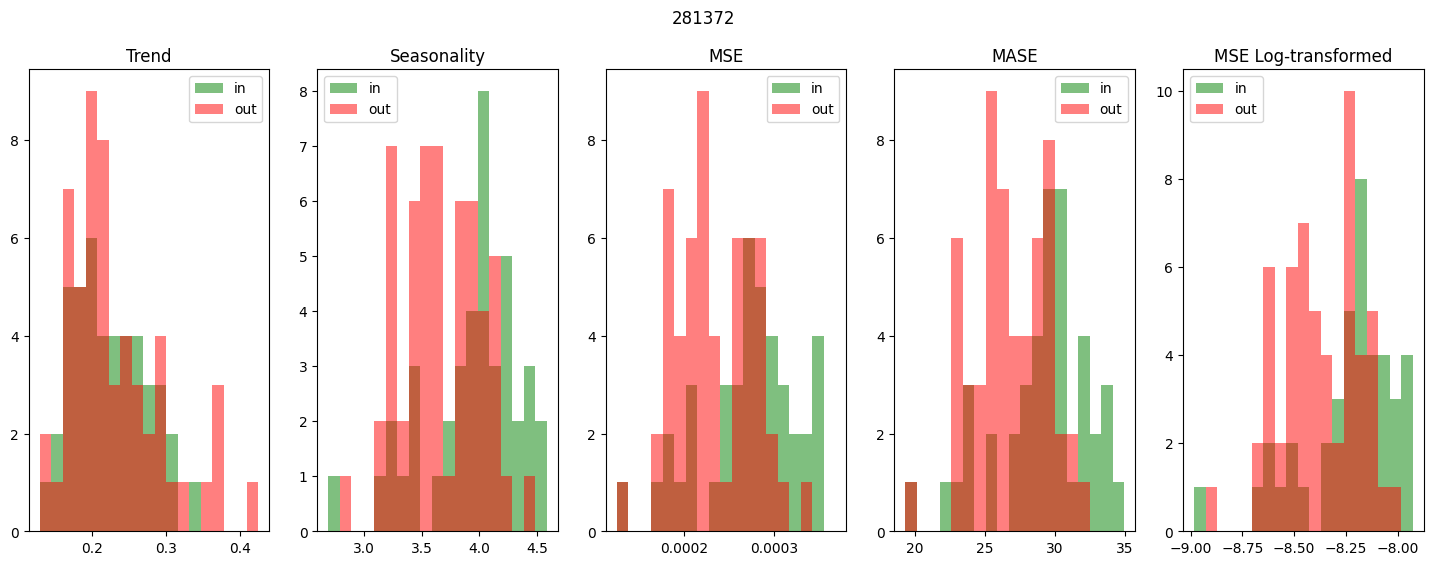

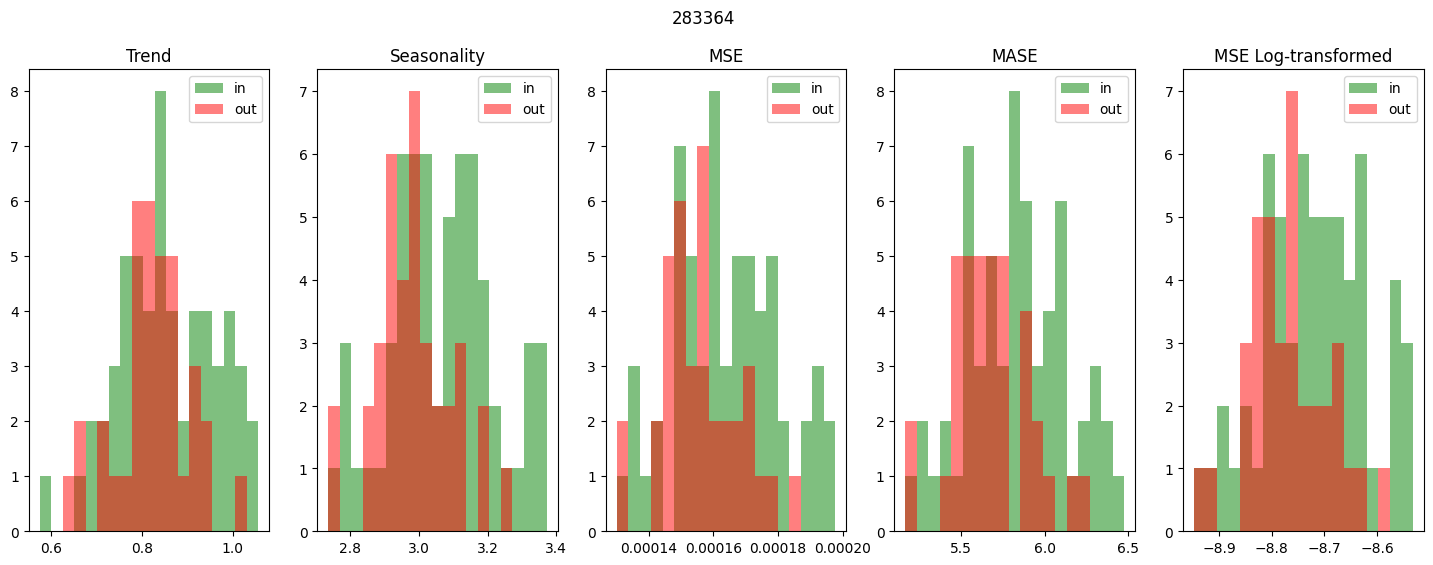

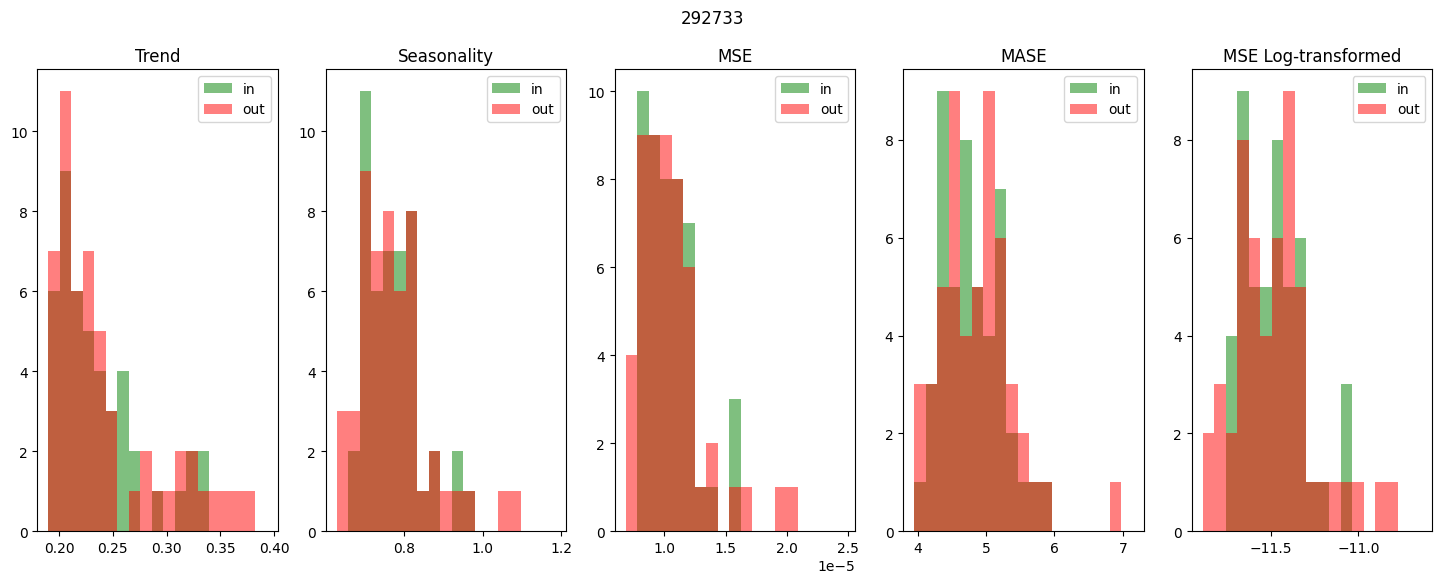

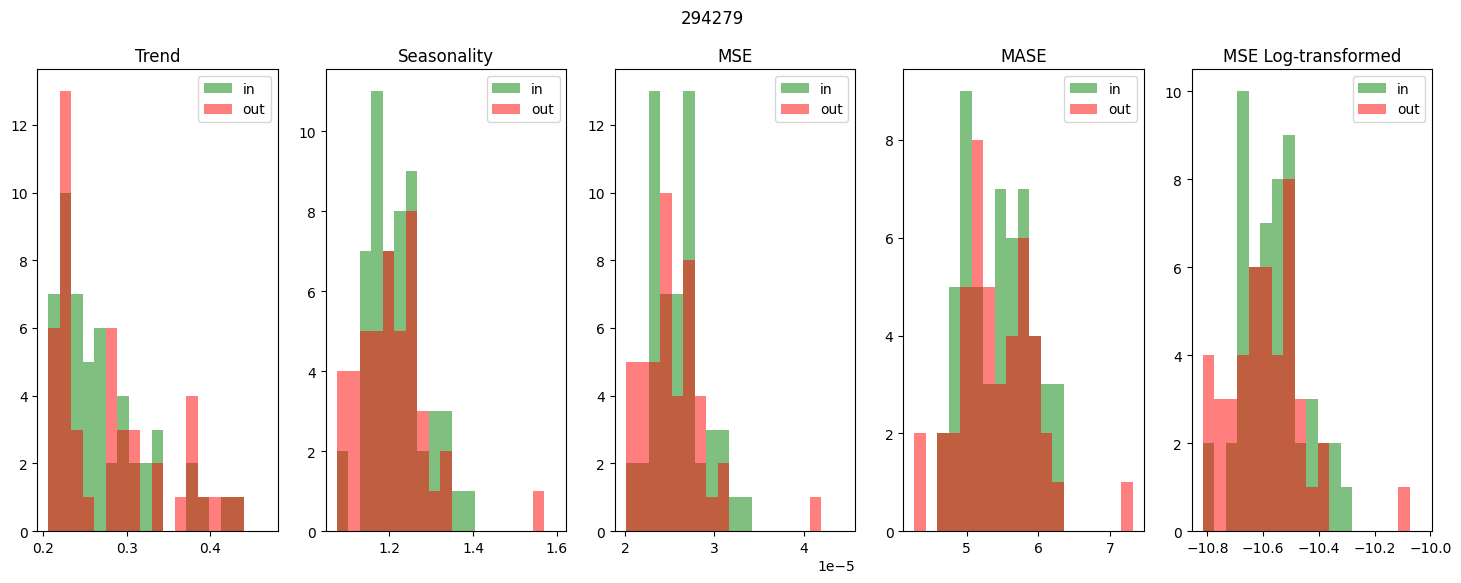

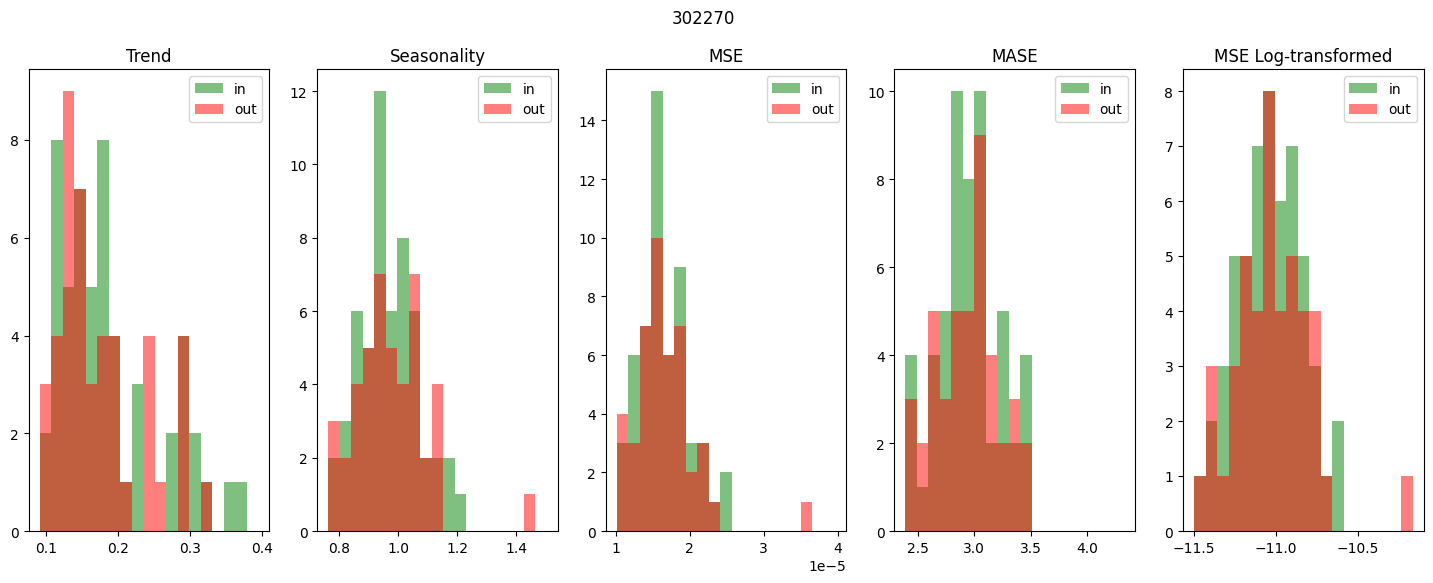

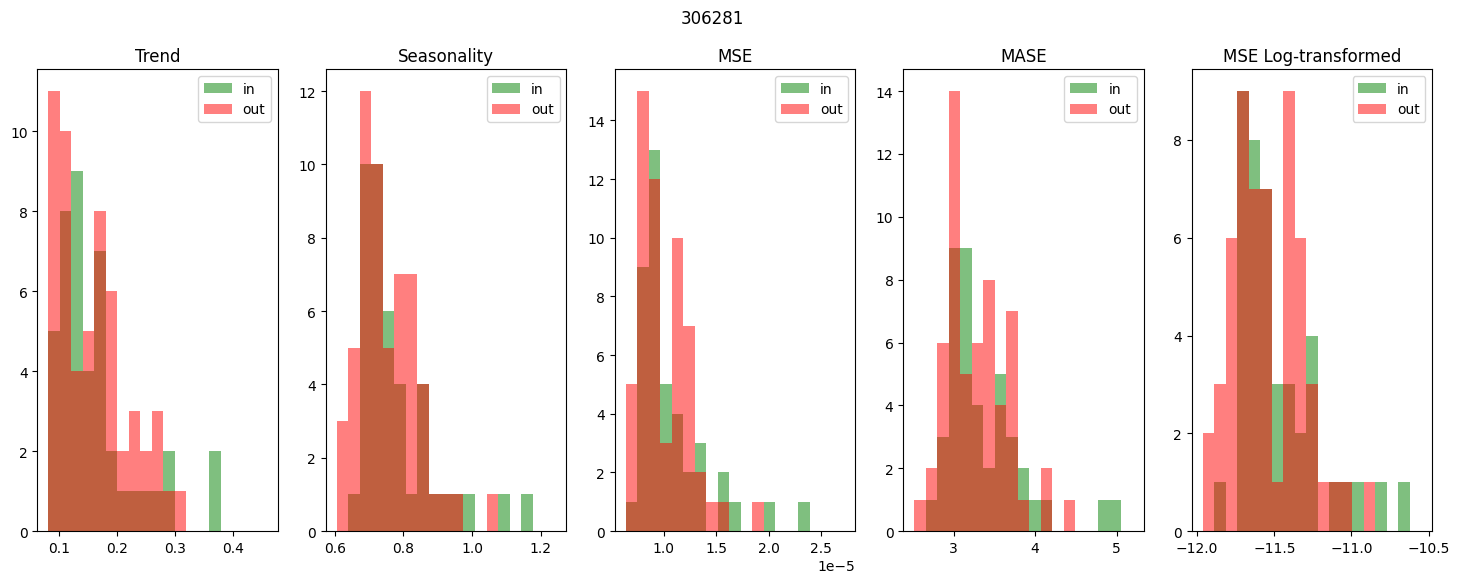

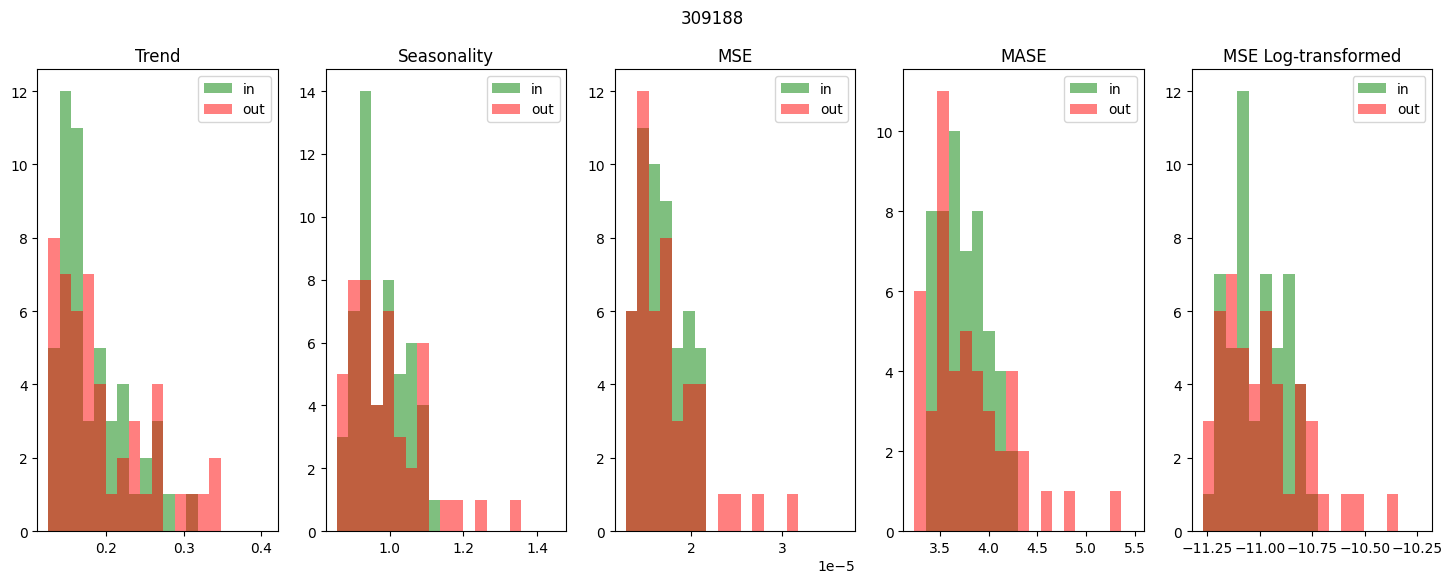

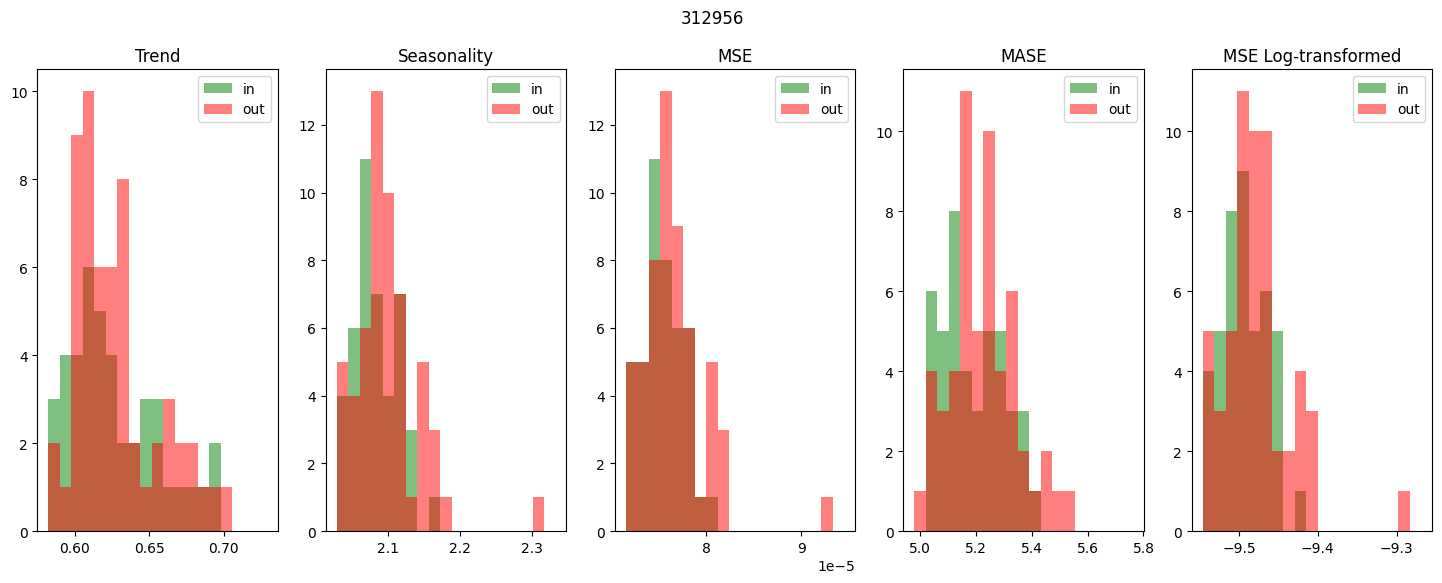

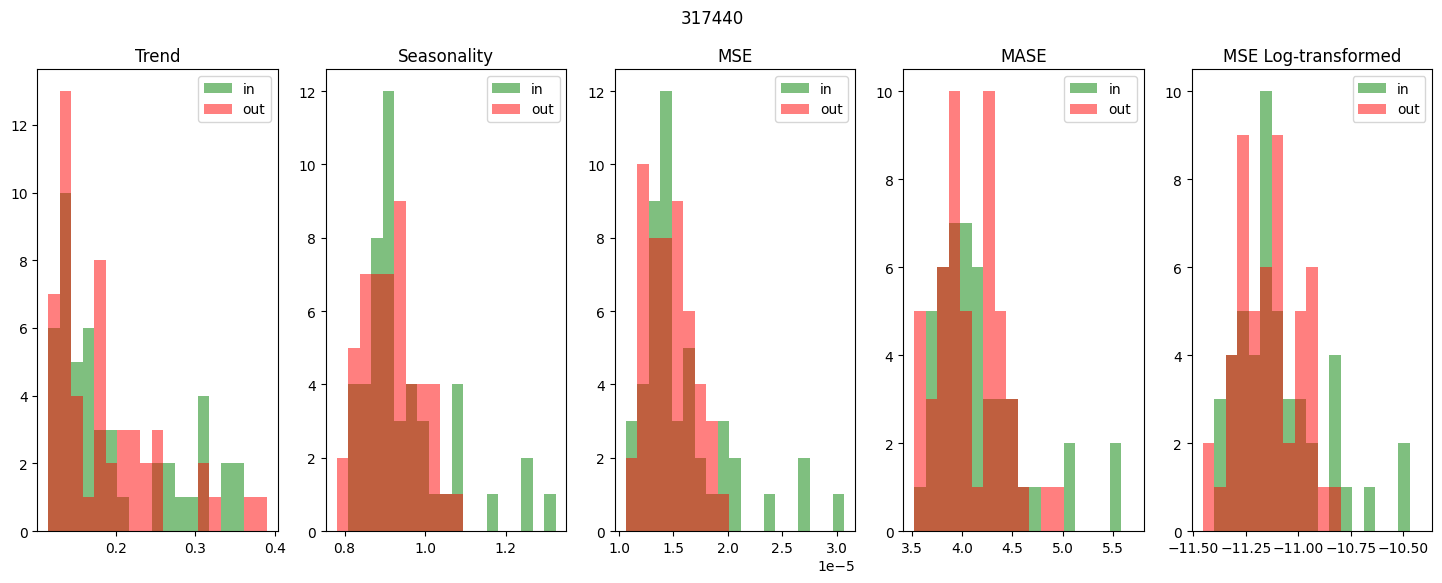

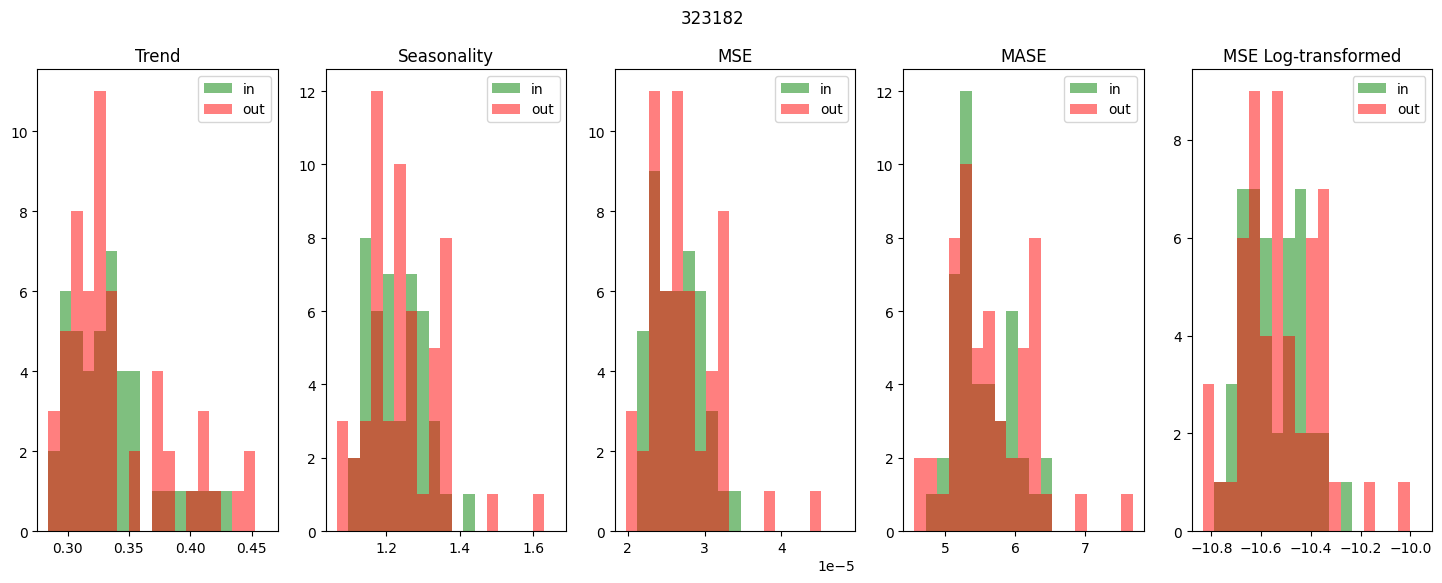

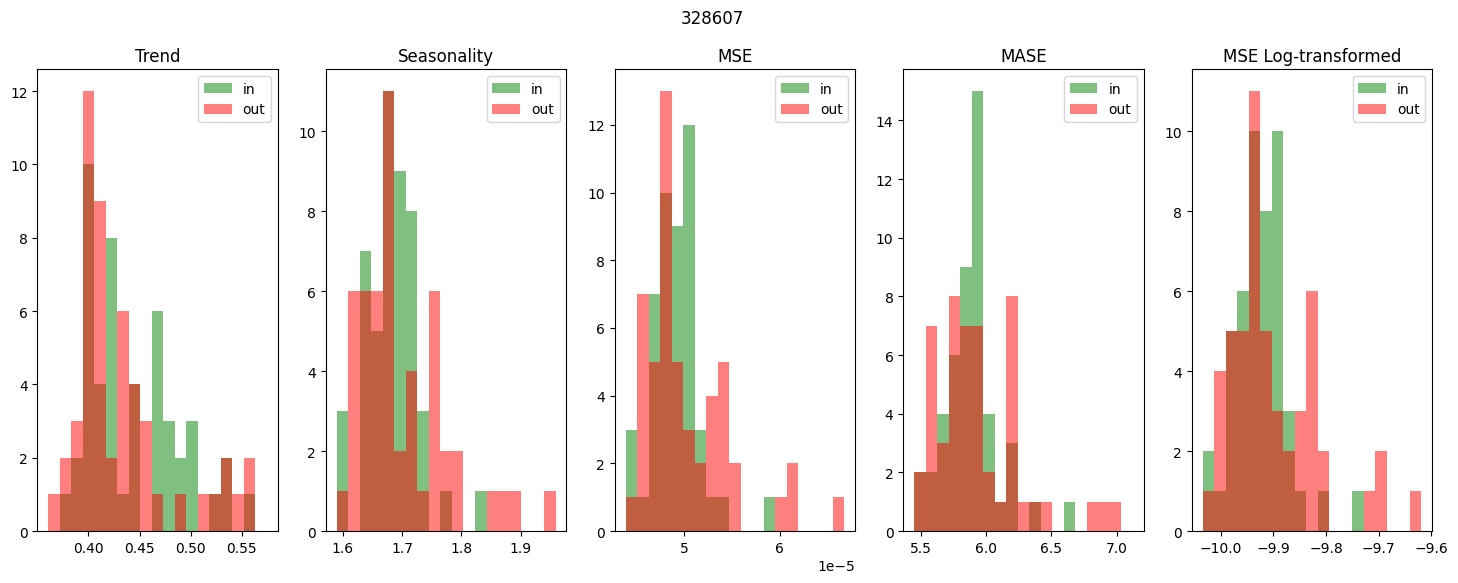

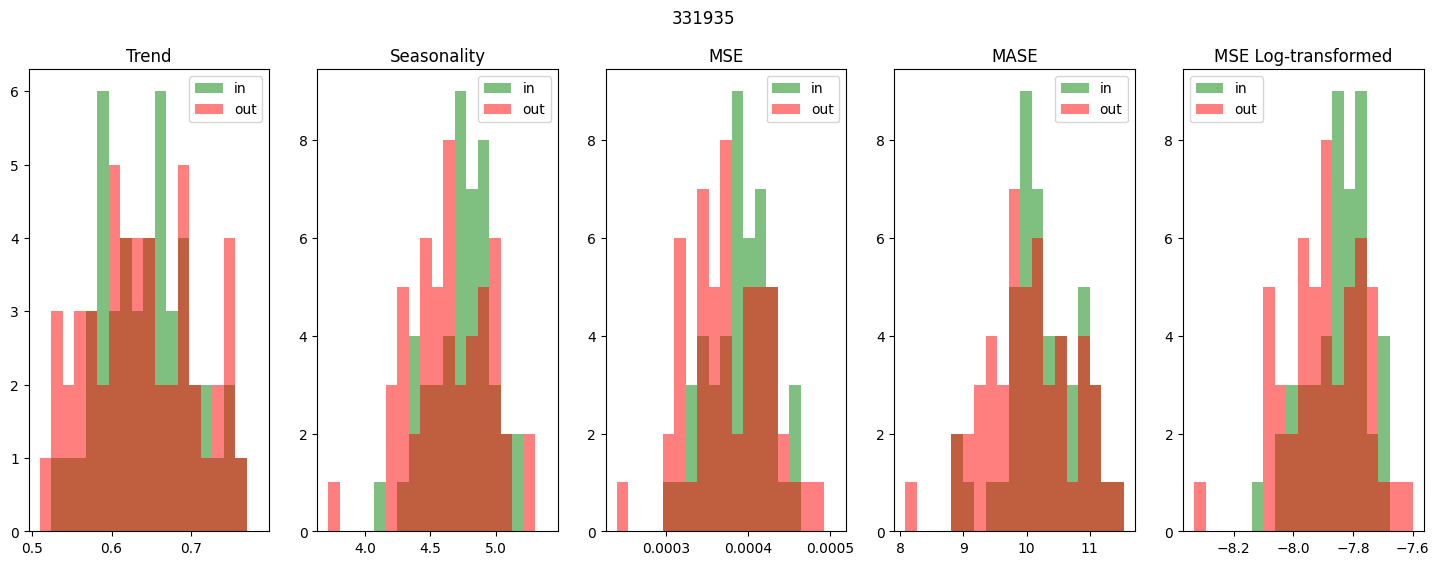

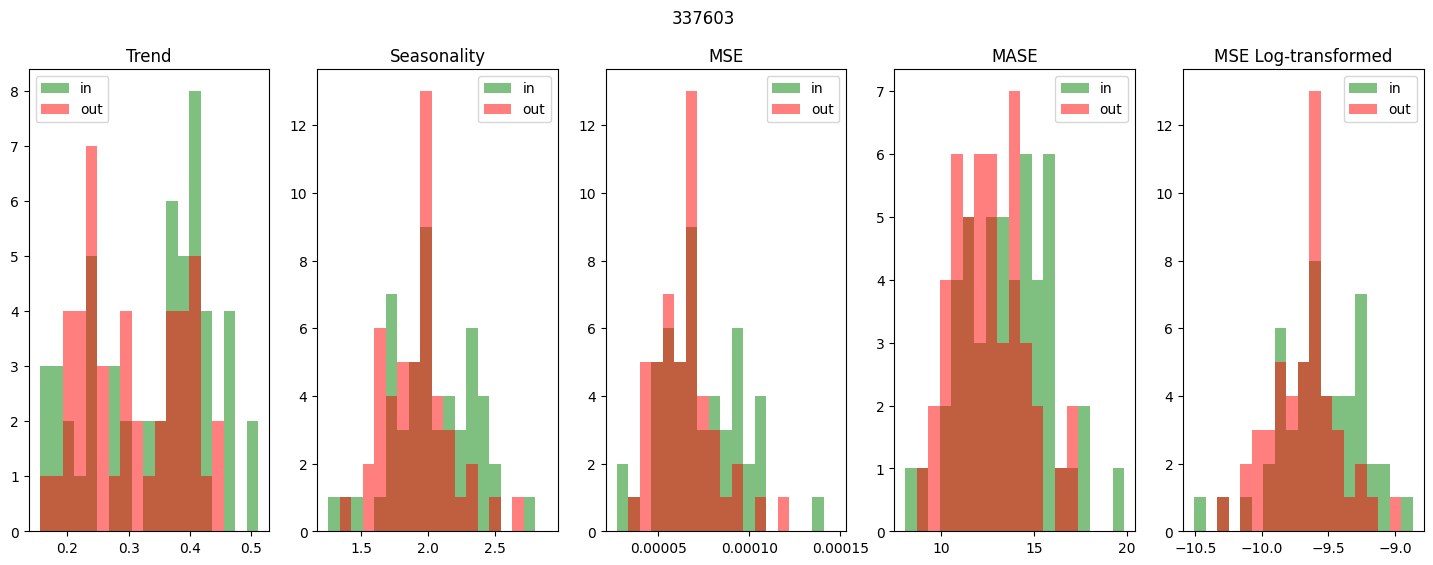

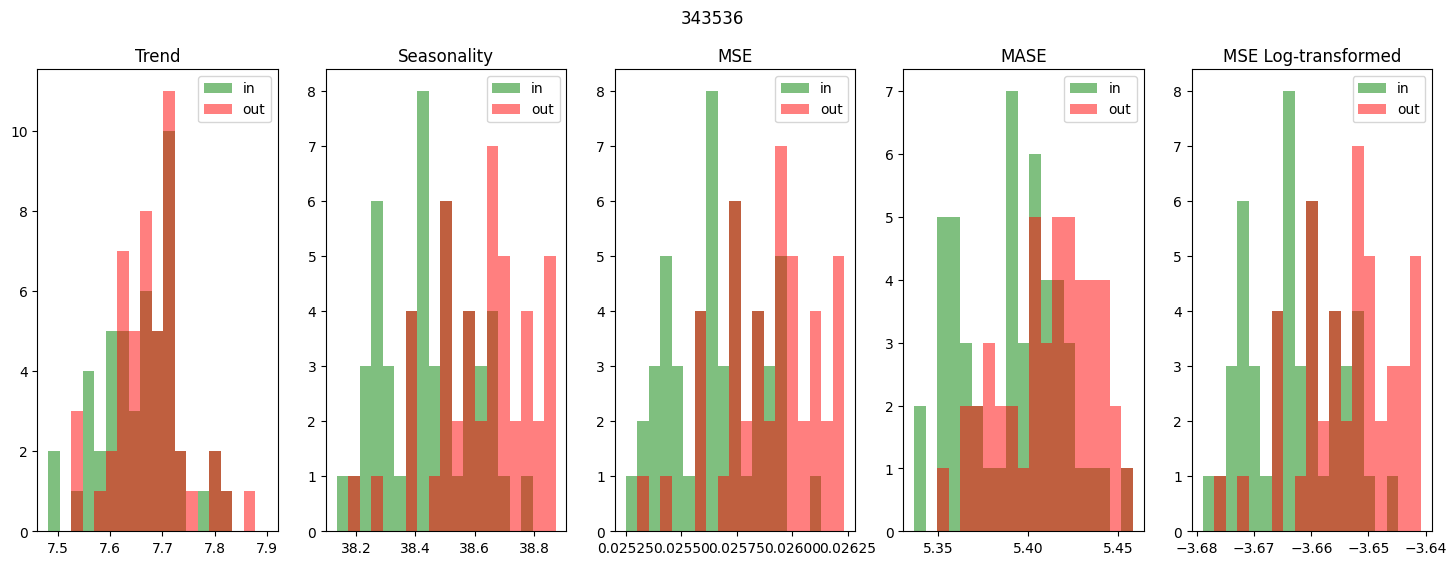

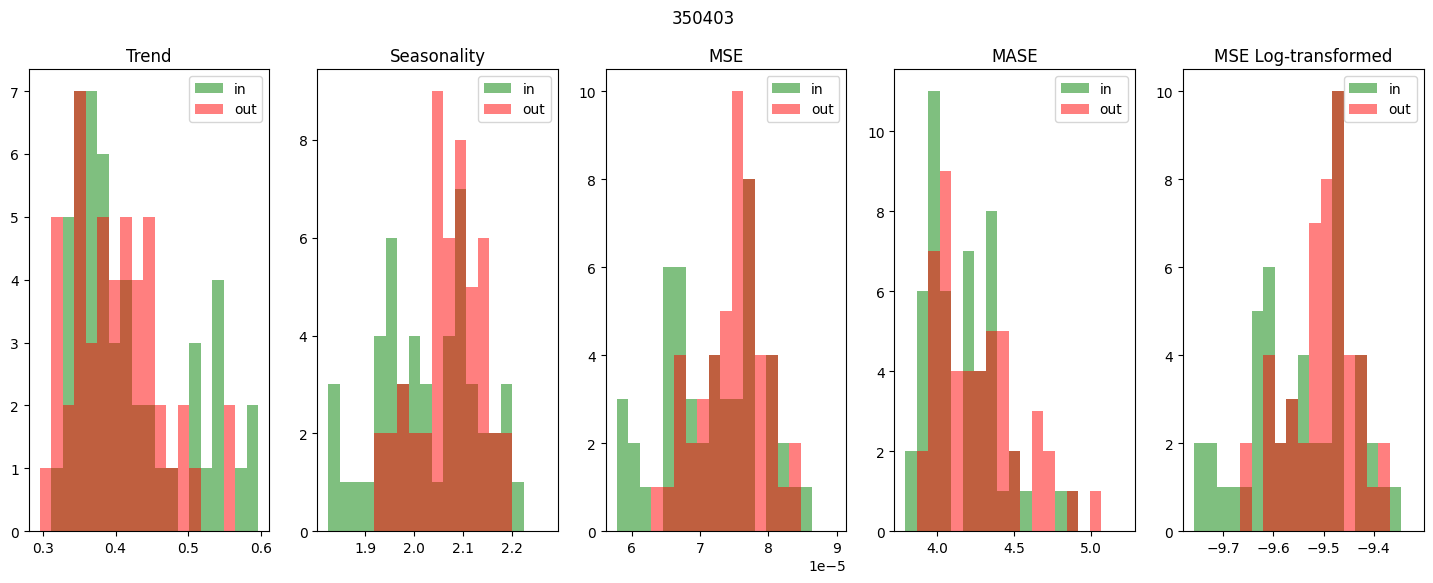

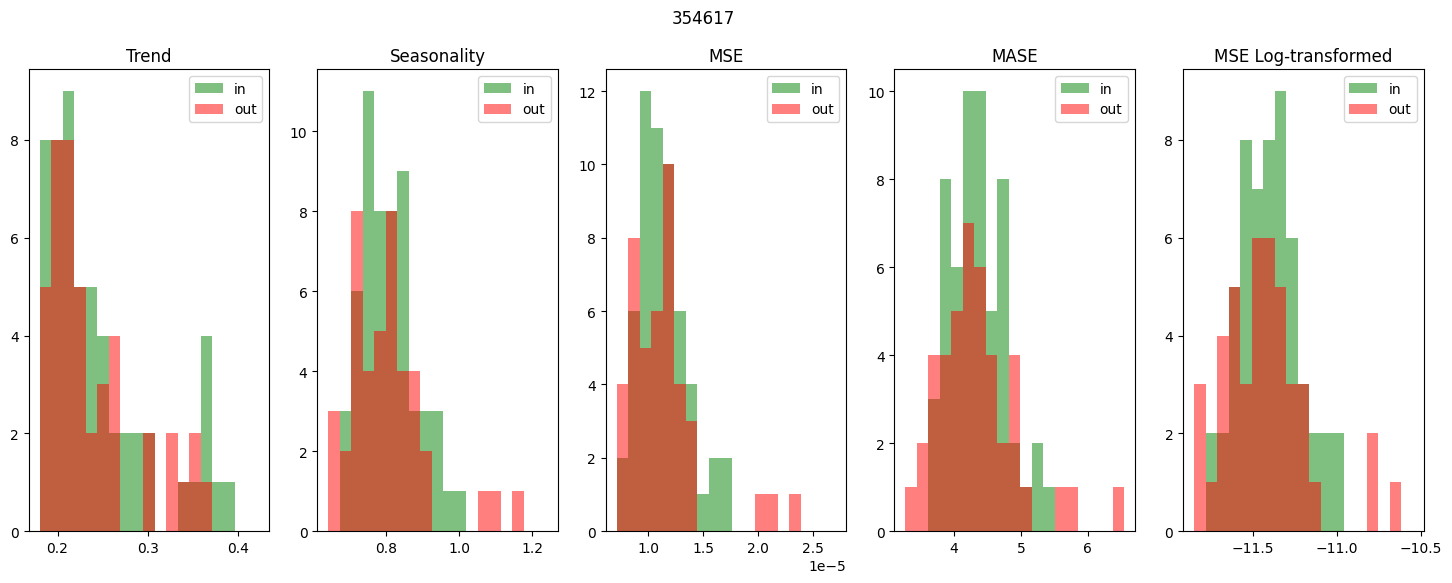

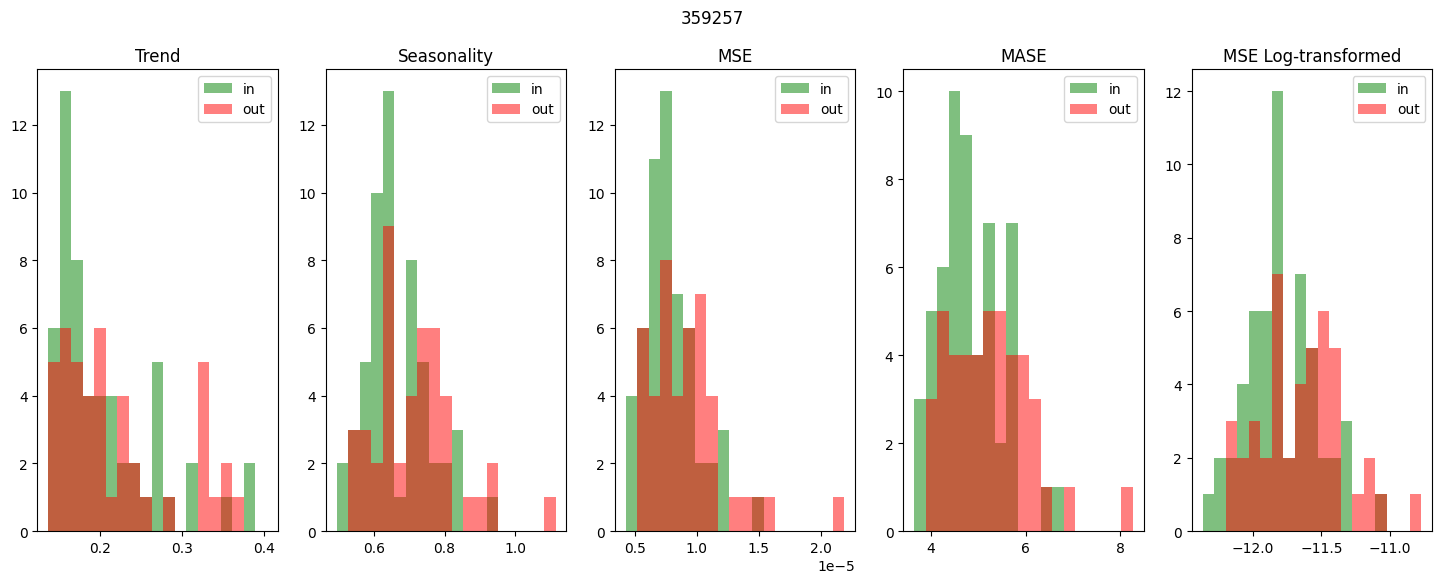

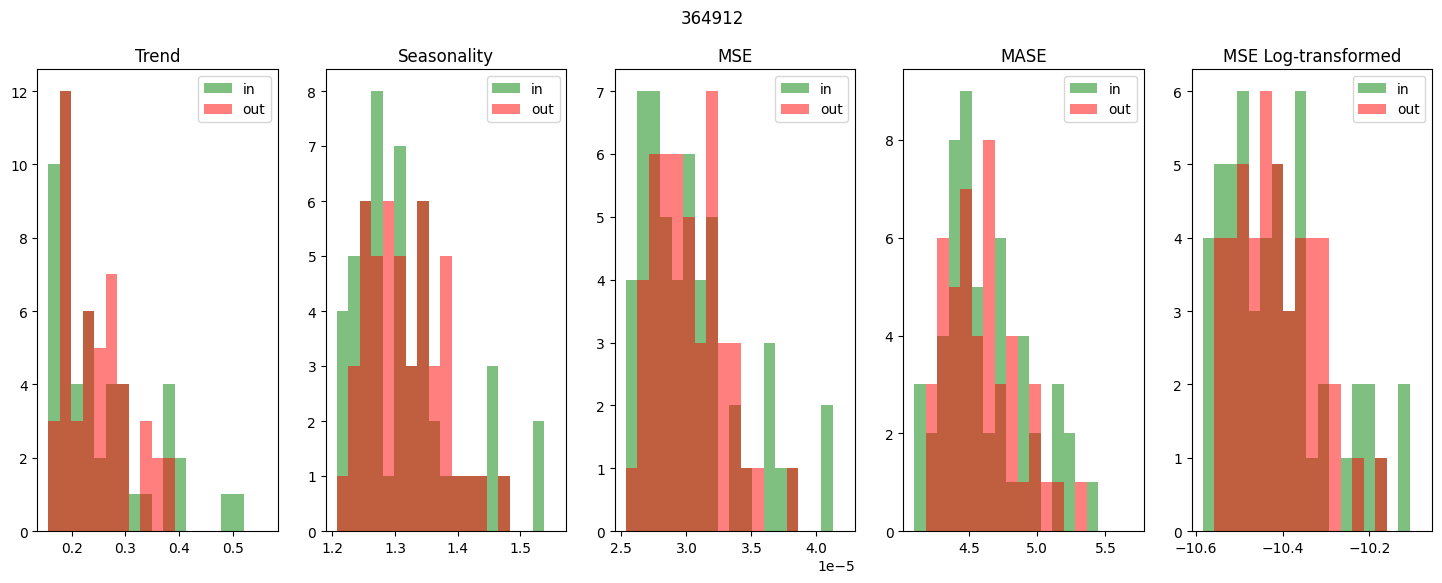

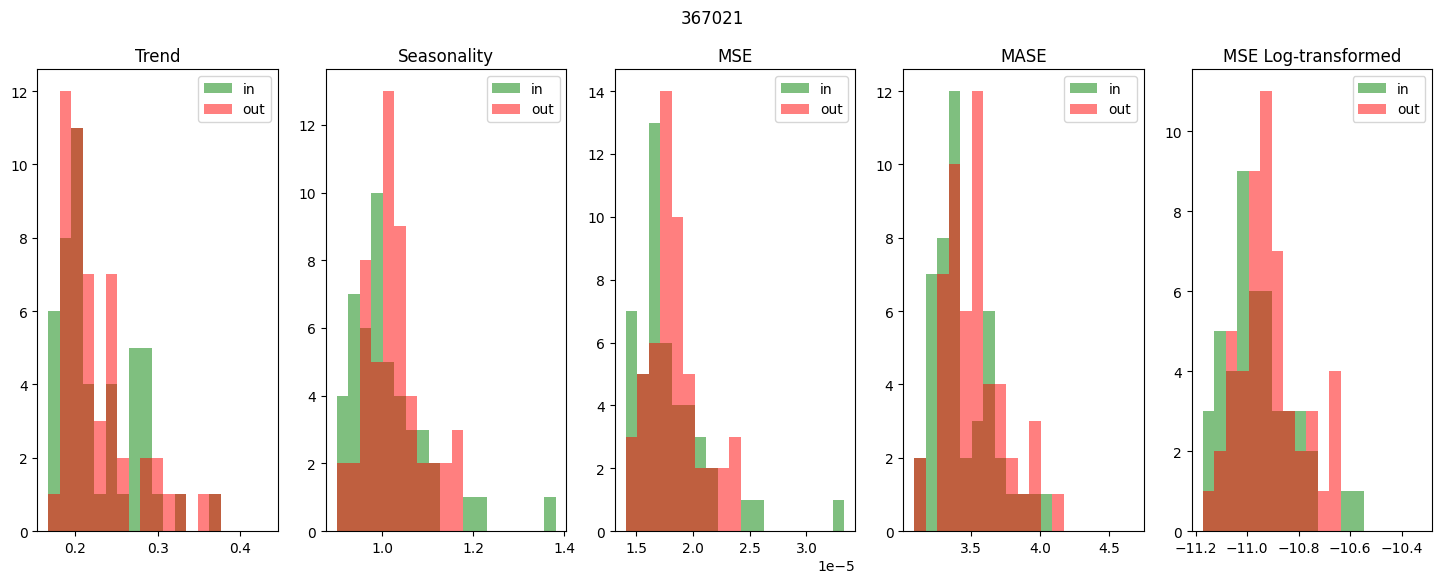

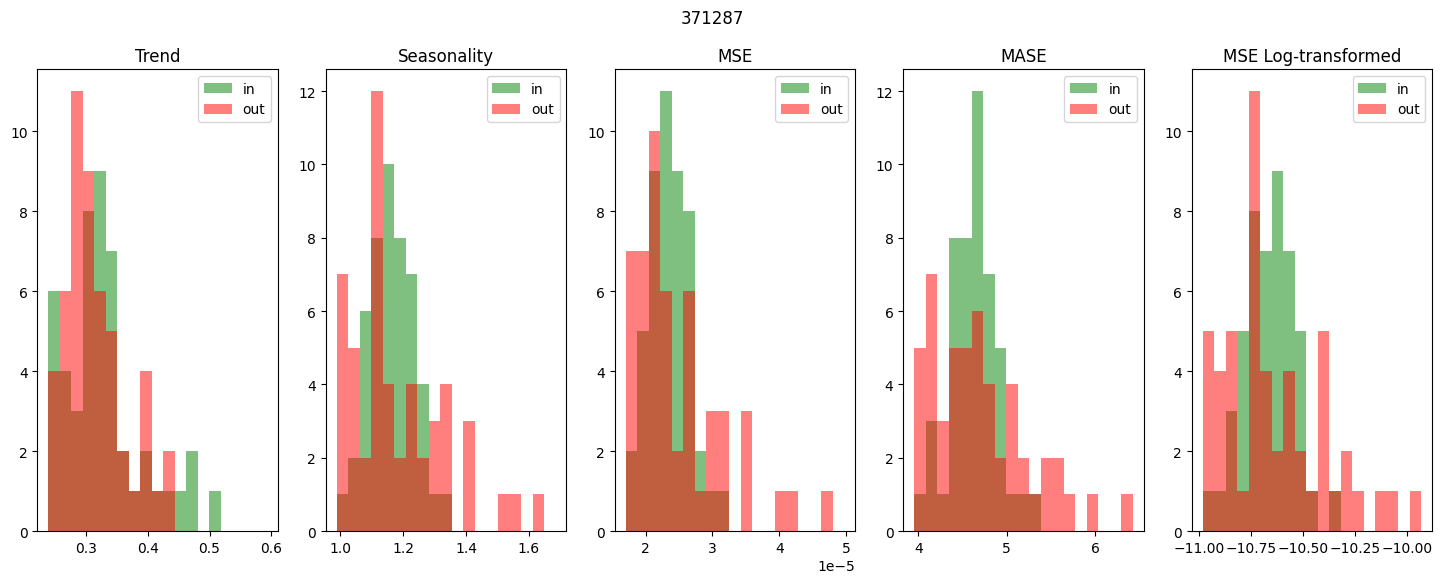

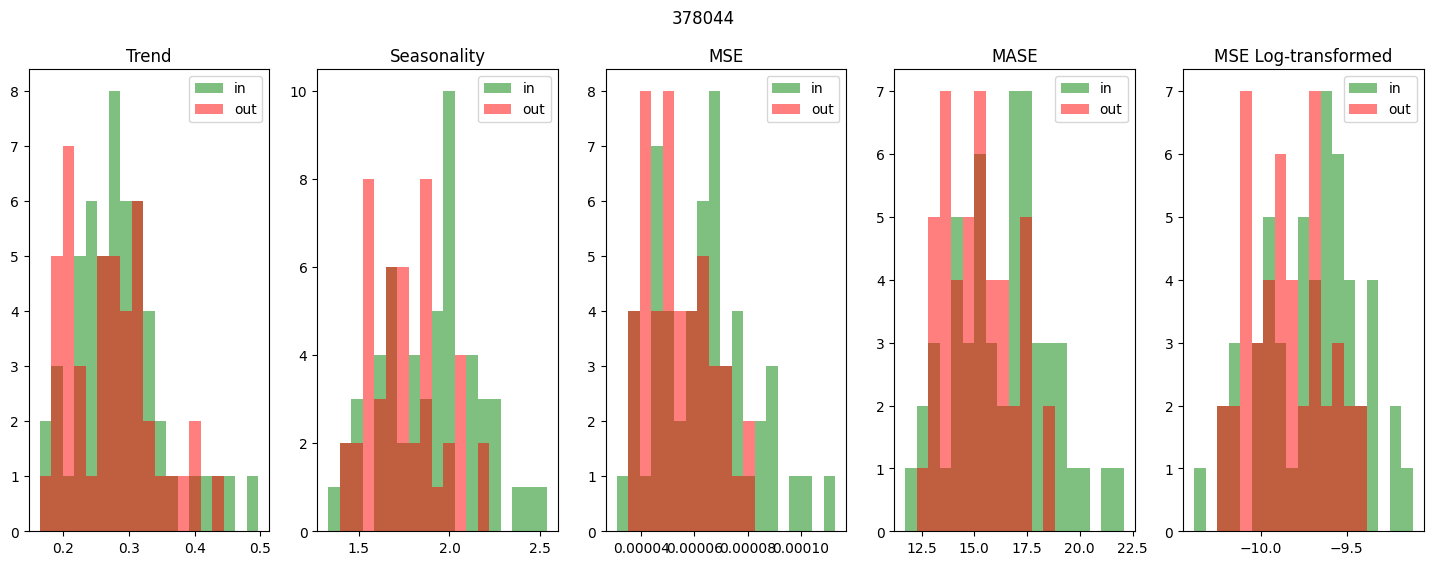

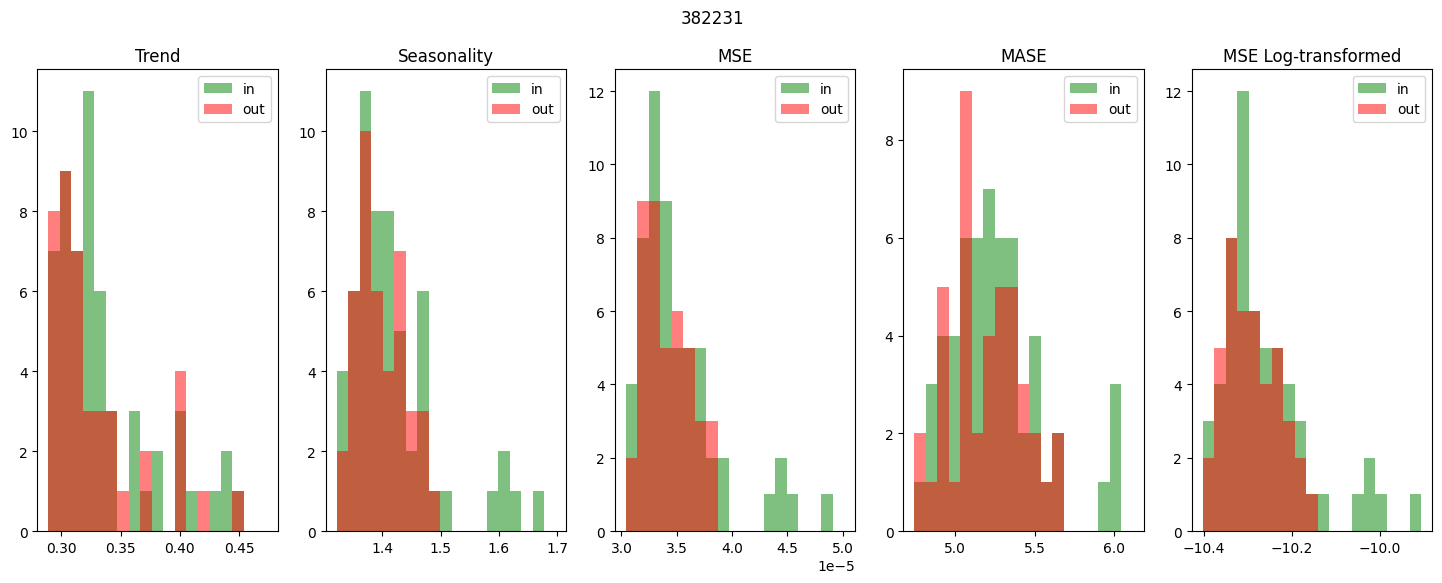

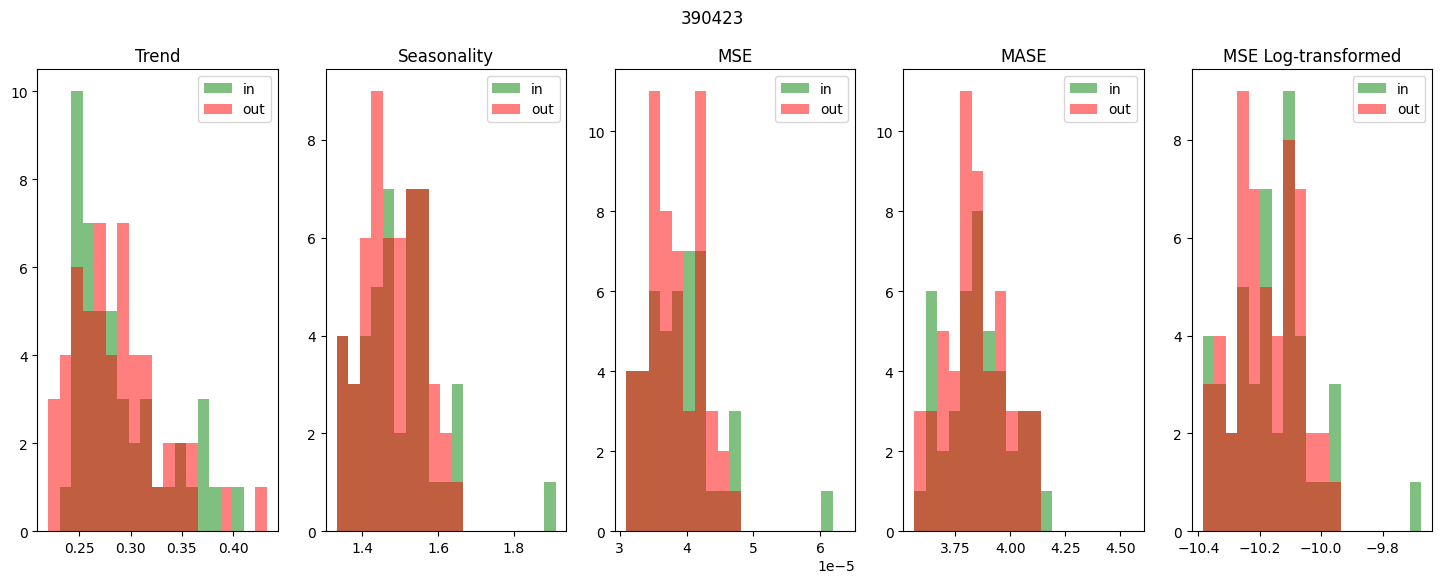

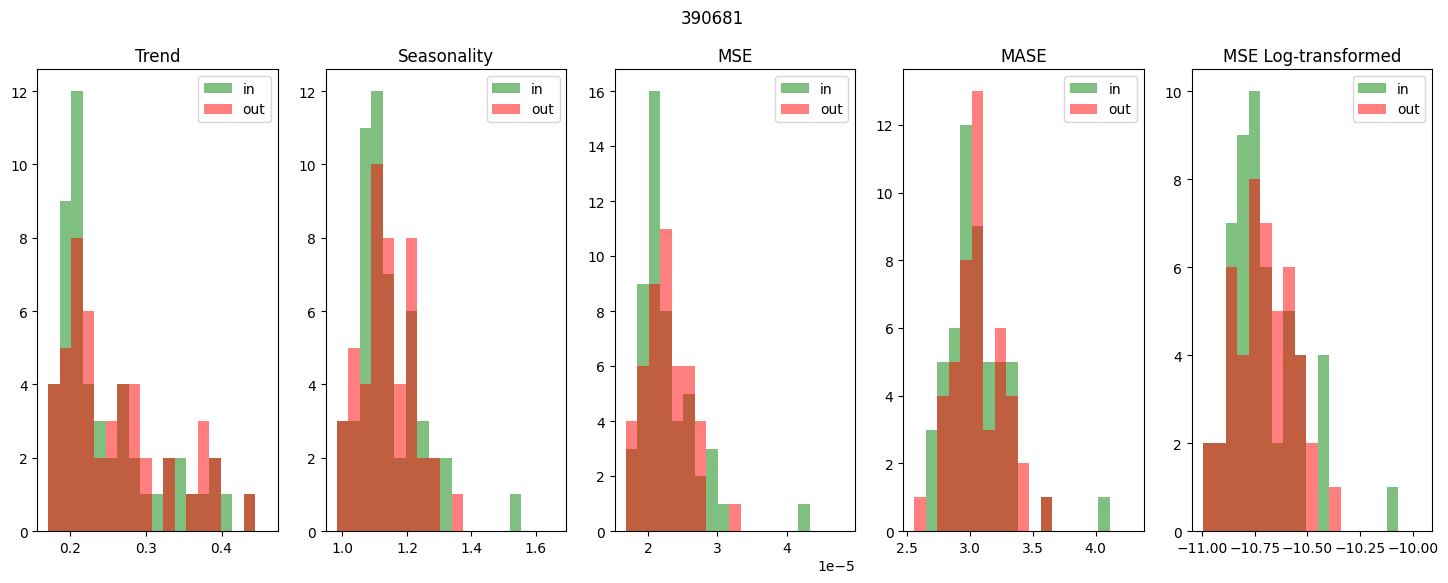

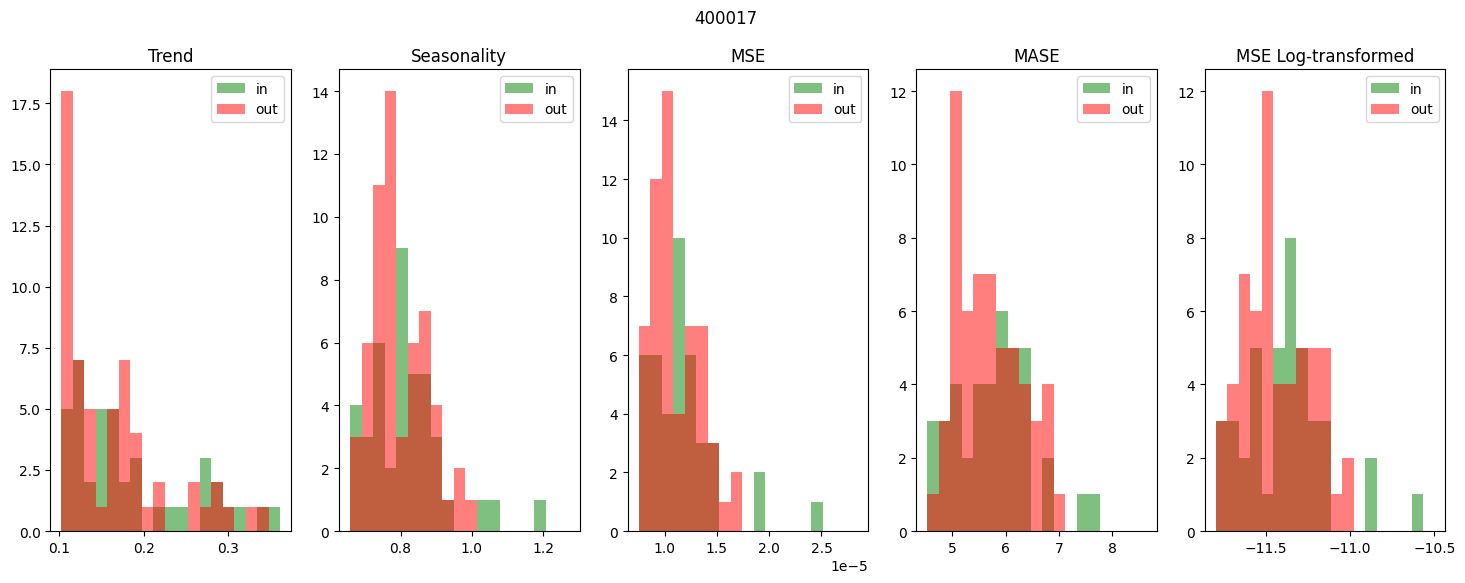

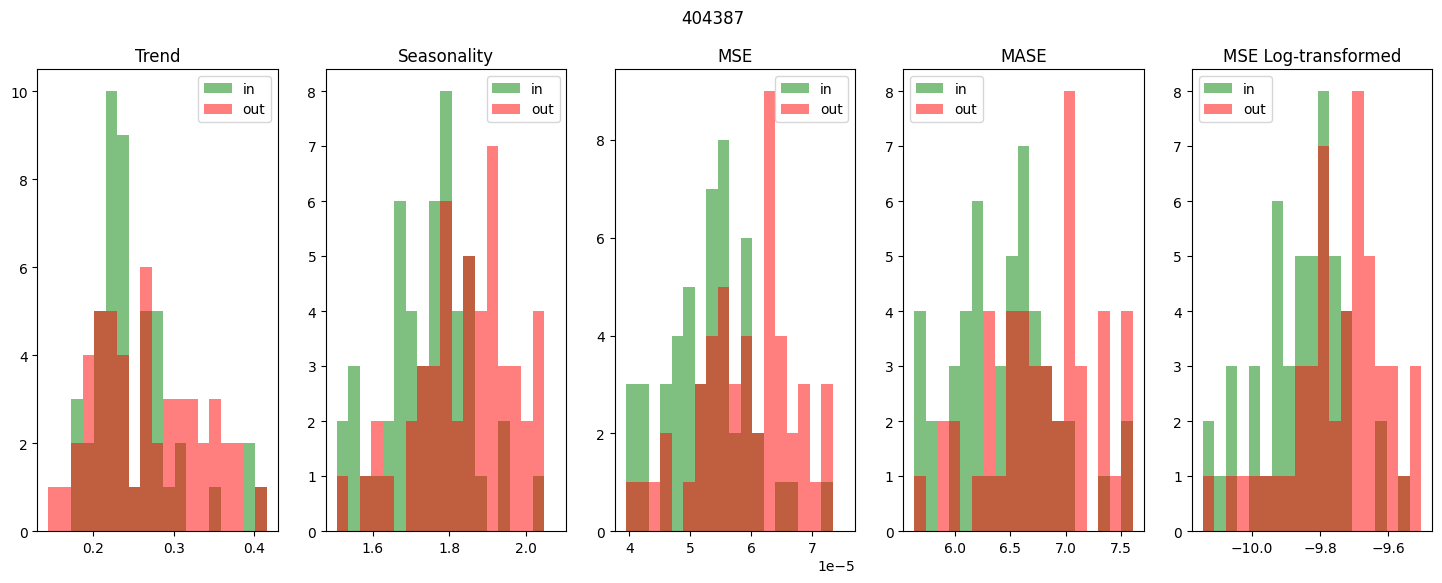

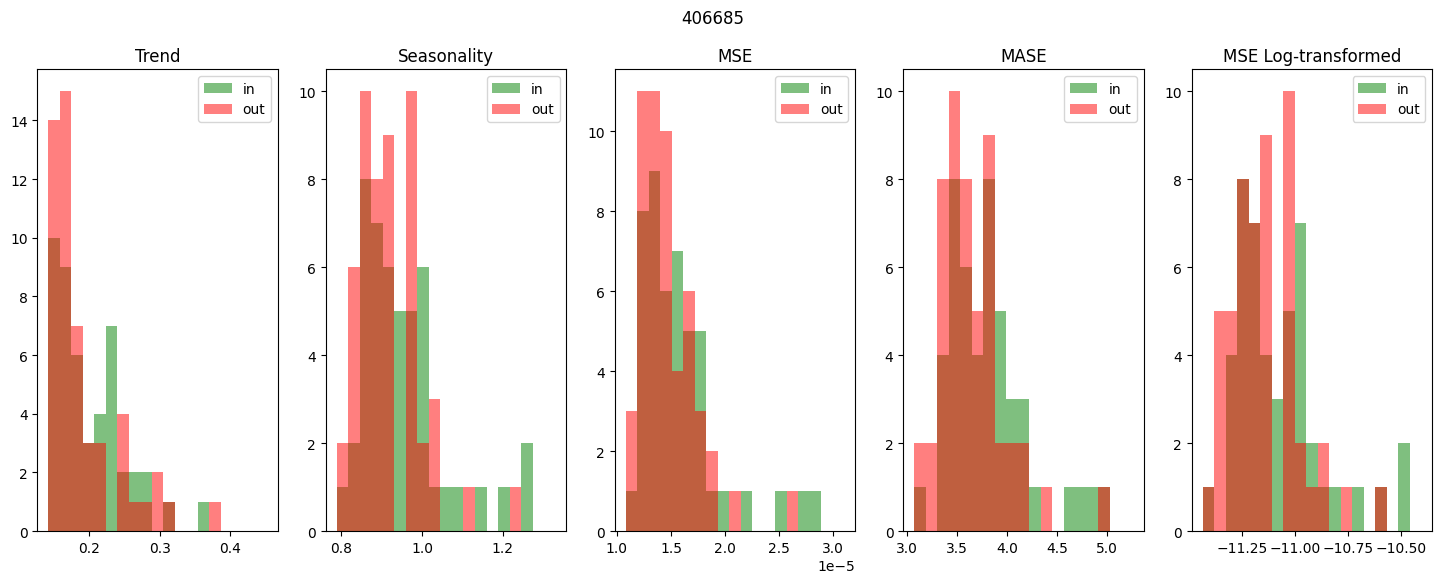

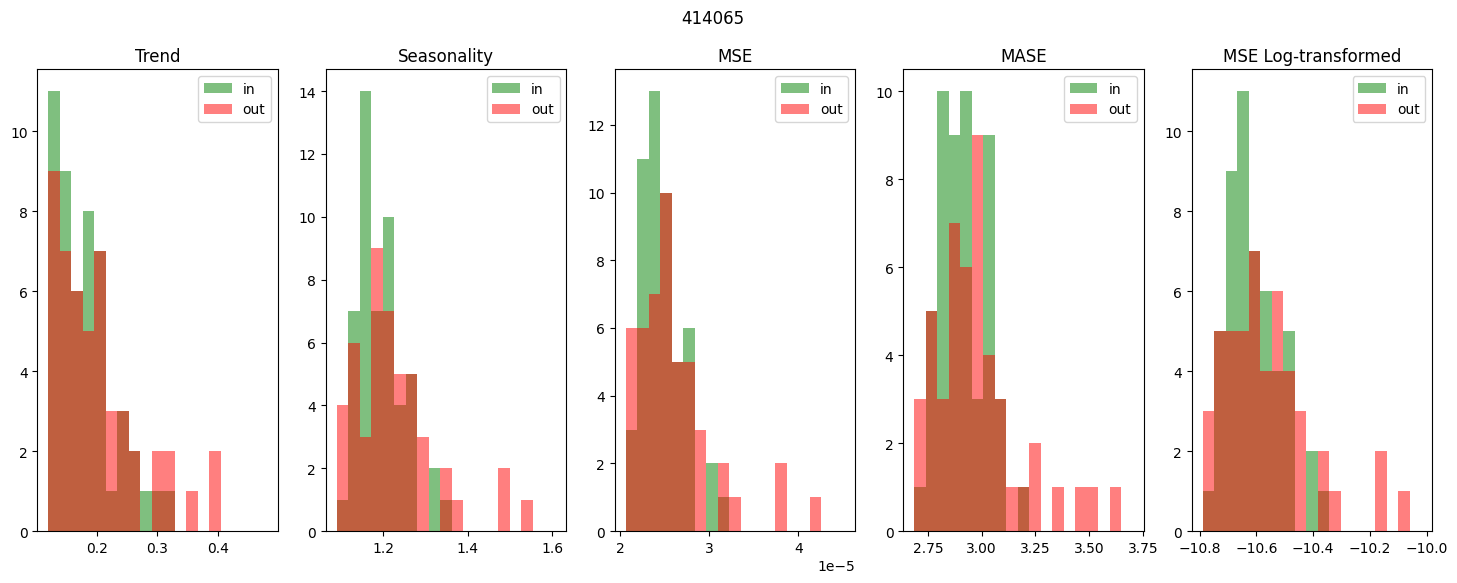

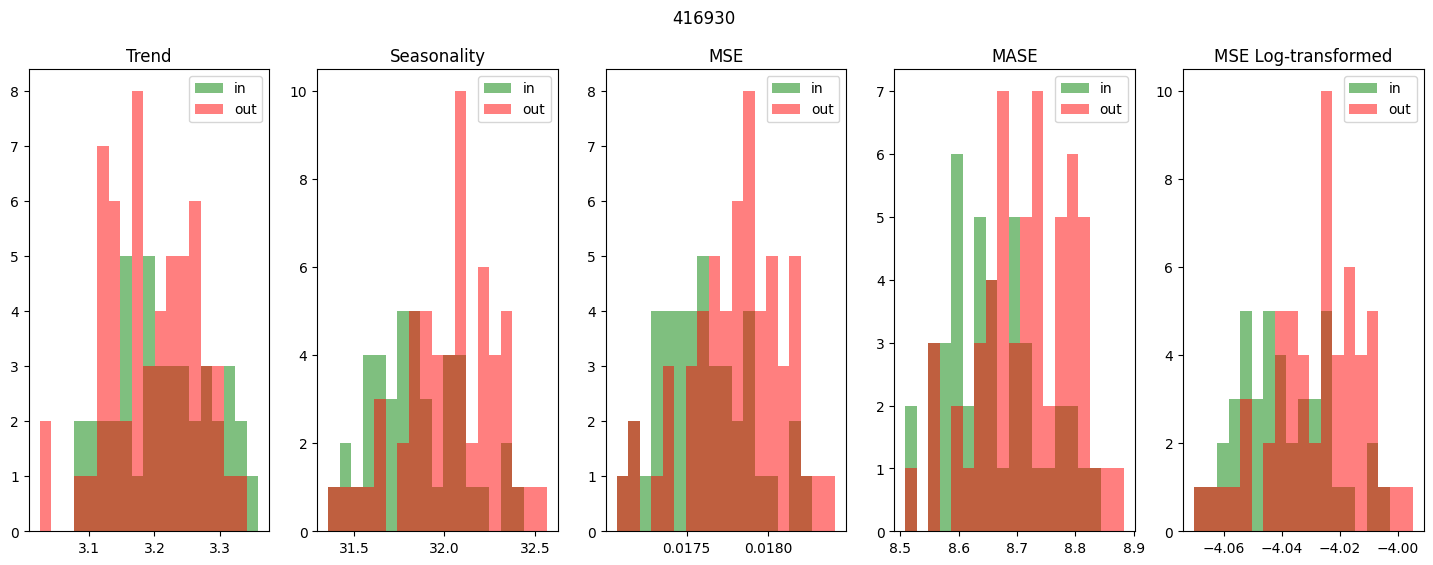

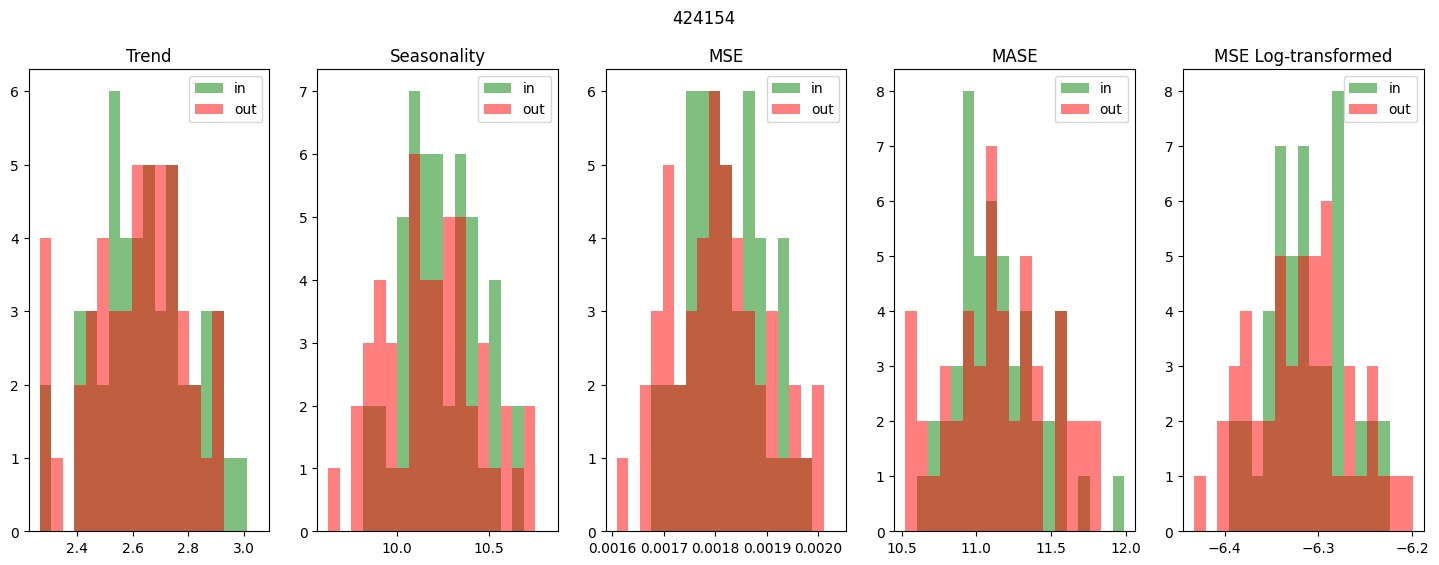

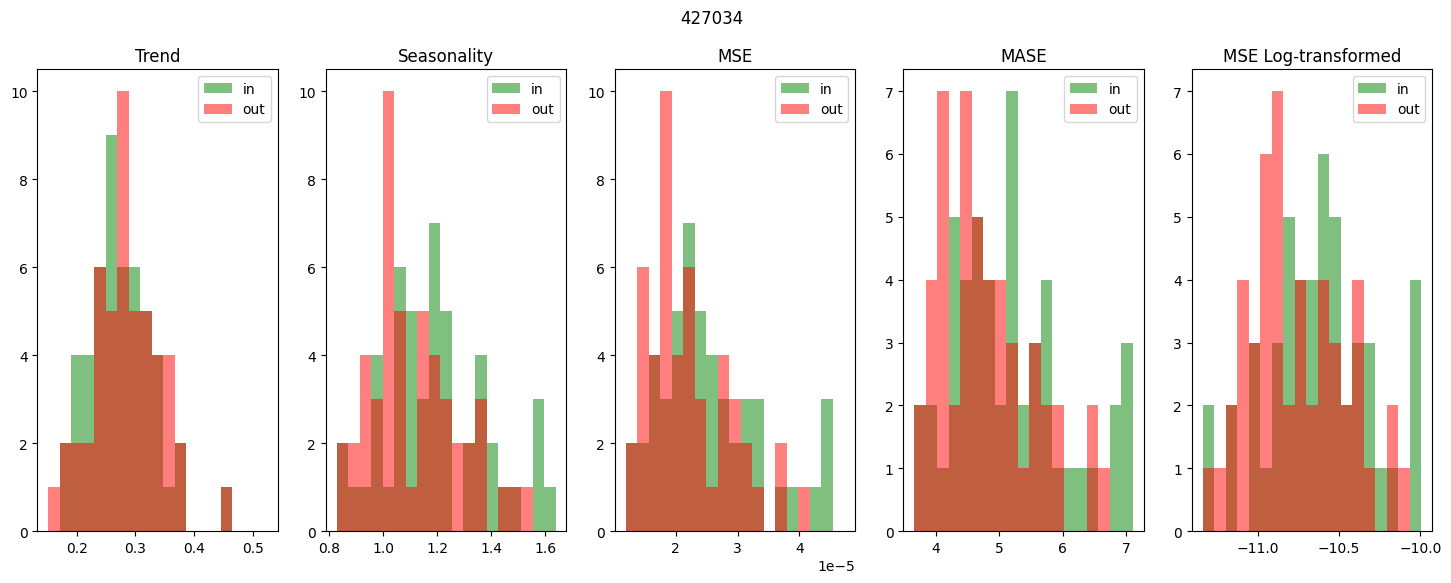

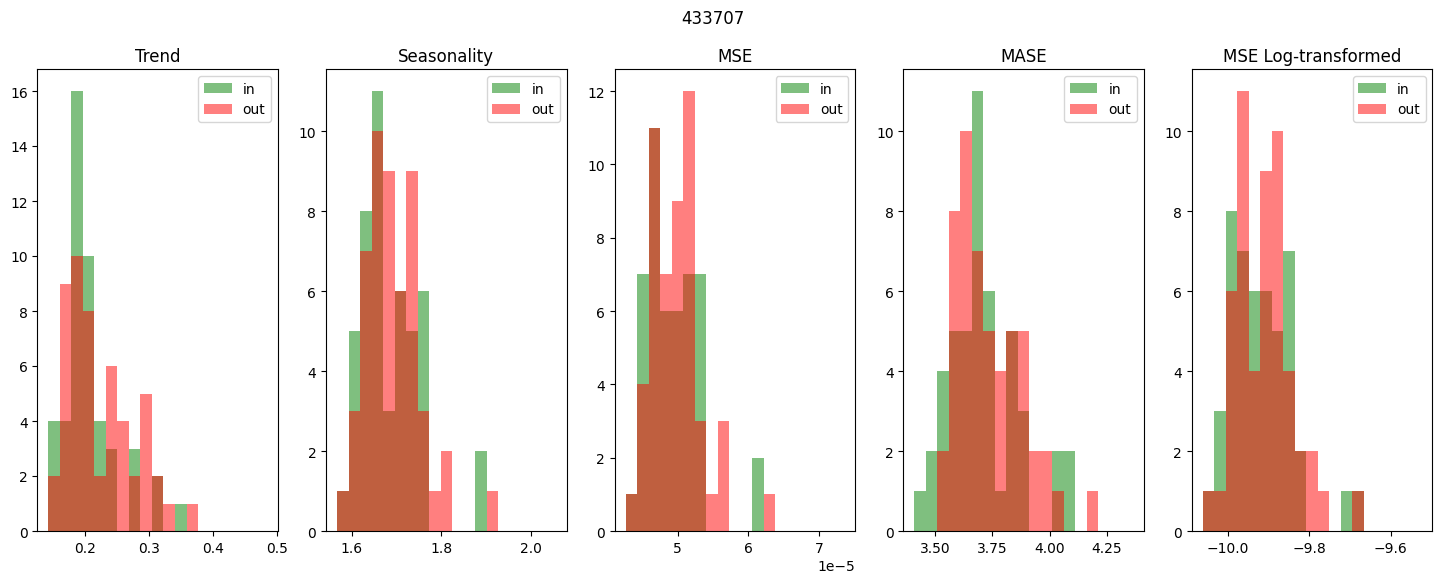

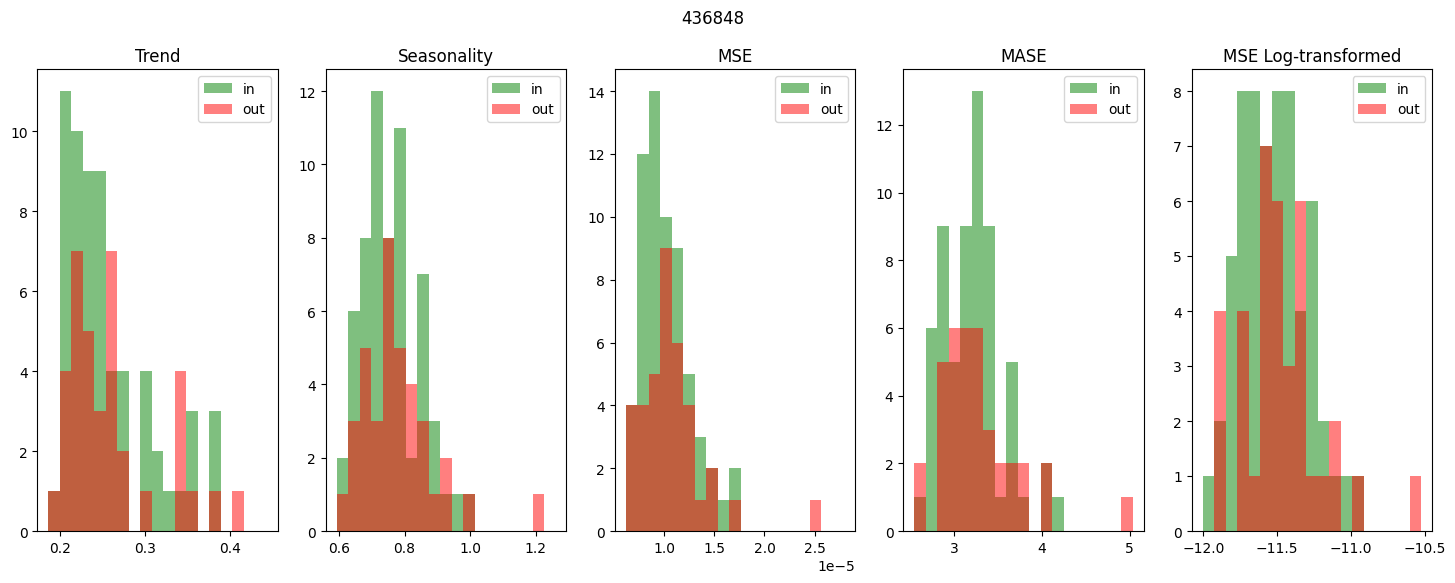

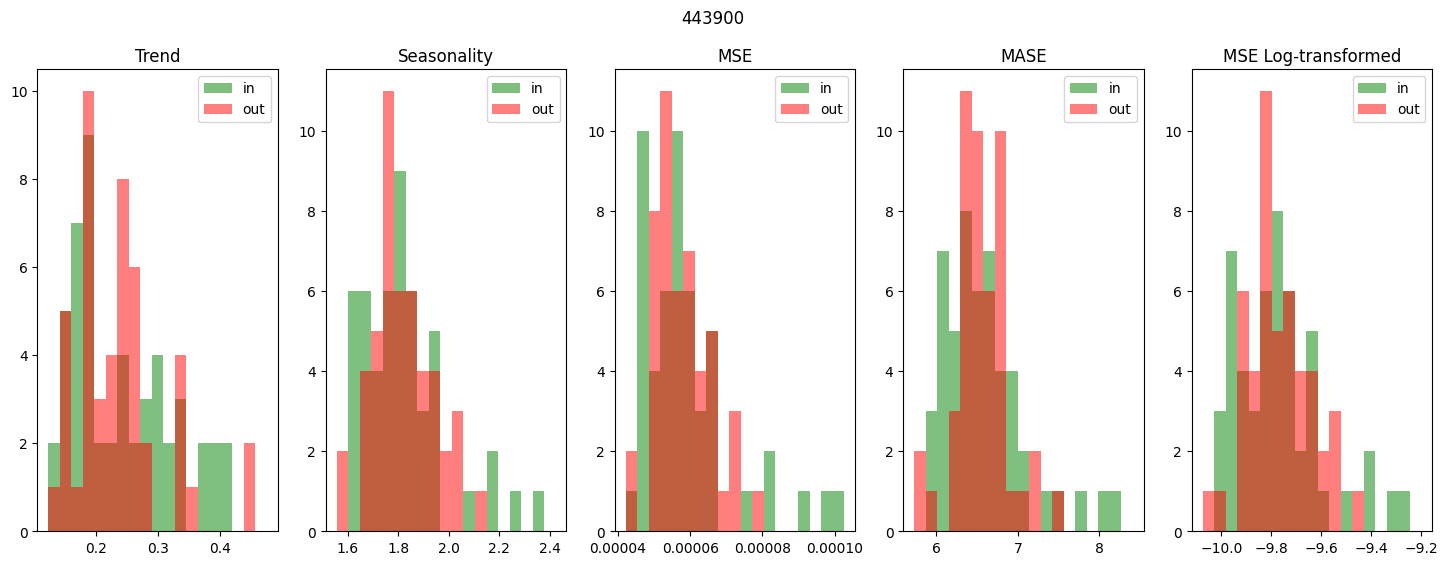

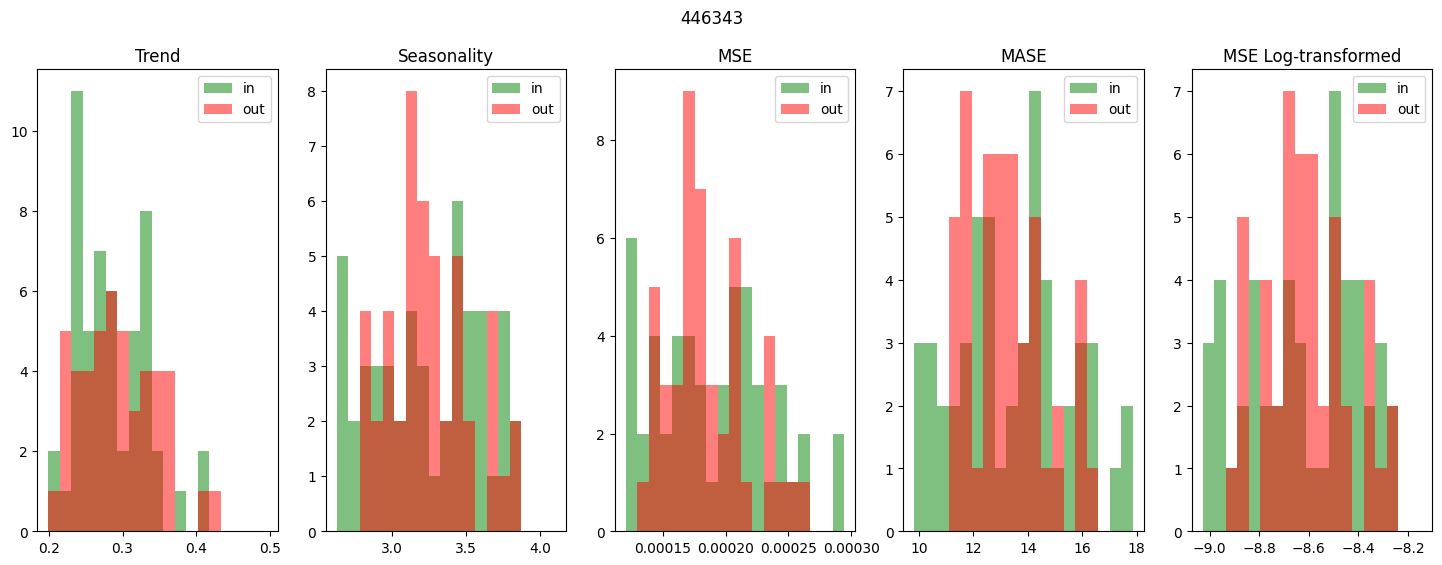

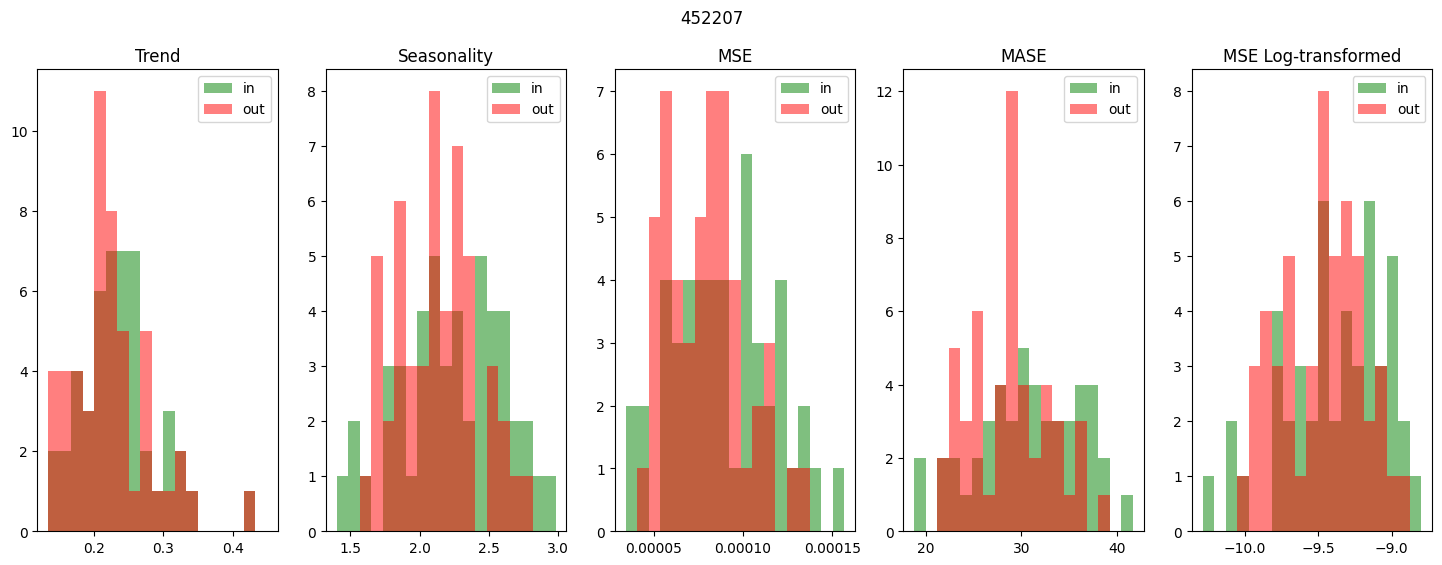

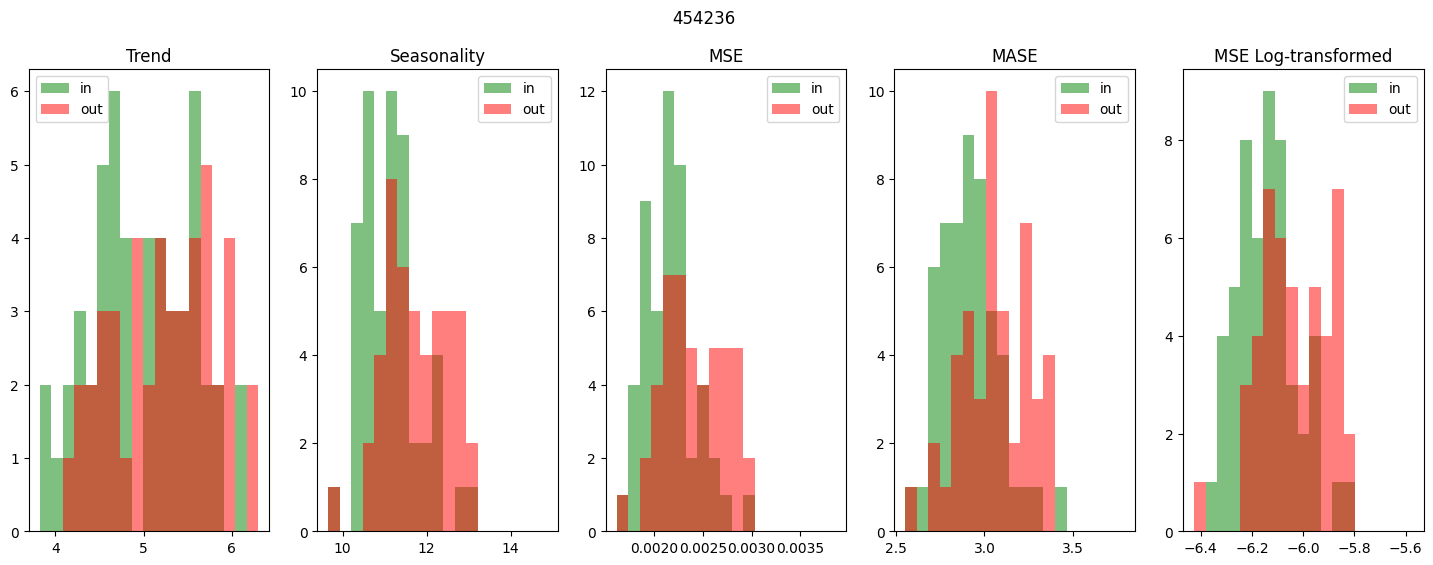

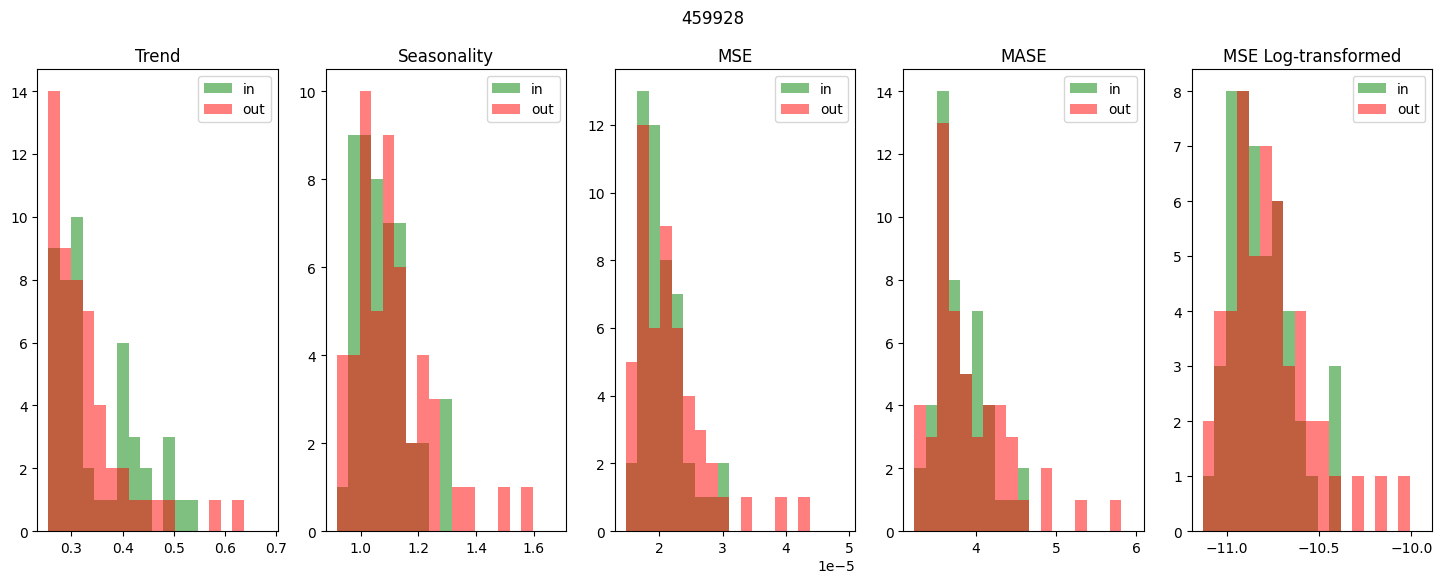

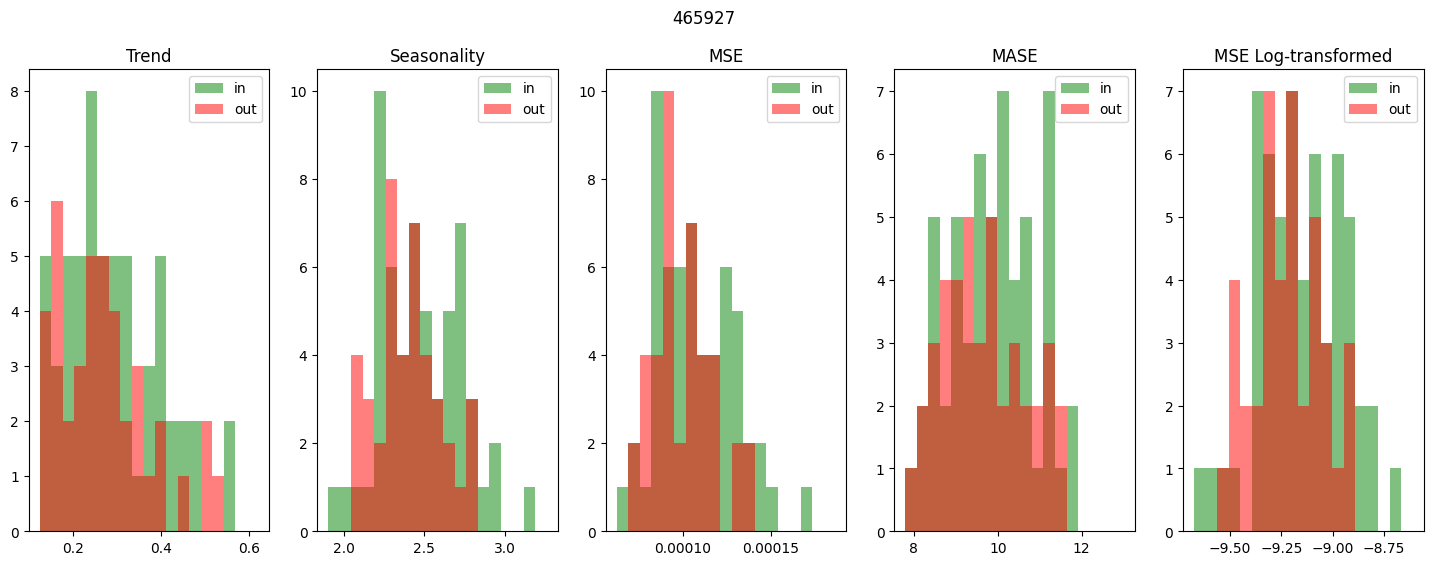

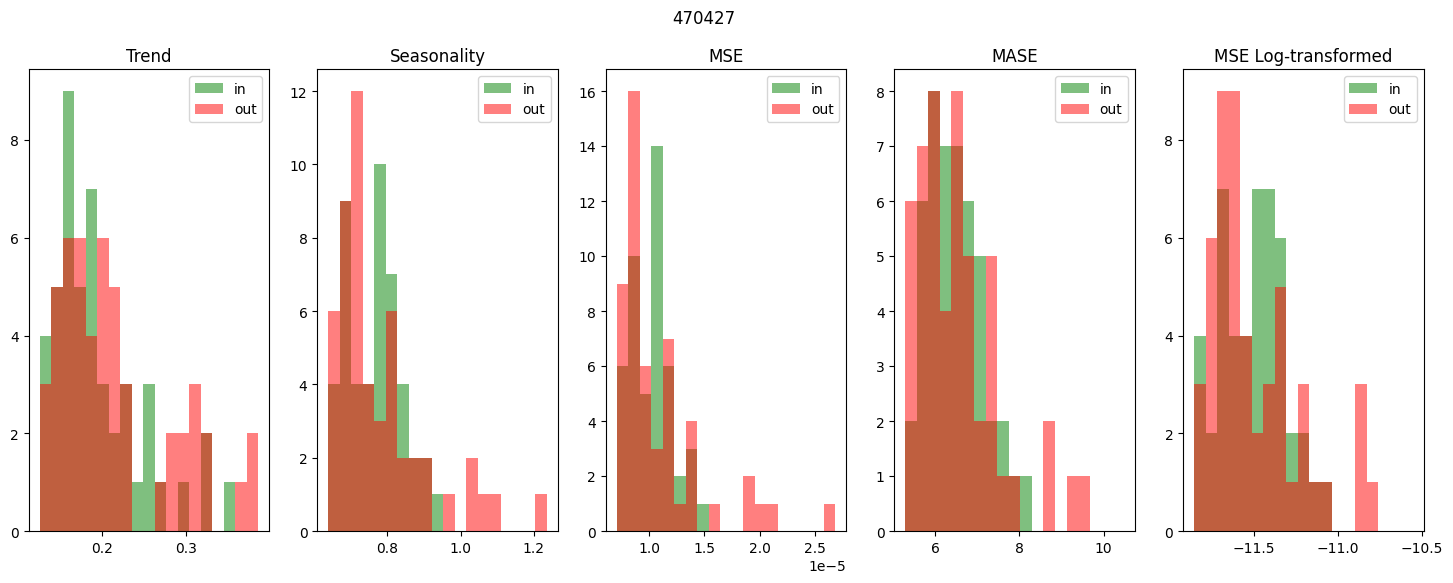

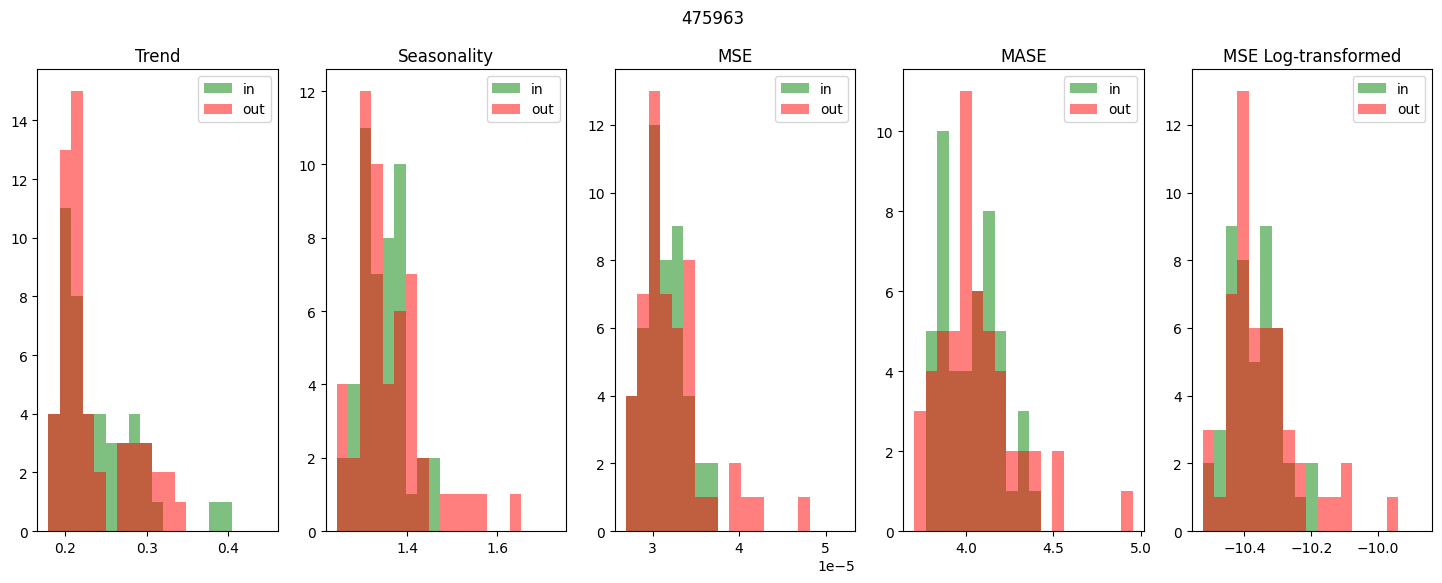

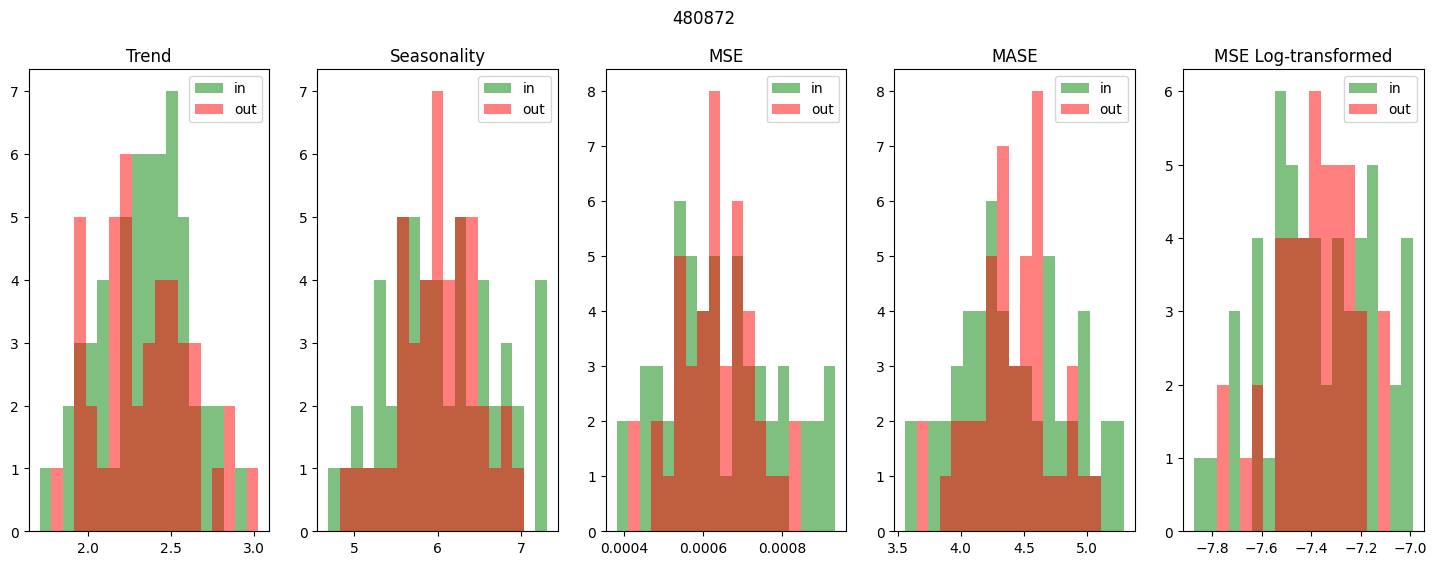

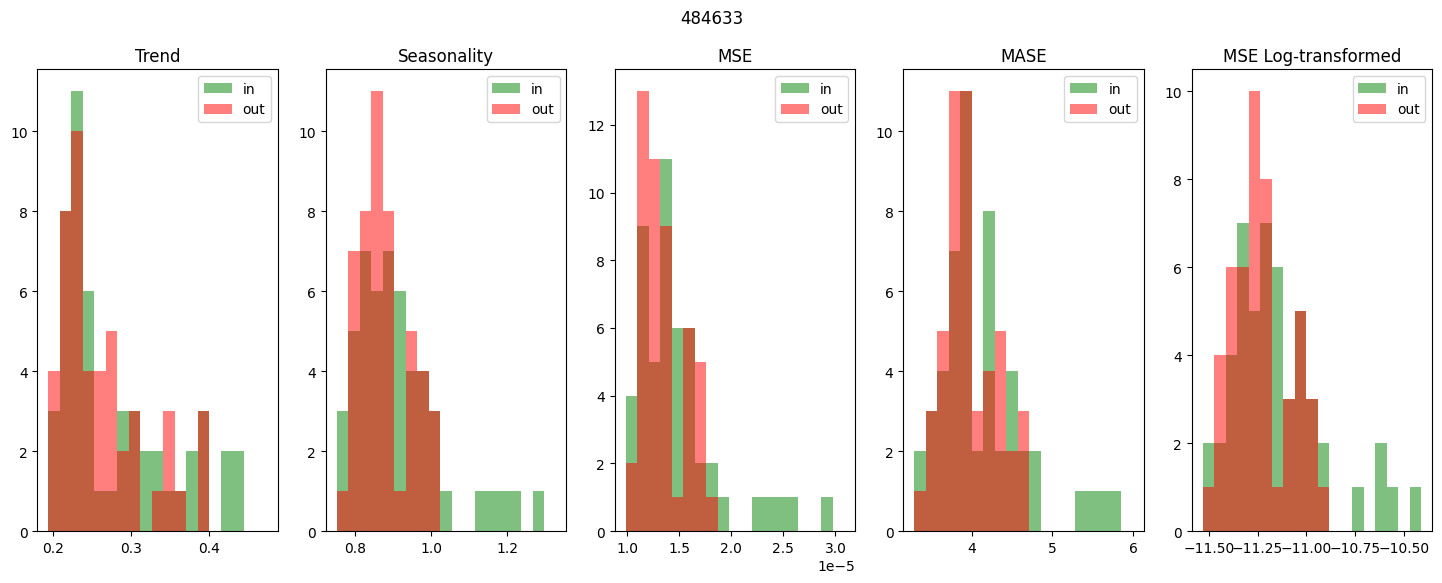

In [7]:
num_plots = 10
for i in best_per_individual:
    fig, axs = plt.subplots(1, num_features)
    fig.set_size_inches(18, 6)
    fig.suptitle(str(i))
    for f in range(num_features):
        ax = axs[f]
        ax.set_title(feature_names[f])
        current_mask = np.array(mask[i, :], dtype=bool)
        current_features = features[i, :, f]
        ins = current_features[current_mask]
        outs = current_features[np.logical_not(current_mask)]
        bins = np.arange(min(current_features), max(current_features), (max(current_features)-min(current_features))/20)
        ax.hist(ins, color="green", alpha=0.5, bins=bins, label="in")
        ax.hist(outs, color="red", alpha=0.5, bins=bins, label="out")
        ax.legend()
        
    plt.show()
